In [ ]:
#Caymen Carter Capstone For SUNY POLYTECHNIC INSTITUTE
#SPRING 2021
#ADVISOR: Dr. Michael J. Reale

In [1]:
import math
import random
import numpy as np
import pandas as pd
import pandas_datareader as web
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import tensorflow as tf

In [3]:
%matplotlib inline

In [4]:
dataset = pd.read_csv('datasets/WSBdataAndClosingInfo.csv')

In [5]:
dataset

,created_utc,num_comments,score,total_awards_received,ups,upvote_ratio,Close
0,10/12/2020,1064,27458,80,27458,0.90,11.80
1,10/12/2020,508,25102,130,25102,0.85,11.80
2,1/10/2021,2580,41651,0,41651,0.81,17.69
3,1/13/2021,3183,52472,0,52472,0.95,31.40
4,1/14/2021,1244,31327,74,31327,0.93,39.91
...,...,...,...,...,...,...,...
271,3/31/2021,24542,25588,601,25588,0.86,189.82
272,4/1/2021,2614,73821,2622,73821,0.92,191.45
273,4/9/2021,1038,49737,0,49737,0.90,158.36
274,4/9/2021,587,25286,223,25286,0.93,158.36


In [6]:
#Get the Stock quote
df = web.DataReader('GME', data_source='yahoo', start='2020-10-12', end='2021-04-11')
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-10-12,12.770000,11.400000,11.660000,11.800000,23655700,11.800000
2020-10-13,12.420000,11.650000,11.730000,11.880000,10179700,11.880000
2020-10-14,12.680000,12.050000,12.670000,12.250000,10761400,12.250000
2020-10-15,15.100000,11.990000,11.990000,13.830000,39894800,13.830000
2020-10-16,13.900000,13.080000,13.770000,13.310000,11651600,13.310000
...,...,...,...,...,...,...
2021-04-05,195.000000,164.809998,171.000000,186.949997,14070500,186.949997
2021-04-06,192.000000,183.559998,185.210007,184.500000,6218300,184.500000
2021-04-07,184.500000,176.110001,183.220001,177.970001,4768300,177.970001


# Visualizing the closing price graph based on reddit dataset

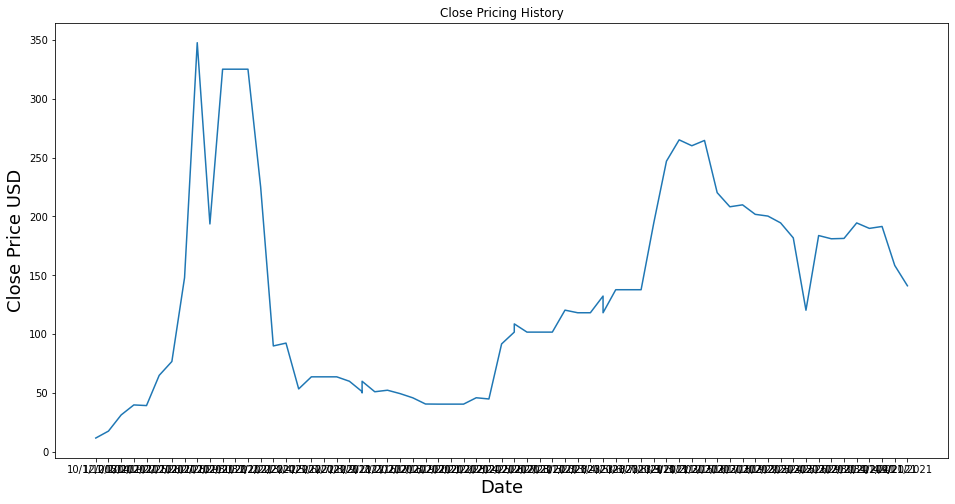

In [7]:
#Visualize the closing price
plt.figure(figsize=(16,8))
plt.title('Close Pricing History')
plt.plot(dataset['created_utc'],dataset['Close'])
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price USD', fontsize=18)
plt.show()

# Visualizing the closing price based on the dataset from yahoo

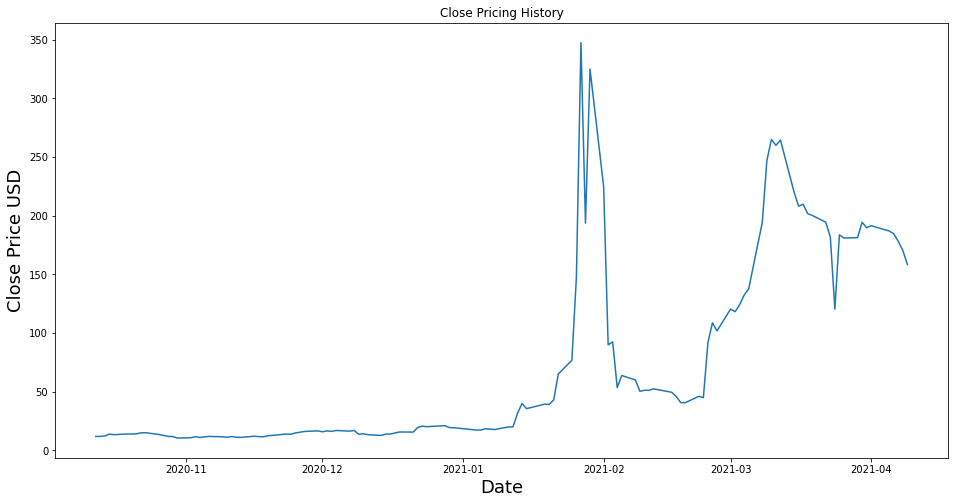

In [8]:
plt.figure(figsize=(16,8))
plt.title('Close Pricing History')
plt.plot(df['Close'])
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price USD', fontsize=18)
plt.show()

### The Graphs look a little different due to the time scaling on the bottom. This is due to the reddit dataset taking in multiple posts in a day. This allows multiple entries of closing data on the same date, therefore stretching the graph. 

## Filtering out time of the post since the NN should go based off user response

In [9]:
dataset = dataset.sample(frac = 1)
filtered_dataset = dataset
del filtered_dataset['created_utc']
filtered_dataset

,num_comments,score,total_awards_received,ups,upvote_ratio,Close
129,1684,27277,219,27277,0.97,225.00
186,13257,214665,0,214665,0.95,40.59
219,1958,59126,0,59126,0.86,137.74
238,443,32038,96,32038,0.95,265.00
85,1140,56782,0,56782,0.97,325.00
...,...,...,...,...,...,...
59,501,70720,275,70720,0.97,325.00
53,20644,249958,0,249958,0.96,325.00
117,1432,44213,0,44213,0.92,225.00
216,521,25384,344,25384,0.96,124.18


In [10]:
#convert to numpy array to do operations on
np_dataset = filtered_dataset.values

In [11]:
#figure out training length for 
training_length = math.ceil(len(np_dataset) * .80)
print("training length: ", training_length)

training length:  221


### split into testing and training data

In [12]:
train_data = np_dataset[0:training_length , :]
test_data = np_dataset[training_length:, :]
print("full dataset shape: ", np_dataset.shape)
print("full training dataset shape: ", train_data.shape)
print("full test dataset shape: ", test_data.shape)

full dataset shape:  (276, 6)
full training dataset shape:  (221, 6)
full test dataset shape:  (55, 6)


### split training into x and y

In [13]:
x_train = train_data[:, 0:5]
y_train = train_data[:, 5:]
print("x training dataset shape: ", x_train.shape)
print("y training dataset shape: ", y_train.shape)

x training dataset shape:  (221, 5)
y training dataset shape:  (221, 1)


### split testing into x and y

In [14]:
x_test = test_data[:, 0:5]
y_test = test_data[:, 5:]
print("x testing dataset shape: ", x_test.shape)
print("y testing dataset shape: ", y_test.shape)

x testing dataset shape:  (55, 5)
y testing dataset shape:  (55, 1)


### Normalize the dataset with minMaxScaler

In [15]:
#scale/normalize the x datasets
scaler = MinMaxScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

## Model Design, simple fully connected nn aka many dense layers connected to one another

In [16]:
model = tf.keras.models.Sequential()
#layers
model.add(tf.keras.layers.Dense(1024, activation='relu'))
model.add(tf.keras.layers.Dense(512, activation='relu'))
model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(64, activation='relu'))
model.add(tf.keras.layers.Dense(36, activation='relu'))
model.add(tf.keras.layers.Dense(16, activation='relu'))
model.add(tf.keras.layers.Dense(8, activation='relu'))
model.add(tf.keras.layers.Dense(4, activation='relu'))
model.add(tf.keras.layers.Dense(1, ))

## Compile the model with adam optimzer and mean square error loss function

In [17]:
model.compile(loss='mse',
             optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
             metrics=['mae'])

## Train the network with a validation split of 20%

In [18]:
model.fit(
    x=x_train, 
    y=y_train,
    validation_split=0.2,
    batch_size=32, 
    epochs=4000
)

Train on 176 samples, validate on 45 samples
Epoch 1/4000
176/176 [==============================] - 1s 3ms/sample - loss: 46864.6307 - mae: 190.6897 - val_loss: 47858.9545 - val_mae: 196.4064
Epoch 2/4000
176/176 [==============================] - 0s 204us/sample - loss: 46854.9048 - mae: 190.6644 - val_loss: 47838.7220 - val_mae: 196.3566
Epoch 3/4000
176/176 [==============================] - 0s 189us/sample - loss: 46818.8594 - mae: 190.5792 - val_loss: 47747.8944 - val_mae: 196.1337
Epoch 4/4000
176/176 [==============================] - 0s 190us/sample - loss: 46639.4510 - mae: 190.1176 - val_loss: 47249.6472 - val_mae: 194.9030
Epoch 5/4000
176/176 [==============================] - 0s 193us/sample - loss: 45780.3601 - mae: 187.8673 - val_loss: 45058.2870 - val_mae: 189.3740
Epoch 6/4000
176/176 [==============================] - 0s 204us/sample - loss: 41894.9691 - mae: 177.9567 - val_loss: 36740.0786 - val_mae: 166.6274
Epoch 7/4000
176/176 [==============================] - 0

Epoch 56/4000
176/176 [==============================] - 0s 191us/sample - loss: 9058.9758 - mae: 81.0328 - val_loss: 7856.2976 - val_mae: 74.9503
Epoch 57/4000
176/176 [==============================] - 0s 181us/sample - loss: 9191.5055 - mae: 81.4699 - val_loss: 7834.6697 - val_mae: 74.6124
Epoch 58/4000
176/176 [==============================] - 0s 190us/sample - loss: 9188.6062 - mae: 81.8520 - val_loss: 7878.9922 - val_mae: 74.2989
Epoch 59/4000
176/176 [==============================] - 0s 187us/sample - loss: 9023.4853 - mae: 81.3025 - val_loss: 7951.5355 - val_mae: 75.7439
Epoch 60/4000
176/176 [==============================] - 0s 192us/sample - loss: 9277.1189 - mae: 81.6915 - val_loss: 7934.9434 - val_mae: 75.6039
Epoch 61/4000
176/176 [==============================] - 0s 193us/sample - loss: 9087.3249 - mae: 81.0318 - val_loss: 7820.3072 - val_mae: 74.1408
Epoch 62/4000
176/176 [==============================] - 0s 204us/sample - loss: 9195.8322 - mae: 81.6132 - val_loss: 

176/176 [==============================] - 0s 204us/sample - loss: 8823.5792 - mae: 80.1445 - val_loss: 8086.6747 - val_mae: 76.9425
Epoch 112/4000
176/176 [==============================] - 0s 193us/sample - loss: 8952.8936 - mae: 80.6862 - val_loss: 7926.2047 - val_mae: 75.9348
Epoch 113/4000
176/176 [==============================] - 0s 187us/sample - loss: 8960.0955 - mae: 81.0603 - val_loss: 7908.6582 - val_mae: 75.7510
Epoch 114/4000
176/176 [==============================] - 0s 193us/sample - loss: 9129.0479 - mae: 81.2617 - val_loss: 7863.9045 - val_mae: 75.2547
Epoch 115/4000
176/176 [==============================] - 0s 187us/sample - loss: 9474.2907 - mae: 82.9955 - val_loss: 8008.1095 - val_mae: 75.5696
Epoch 116/4000
176/176 [==============================] - 0s 187us/sample - loss: 9043.2550 - mae: 81.4766 - val_loss: 8214.5196 - val_mae: 77.5172
Epoch 117/4000
176/176 [==============================] - 0s 187us/sample - loss: 8918.1543 - mae: 80.7945 - val_loss: 7809.884

176/176 [==============================] - 0s 210us/sample - loss: 8624.6158 - mae: 79.4907 - val_loss: 7988.4041 - val_mae: 76.7147
Epoch 167/4000
176/176 [==============================] - 0s 204us/sample - loss: 8551.4730 - mae: 79.3060 - val_loss: 8077.3363 - val_mae: 77.3427
Epoch 168/4000
176/176 [==============================] - 0s 193us/sample - loss: 8556.9817 - mae: 79.3646 - val_loss: 8069.4545 - val_mae: 77.2373
Epoch 169/4000
176/176 [==============================] - 0s 193us/sample - loss: 8622.5854 - mae: 79.5830 - val_loss: 8176.2629 - val_mae: 78.0927
Epoch 170/4000
176/176 [==============================] - 0s 193us/sample - loss: 8483.8004 - mae: 78.9103 - val_loss: 7982.0863 - val_mae: 76.2002
Epoch 171/4000
176/176 [==============================] - 0s 193us/sample - loss: 8713.1495 - mae: 80.1424 - val_loss: 7999.7132 - val_mae: 76.5879
Epoch 172/4000
176/176 [==============================] - 0s 193us/sample - loss: 8529.7391 - mae: 79.6682 - val_loss: 8497.589

176/176 [==============================] - 0s 227us/sample - loss: 8484.1394 - mae: 78.5072 - val_loss: 8549.4963 - val_mae: 80.5518
Epoch 222/4000
176/176 [==============================] - 0s 215us/sample - loss: 8439.5975 - mae: 78.5019 - val_loss: 8792.3110 - val_mae: 81.8863
Epoch 223/4000
176/176 [==============================] - 0s 221us/sample - loss: 8409.2924 - mae: 77.9930 - val_loss: 8428.8114 - val_mae: 79.0269
Epoch 224/4000
176/176 [==============================] - 0s 221us/sample - loss: 8406.4730 - mae: 78.3243 - val_loss: 8999.4379 - val_mae: 82.7832
Epoch 225/4000
176/176 [==============================] - 0s 210us/sample - loss: 8285.6964 - mae: 77.9463 - val_loss: 8410.6884 - val_mae: 79.2569
Epoch 226/4000
176/176 [==============================] - 0s 216us/sample - loss: 8182.1144 - mae: 77.3690 - val_loss: 9077.6758 - val_mae: 83.1364
Epoch 227/4000
176/176 [==============================] - 0s 210us/sample - loss: 8169.2682 - mae: 77.0729 - val_loss: 8490.616

176/176 [==============================] - 0s 204us/sample - loss: 7722.4645 - mae: 74.3692 - val_loss: 9689.8664 - val_mae: 85.0805
Epoch 277/4000
176/176 [==============================] - 0s 204us/sample - loss: 7844.5181 - mae: 74.8682 - val_loss: 9403.5680 - val_mae: 84.0205
Epoch 278/4000
176/176 [==============================] - 0s 211us/sample - loss: 7708.4376 - mae: 73.8679 - val_loss: 9433.5038 - val_mae: 83.7797
Epoch 279/4000
176/176 [==============================] - 0s 204us/sample - loss: 7622.4512 - mae: 73.6251 - val_loss: 9200.8100 - val_mae: 82.4736
Epoch 280/4000
176/176 [==============================] - 0s 204us/sample - loss: 7664.7992 - mae: 73.8784 - val_loss: 9485.2607 - val_mae: 84.1676
Epoch 281/4000
176/176 [==============================] - 0s 198us/sample - loss: 7620.1285 - mae: 73.8113 - val_loss: 9574.8223 - val_mae: 84.6048
Epoch 282/4000
176/176 [==============================] - 0s 210us/sample - loss: 7661.7417 - mae: 73.6432 - val_loss: 9278.654

176/176 [==============================] - 0s 204us/sample - loss: 7584.5180 - mae: 71.7806 - val_loss: 9675.4196 - val_mae: 83.6700
Epoch 332/4000
176/176 [==============================] - 0s 221us/sample - loss: 7474.2439 - mae: 71.7711 - val_loss: 10185.2391 - val_mae: 85.6378
Epoch 333/4000
176/176 [==============================] - 0s 210us/sample - loss: 7380.6936 - mae: 71.3159 - val_loss: 9800.6820 - val_mae: 84.1192
Epoch 334/4000
176/176 [==============================] - 0s 215us/sample - loss: 7284.4364 - mae: 71.1289 - val_loss: 10288.6812 - val_mae: 86.4664
Epoch 335/4000
176/176 [==============================] - 0s 255us/sample - loss: 7374.2469 - mae: 71.7063 - val_loss: 9602.1411 - val_mae: 83.6056
Epoch 336/4000
176/176 [==============================] - 0s 209us/sample - loss: 7429.6449 - mae: 71.5524 - val_loss: 10175.9597 - val_mae: 86.1293
Epoch 337/4000
176/176 [==============================] - 0s 210us/sample - loss: 7575.3448 - mae: 72.1197 - val_loss: 9750.

176/176 [==============================] - 0s 218us/sample - loss: 6967.7512 - mae: 68.1015 - val_loss: 9966.0722 - val_mae: 84.3984
Epoch 387/4000
176/176 [==============================] - 0s 210us/sample - loss: 7453.9504 - mae: 71.2007 - val_loss: 10203.5549 - val_mae: 85.8050
Epoch 388/4000
176/176 [==============================] - 0s 215us/sample - loss: 7159.1703 - mae: 69.3988 - val_loss: 10067.7164 - val_mae: 84.9795
Epoch 389/4000
176/176 [==============================] - 0s 204us/sample - loss: 7566.0707 - mae: 70.7449 - val_loss: 10142.9353 - val_mae: 84.9993
Epoch 390/4000
176/176 [==============================] - ETA: 0s - loss: 9774.5215 - mae: 84.002 - 0s 210us/sample - loss: 7496.2640 - mae: 70.6844 - val_loss: 9942.3264 - val_mae: 84.1799
Epoch 391/4000
176/176 [==============================] - 0s 210us/sample - loss: 6949.4194 - mae: 68.0580 - val_loss: 11438.5176 - val_mae: 89.3058
Epoch 392/4000
176/176 [==============================] - 0s 202us/sample - loss:

Epoch 441/4000
176/176 [==============================] - 0s 225us/sample - loss: 6776.5329 - mae: 66.0571 - val_loss: 11048.6826 - val_mae: 88.2750
Epoch 442/4000
176/176 [==============================] - 0s 210us/sample - loss: 6916.1760 - mae: 67.0494 - val_loss: 11208.4711 - val_mae: 88.3666
Epoch 443/4000
176/176 [==============================] - 0s 204us/sample - loss: 6762.3598 - mae: 66.3350 - val_loss: 11001.3493 - val_mae: 87.9619
Epoch 444/4000
176/176 [==============================] - 0s 210us/sample - loss: 6679.5162 - mae: 65.9548 - val_loss: 11347.5449 - val_mae: 88.8693
Epoch 445/4000
176/176 [==============================] - 0s 215us/sample - loss: 6762.2407 - mae: 65.9873 - val_loss: 11381.2996 - val_mae: 88.7635
Epoch 446/4000
176/176 [==============================] - 0s 209us/sample - loss: 6899.6370 - mae: 67.4039 - val_loss: 11218.9760 - val_mae: 89.1783
Epoch 447/4000
176/176 [==============================] - 0s 215us/sample - loss: 6719.9461 - mae: 66.2478

Epoch 496/4000
176/176 [==============================] - 0s 208us/sample - loss: 7354.4600 - mae: 69.3253 - val_loss: 11097.0185 - val_mae: 86.8041
Epoch 497/4000
176/176 [==============================] - 0s 221us/sample - loss: 6924.9846 - mae: 67.3238 - val_loss: 11523.6290 - val_mae: 88.7862
Epoch 498/4000
176/176 [==============================] - 0s 216us/sample - loss: 6541.5325 - mae: 64.5755 - val_loss: 11558.2553 - val_mae: 88.8659
Epoch 499/4000
176/176 [==============================] - 0s 215us/sample - loss: 7037.0584 - mae: 67.5191 - val_loss: 10822.9593 - val_mae: 85.5527
Epoch 500/4000
176/176 [==============================] - 0s 221us/sample - loss: 6957.8723 - mae: 67.9676 - val_loss: 11225.9895 - val_mae: 86.8168
Epoch 501/4000
176/176 [==============================] - 0s 227us/sample - loss: 6472.3397 - mae: 64.5156 - val_loss: 11937.3499 - val_mae: 88.8253
Epoch 502/4000
176/176 [==============================] - 0s 244us/sample - loss: 6734.7173 - mae: 65.1031

Epoch 551/4000
176/176 [==============================] - 0s 210us/sample - loss: 6248.3743 - mae: 62.5834 - val_loss: 12245.1247 - val_mae: 89.7336
Epoch 552/4000
176/176 [==============================] - 0s 204us/sample - loss: 6129.9760 - mae: 62.9785 - val_loss: 12584.2576 - val_mae: 91.1670
Epoch 553/4000
176/176 [==============================] - 0s 221us/sample - loss: 6155.6422 - mae: 62.0959 - val_loss: 12292.2847 - val_mae: 89.6476
Epoch 554/4000
176/176 [==============================] - 0s 221us/sample - loss: 6280.4513 - mae: 63.1855 - val_loss: 14402.3375 - val_mae: 95.2859
Epoch 555/4000
176/176 [==============================] - 0s 216us/sample - loss: 6735.0004 - mae: 64.4448 - val_loss: 13124.9568 - val_mae: 89.2780
Epoch 556/4000
176/176 [==============================] - 0s 216us/sample - loss: 7797.6814 - mae: 72.4846 - val_loss: 15017.9495 - val_mae: 96.1584
Epoch 557/4000
176/176 [==============================] - 0s 210us/sample - loss: 7376.2743 - mae: 70.5445

Epoch 606/4000
176/176 [==============================] - 0s 232us/sample - loss: 6819.6023 - mae: 67.0878 - val_loss: 13022.2342 - val_mae: 89.1949
Epoch 607/4000
176/176 [==============================] - 0s 221us/sample - loss: 6004.9797 - mae: 62.4514 - val_loss: 12693.1555 - val_mae: 89.3655
Epoch 608/4000
176/176 [==============================] - 0s 221us/sample - loss: 5929.6722 - mae: 61.7788 - val_loss: 12694.3731 - val_mae: 90.1911
Epoch 609/4000
176/176 [==============================] - 0s 209us/sample - loss: 5858.3221 - mae: 60.9140 - val_loss: 13509.4534 - val_mae: 93.4822
Epoch 610/4000
176/176 [==============================] - 0s 215us/sample - loss: 5846.6251 - mae: 60.5479 - val_loss: 12592.0730 - val_mae: 89.4639
Epoch 611/4000
176/176 [==============================] - 0s 221us/sample - loss: 5919.1374 - mae: 60.9214 - val_loss: 14310.6016 - val_mae: 94.2555
Epoch 612/4000
176/176 [==============================] - 0s 215us/sample - loss: 5997.3919 - mae: 60.8040

Epoch 661/4000
176/176 [==============================] - 0s 210us/sample - loss: 6243.0679 - mae: 64.2259 - val_loss: 15296.0935 - val_mae: 97.6244
Epoch 662/4000
176/176 [==============================] - 0s 210us/sample - loss: 6035.8738 - mae: 62.7281 - val_loss: 13620.2827 - val_mae: 91.1822
Epoch 663/4000
176/176 [==============================] - 0s 204us/sample - loss: 5793.3631 - mae: 59.8650 - val_loss: 15774.0786 - val_mae: 97.9331
Epoch 664/4000
176/176 [==============================] - 0s 204us/sample - loss: 6447.3046 - mae: 62.8054 - val_loss: 13198.8814 - val_mae: 90.9078
Epoch 665/4000
176/176 [==============================] - 0s 209us/sample - loss: 6176.8488 - mae: 61.5353 - val_loss: 13308.4493 - val_mae: 89.3838
Epoch 666/4000
176/176 [==============================] - 0s 216us/sample - loss: 5808.2054 - mae: 59.5020 - val_loss: 13691.5616 - val_mae: 90.4358
Epoch 667/4000
176/176 [==============================] - 0s 212us/sample - loss: 5594.0553 - mae: 58.3821

Epoch 716/4000
176/176 [==============================] - 0s 204us/sample - loss: 5317.1852 - mae: 56.7490 - val_loss: 14843.8494 - val_mae: 94.1453
Epoch 717/4000
176/176 [==============================] - 0s 210us/sample - loss: 5618.4959 - mae: 58.3876 - val_loss: 15851.7867 - val_mae: 96.8660
Epoch 718/4000
176/176 [==============================] - 0s 210us/sample - loss: 5374.5227 - mae: 56.6633 - val_loss: 15450.9813 - val_mae: 95.2321
Epoch 719/4000
176/176 [==============================] - 0s 210us/sample - loss: 5405.7744 - mae: 56.9063 - val_loss: 15520.7822 - val_mae: 94.8910
Epoch 720/4000
176/176 [==============================] - 0s 204us/sample - loss: 5240.3604 - mae: 55.6772 - val_loss: 16135.9391 - val_mae: 97.2310
Epoch 721/4000
176/176 [==============================] - 0s 198us/sample - loss: 5213.0916 - mae: 55.9880 - val_loss: 15908.1999 - val_mae: 95.7532
Epoch 722/4000
176/176 [==============================] - 0s 197us/sample - loss: 5295.8554 - mae: 55.7769

Epoch 771/4000
176/176 [==============================] - 0s 215us/sample - loss: 5168.1677 - mae: 56.3506 - val_loss: 15085.7283 - val_mae: 95.4194
Epoch 772/4000
176/176 [==============================] - 0s 209us/sample - loss: 5325.2737 - mae: 56.8261 - val_loss: 15411.0175 - val_mae: 94.5830
Epoch 773/4000
176/176 [==============================] - 0s 215us/sample - loss: 5283.8600 - mae: 56.3235 - val_loss: 14956.7771 - val_mae: 92.7522
Epoch 774/4000
176/176 [==============================] - 0s 218us/sample - loss: 5161.7115 - mae: 54.7681 - val_loss: 15852.8220 - val_mae: 95.7904
Epoch 775/4000
176/176 [==============================] - 0s 210us/sample - loss: 5010.1461 - mae: 53.4536 - val_loss: 15874.8327 - val_mae: 96.4038
Epoch 776/4000
176/176 [==============================] - 0s 204us/sample - loss: 5083.2388 - mae: 54.4165 - val_loss: 16040.4942 - val_mae: 95.2960
Epoch 777/4000
176/176 [==============================] - 0s 204us/sample - loss: 5294.1199 - mae: 55.8307

Epoch 826/4000
176/176 [==============================] - 0s 209us/sample - loss: 4984.0704 - mae: 54.1894 - val_loss: 19231.6641 - val_mae: 105.7572
Epoch 827/4000
176/176 [==============================] - 0s 221us/sample - loss: 5071.9949 - mae: 55.6265 - val_loss: 15847.4792 - val_mae: 95.5782
Epoch 828/4000
176/176 [==============================] - 0s 249us/sample - loss: 4979.3143 - mae: 53.6591 - val_loss: 15934.8019 - val_mae: 97.8425
Epoch 829/4000
176/176 [==============================] - 0s 226us/sample - loss: 5036.4490 - mae: 55.4231 - val_loss: 17038.5564 - val_mae: 99.1216
Epoch 830/4000
176/176 [==============================] - 0s 219us/sample - loss: 4888.2642 - mae: 53.6811 - val_loss: 17771.6865 - val_mae: 101.3317
Epoch 831/4000
176/176 [==============================] - 0s 215us/sample - loss: 4877.9370 - mae: 52.9910 - val_loss: 17526.0145 - val_mae: 101.6195
Epoch 832/4000
176/176 [==============================] - 0s 221us/sample - loss: 5063.2703 - mae: 54.2

Epoch 881/4000
176/176 [==============================] - 0s 203us/sample - loss: 4979.8210 - mae: 54.3043 - val_loss: 17714.2093 - val_mae: 102.7992
Epoch 882/4000
176/176 [==============================] - 0s 210us/sample - loss: 4821.4429 - mae: 52.2077 - val_loss: 17243.5100 - val_mae: 100.7634
Epoch 883/4000
176/176 [==============================] - 0s 209us/sample - loss: 4941.5634 - mae: 52.2329 - val_loss: 16955.2093 - val_mae: 98.5010
Epoch 884/4000
176/176 [==============================] - 0s 210us/sample - loss: 5591.2850 - mae: 58.3590 - val_loss: 19615.9928 - val_mae: 108.3579
Epoch 885/4000
176/176 [==============================] - 0s 221us/sample - loss: 5075.1026 - mae: 55.2056 - val_loss: 16751.3264 - val_mae: 99.2597
Epoch 886/4000
176/176 [==============================] - 0s 221us/sample - loss: 4875.8798 - mae: 53.4999 - val_loss: 18467.7626 - val_mae: 103.8912
Epoch 887/4000
176/176 [==============================] - 0s 221us/sample - loss: 4742.1827 - mae: 51.

Epoch 936/4000
176/176 [==============================] - 0s 209us/sample - loss: 4982.9802 - mae: 52.7925 - val_loss: 17793.1556 - val_mae: 98.5984
Epoch 937/4000
176/176 [==============================] - 0s 215us/sample - loss: 4940.9531 - mae: 54.2538 - val_loss: 19902.5766 - val_mae: 107.1480
Epoch 938/4000
176/176 [==============================] - 0s 198us/sample - loss: 5009.5264 - mae: 54.5284 - val_loss: 18618.2471 - val_mae: 103.8141
Epoch 939/4000
176/176 [==============================] - 0s 210us/sample - loss: 5419.3827 - mae: 56.5436 - val_loss: 16941.4582 - val_mae: 98.4551
Epoch 940/4000
176/176 [==============================] - 0s 204us/sample - loss: 5203.5865 - mae: 56.6680 - val_loss: 23010.8711 - val_mae: 115.8531
Epoch 941/4000
176/176 [==============================] - 0s 209us/sample - loss: 4828.6344 - mae: 53.2896 - val_loss: 17538.1842 - val_mae: 100.0579
Epoch 942/4000
176/176 [==============================] - 0s 215us/sample - loss: 4862.6697 - mae: 52.

Epoch 991/4000
176/176 [==============================] - 0s 210us/sample - loss: 4827.2786 - mae: 53.2080 - val_loss: 16873.2905 - val_mae: 97.3946
Epoch 992/4000
176/176 [==============================] - 0s 215us/sample - loss: 4590.6001 - mae: 50.4174 - val_loss: 21046.6033 - val_mae: 112.3469
Epoch 993/4000
176/176 [==============================] - 0s 215us/sample - loss: 4697.6452 - mae: 51.4443 - val_loss: 17960.5877 - val_mae: 103.2345
Epoch 994/4000
176/176 [==============================] - 0s 204us/sample - loss: 4768.5357 - mae: 52.0906 - val_loss: 17025.8138 - val_mae: 98.4798
Epoch 995/4000
176/176 [==============================] - 0s 210us/sample - loss: 4907.7793 - mae: 53.6384 - val_loss: 20457.5399 - val_mae: 109.9355
Epoch 996/4000
176/176 [==============================] - 0s 216us/sample - loss: 4621.7020 - mae: 51.9471 - val_loss: 16602.1423 - val_mae: 97.8077
Epoch 997/4000
176/176 [==============================] - 0s 221us/sample - loss: 4365.6806 - mae: 49.2

176/176 [==============================] - 0s 215us/sample - loss: 5348.2084 - mae: 57.1171 - val_loss: 16525.9127 - val_mae: 96.3656
Epoch 1046/4000
176/176 [==============================] - 0s 210us/sample - loss: 5335.5230 - mae: 54.6363 - val_loss: 17502.7974 - val_mae: 99.6432
Epoch 1047/4000
176/176 [==============================] - 0s 210us/sample - loss: 4631.3448 - mae: 51.5120 - val_loss: 16974.1465 - val_mae: 98.7588
Epoch 1048/4000
176/176 [==============================] - 0s 204us/sample - loss: 4680.4584 - mae: 53.0470 - val_loss: 16611.5064 - val_mae: 96.9201
Epoch 1049/4000
176/176 [==============================] - 0s 204us/sample - loss: 4744.4644 - mae: 51.6160 - val_loss: 17695.5481 - val_mae: 99.9189
Epoch 1050/4000
176/176 [==============================] - 0s 221us/sample - loss: 4369.1764 - mae: 49.0991 - val_loss: 17900.8888 - val_mae: 101.3388
Epoch 1051/4000
176/176 [==============================] - 0s 227us/sample - loss: 4475.5560 - mae: 49.4546 - val_l

176/176 [==============================] - 0s 209us/sample - loss: 4221.9455 - mae: 48.2492 - val_loss: 18288.6454 - val_mae: 103.9191
Epoch 1100/4000
176/176 [==============================] - 0s 215us/sample - loss: 4232.8015 - mae: 47.4933 - val_loss: 16453.5665 - val_mae: 94.7122
Epoch 1101/4000
176/176 [==============================] - 0s 204us/sample - loss: 4371.0345 - mae: 49.3608 - val_loss: 18822.5122 - val_mae: 102.8214
Epoch 1102/4000
176/176 [==============================] - 0s 215us/sample - loss: 4216.8753 - mae: 48.1849 - val_loss: 18455.1231 - val_mae: 103.1668
Epoch 1103/4000
176/176 [==============================] - 0s 232us/sample - loss: 4168.9733 - mae: 48.1471 - val_loss: 17290.9776 - val_mae: 98.9911
Epoch 1104/4000
176/176 [==============================] - 0s 227us/sample - loss: 4162.8561 - mae: 47.1638 - val_loss: 19114.3393 - val_mae: 104.6488
Epoch 1105/4000
176/176 [==============================] - 0s 238us/sample - loss: 4148.3674 - mae: 45.2368 - va

176/176 [==============================] - 0s 209us/sample - loss: 4760.0906 - mae: 50.1189 - val_loss: 23807.1787 - val_mae: 115.8910
Epoch 1154/4000
176/176 [==============================] - 0s 215us/sample - loss: 4784.8201 - mae: 52.4545 - val_loss: 21290.2156 - val_mae: 110.3168
Epoch 1155/4000
176/176 [==============================] - 0s 215us/sample - loss: 4246.2620 - mae: 48.1164 - val_loss: 19999.1155 - val_mae: 106.8775
Epoch 1156/4000
176/176 [==============================] - 0s 232us/sample - loss: 4346.2169 - mae: 47.7461 - val_loss: 19726.6897 - val_mae: 106.2195
Epoch 1157/4000
176/176 [==============================] - 0s 221us/sample - loss: 4102.1958 - mae: 47.1450 - val_loss: 20728.1797 - val_mae: 109.1925
Epoch 1158/4000
176/176 [==============================] - 0s 210us/sample - loss: 4154.3078 - mae: 47.4213 - val_loss: 17492.8283 - val_mae: 97.1348
Epoch 1159/4000
176/176 [==============================] - 0s 210us/sample - loss: 4082.8707 - mae: 46.6121 - v

176/176 [==============================] - 0s 215us/sample - loss: 4348.4991 - mae: 50.4280 - val_loss: 17054.2289 - val_mae: 99.0860
Epoch 1208/4000
176/176 [==============================] - 0s 238us/sample - loss: 4362.8497 - mae: 49.1340 - val_loss: 18515.1783 - val_mae: 102.3132
Epoch 1209/4000
176/176 [==============================] - 0s 233us/sample - loss: 4027.2551 - mae: 45.7259 - val_loss: 20503.9077 - val_mae: 108.6773
Epoch 1210/4000
176/176 [==============================] - 0s 215us/sample - loss: 3965.7611 - mae: 46.9348 - val_loss: 18861.2517 - val_mae: 103.2759
Epoch 1211/4000
176/176 [==============================] - 0s 204us/sample - loss: 4021.4267 - mae: 46.0553 - val_loss: 17304.8207 - val_mae: 99.8188
Epoch 1212/4000
176/176 [==============================] - 0s 209us/sample - loss: 4188.6949 - mae: 47.4962 - val_loss: 21573.7933 - val_mae: 111.6238
Epoch 1213/4000
176/176 [==============================] - 0s 216us/sample - loss: 4556.1416 - mae: 50.6967 - va

176/176 [==============================] - 0s 232us/sample - loss: 3859.4931 - mae: 44.1208 - val_loss: 17937.1266 - val_mae: 101.1959
Epoch 1262/4000
176/176 [==============================] - 0s 221us/sample - loss: 4141.3252 - mae: 46.7766 - val_loss: 19599.1224 - val_mae: 107.8488
Epoch 1263/4000
176/176 [==============================] - 0s 238us/sample - loss: 3911.2751 - mae: 44.8860 - val_loss: 19635.0759 - val_mae: 107.5712
Epoch 1264/4000
176/176 [==============================] - 0s 221us/sample - loss: 4654.4908 - mae: 46.9126 - val_loss: 16241.3558 - val_mae: 96.5402
Epoch 1265/4000
176/176 [==============================] - 0s 209us/sample - loss: 4684.1681 - mae: 50.1264 - val_loss: 18407.3487 - val_mae: 104.2431
Epoch 1266/4000
176/176 [==============================] - 0s 215us/sample - loss: 4250.0632 - mae: 46.6796 - val_loss: 17360.5653 - val_mae: 98.9760
Epoch 1267/4000
176/176 [==============================] - 0s 203us/sample - loss: 4115.8298 - mae: 46.2150 - va

176/176 [==============================] - 0s 204us/sample - loss: 3967.1816 - mae: 46.5468 - val_loss: 18845.9442 - val_mae: 102.0774
Epoch 1316/4000
176/176 [==============================] - 0s 215us/sample - loss: 3878.1593 - mae: 46.1921 - val_loss: 20915.4420 - val_mae: 110.6315
Epoch 1317/4000
176/176 [==============================] - 0s 204us/sample - loss: 3847.8740 - mae: 45.0812 - val_loss: 19819.7126 - val_mae: 108.2786
Epoch 1318/4000
176/176 [==============================] - 0s 204us/sample - loss: 3556.4550 - mae: 42.3728 - val_loss: 19353.1372 - val_mae: 105.9162
Epoch 1319/4000
176/176 [==============================] - 0s 204us/sample - loss: 3857.3192 - mae: 44.7969 - val_loss: 17008.1640 - val_mae: 98.3540
Epoch 1320/4000
176/176 [==============================] - 0s 204us/sample - loss: 3890.1503 - mae: 46.0661 - val_loss: 19405.4004 - val_mae: 107.2308
Epoch 1321/4000
176/176 [==============================] - 0s 221us/sample - loss: 3814.3548 - mae: 46.1769 - v

176/176 [==============================] - 0s 210us/sample - loss: 3497.8541 - mae: 42.9443 - val_loss: 19255.3905 - val_mae: 106.9801
Epoch 1370/4000
176/176 [==============================] - 0s 210us/sample - loss: 3543.6438 - mae: 42.1657 - val_loss: 16610.3201 - val_mae: 97.5862
Epoch 1371/4000
176/176 [==============================] - 0s 204us/sample - loss: 3846.0471 - mae: 44.5211 - val_loss: 21093.3454 - val_mae: 110.0482
Epoch 1372/4000
176/176 [==============================] - 0s 210us/sample - loss: 4348.5665 - mae: 48.9877 - val_loss: 16763.0457 - val_mae: 96.0822
Epoch 1373/4000
176/176 [==============================] - 0s 198us/sample - loss: 4102.2227 - mae: 46.0318 - val_loss: 16558.5097 - val_mae: 96.6403
Epoch 1374/4000
176/176 [==============================] - 0s 204us/sample - loss: 3932.4140 - mae: 46.1900 - val_loss: 22101.2421 - val_mae: 114.7319
Epoch 1375/4000
176/176 [==============================] - 0s 210us/sample - loss: 4114.7831 - mae: 48.7598 - val

176/176 [==============================] - 0s 210us/sample - loss: 3594.0956 - mae: 42.8207 - val_loss: 18265.3957 - val_mae: 103.8872
Epoch 1424/4000
176/176 [==============================] - 0s 221us/sample - loss: 3627.2765 - mae: 43.1589 - val_loss: 18060.2419 - val_mae: 104.1248
Epoch 1425/4000
176/176 [==============================] - 0s 221us/sample - loss: 3464.2363 - mae: 41.6174 - val_loss: 17163.9161 - val_mae: 99.3189
Epoch 1426/4000
176/176 [==============================] - 0s 215us/sample - loss: 3626.7718 - mae: 42.7079 - val_loss: 18761.3299 - val_mae: 103.9239
Epoch 1427/4000
176/176 [==============================] - 0s 232us/sample - loss: 3496.7873 - mae: 42.8494 - val_loss: 16287.0938 - val_mae: 98.4832
Epoch 1428/4000
176/176 [==============================] - 0s 215us/sample - loss: 3512.7268 - mae: 41.4969 - val_loss: 17922.5153 - val_mae: 105.6091
Epoch 1429/4000
176/176 [==============================] - 0s 227us/sample - loss: 3820.6143 - mae: 45.2634 - va

176/176 [==============================] - 0s 210us/sample - loss: 3275.9728 - mae: 40.5638 - val_loss: 16273.8834 - val_mae: 98.7016
Epoch 1478/4000
176/176 [==============================] - 0s 214us/sample - loss: 3508.3964 - mae: 42.7421 - val_loss: 19185.4017 - val_mae: 107.9512
Epoch 1479/4000
176/176 [==============================] - 0s 215us/sample - loss: 3365.1265 - mae: 41.2227 - val_loss: 16821.2634 - val_mae: 100.5882
Epoch 1480/4000
176/176 [==============================] - 0s 209us/sample - loss: 3325.9162 - mae: 40.7704 - val_loss: 18521.3163 - val_mae: 103.0828
Epoch 1481/4000
176/176 [==============================] - 0s 204us/sample - loss: 4010.9827 - mae: 45.2564 - val_loss: 19039.7433 - val_mae: 104.9015
Epoch 1482/4000
176/176 [==============================] - 0s 204us/sample - loss: 3946.4589 - mae: 44.2931 - val_loss: 16757.6838 - val_mae: 101.1775
Epoch 1483/4000
176/176 [==============================] - 0s 204us/sample - loss: 3637.2858 - mae: 42.8808 - v

176/176 [==============================] - 0s 204us/sample - loss: 2840.8969 - mae: 36.4311 - val_loss: 16778.6478 - val_mae: 98.0452
Epoch 1532/4000
176/176 [==============================] - 0s 204us/sample - loss: 3128.1980 - mae: 37.8720 - val_loss: 17843.1329 - val_mae: 102.0206
Epoch 1533/4000
176/176 [==============================] - 0s 204us/sample - loss: 3052.2254 - mae: 39.5286 - val_loss: 17726.6943 - val_mae: 102.4879
Epoch 1534/4000
176/176 [==============================] - 0s 204us/sample - loss: 3298.8456 - mae: 42.0457 - val_loss: 16841.7961 - val_mae: 96.4168
Epoch 1535/4000
176/176 [==============================] - 0s 204us/sample - loss: 3317.2562 - mae: 41.2342 - val_loss: 16742.8464 - val_mae: 99.0759
Epoch 1536/4000
176/176 [==============================] - 0s 204us/sample - loss: 3069.7499 - mae: 39.8278 - val_loss: 19760.6351 - val_mae: 108.9316
Epoch 1537/4000
176/176 [==============================] - ETA: 0s - loss: 2819.5369 - mae: 41.597 - 0s 204us/sam

176/176 [==============================] - 0s 209us/sample - loss: 2826.9836 - mae: 37.0877 - val_loss: 17458.0304 - val_mae: 103.2919
Epoch 1586/4000
176/176 [==============================] - 0s 209us/sample - loss: 3609.4563 - mae: 42.0186 - val_loss: 20242.2678 - val_mae: 109.6951
Epoch 1587/4000
176/176 [==============================] - 0s 205us/sample - loss: 3047.6565 - mae: 38.1881 - val_loss: 21233.2362 - val_mae: 113.1410
Epoch 1588/4000
176/176 [==============================] - 0s 221us/sample - loss: 2900.9547 - mae: 36.2756 - val_loss: 18848.7770 - val_mae: 107.7133
Epoch 1589/4000
176/176 [==============================] - 0s 223us/sample - loss: 2915.4502 - mae: 37.1033 - val_loss: 19818.2345 - val_mae: 110.2702
Epoch 1590/4000
176/176 [==============================] - 0s 210us/sample - loss: 3442.5576 - mae: 41.1176 - val_loss: 20510.4204 - val_mae: 110.6974
Epoch 1591/4000
176/176 [==============================] - 0s 221us/sample - loss: 2963.4436 - mae: 39.2178 - 

176/176 [==============================] - 0s 210us/sample - loss: 2669.2914 - mae: 34.7553 - val_loss: 19418.5686 - val_mae: 109.9467
Epoch 1640/4000
176/176 [==============================] - 0s 215us/sample - loss: 2704.3130 - mae: 36.4403 - val_loss: 21775.0541 - val_mae: 114.8871
Epoch 1641/4000
176/176 [==============================] - 0s 215us/sample - loss: 2568.1558 - mae: 34.4657 - val_loss: 21621.9760 - val_mae: 114.2902
Epoch 1642/4000
176/176 [==============================] - 0s 215us/sample - loss: 2831.9064 - mae: 35.3464 - val_loss: 21440.7817 - val_mae: 113.9209
Epoch 1643/4000
176/176 [==============================] - 0s 215us/sample - loss: 3171.6756 - mae: 38.1811 - val_loss: 20428.9473 - val_mae: 111.5109
Epoch 1644/4000
176/176 [==============================] - 0s 210us/sample - loss: 3390.4218 - mae: 38.8978 - val_loss: 19304.0845 - val_mae: 110.6683
Epoch 1645/4000
176/176 [==============================] - 0s 210us/sample - loss: 3570.6484 - mae: 43.1758 - 

176/176 [==============================] - 0s 215us/sample - loss: 2819.4911 - mae: 37.5134 - val_loss: 21422.8039 - val_mae: 114.3902
Epoch 1694/4000
176/176 [==============================] - 0s 221us/sample - loss: 2614.5686 - mae: 34.9597 - val_loss: 19377.8939 - val_mae: 110.1706
Epoch 1695/4000
176/176 [==============================] - 0s 210us/sample - loss: 2790.8524 - mae: 37.0035 - val_loss: 21827.4817 - val_mae: 115.3519
Epoch 1696/4000
176/176 [==============================] - 0s 204us/sample - loss: 2699.4542 - mae: 34.9602 - val_loss: 18642.7558 - val_mae: 108.5601
Epoch 1697/4000
176/176 [==============================] - 0s 212us/sample - loss: 2555.9373 - mae: 33.4510 - val_loss: 19769.4905 - val_mae: 110.9050
Epoch 1698/4000
176/176 [==============================] - 0s 226us/sample - loss: 2451.9293 - mae: 32.7953 - val_loss: 21142.4761 - val_mae: 114.0146
Epoch 1699/4000
176/176 [==============================] - 0s 221us/sample - loss: 3062.7220 - mae: 35.6923 - 

176/176 [==============================] - 0s 215us/sample - loss: 2787.5906 - mae: 34.7256 - val_loss: 18069.8162 - val_mae: 106.0684
Epoch 1748/4000
176/176 [==============================] - 0s 215us/sample - loss: 2935.3793 - mae: 37.5489 - val_loss: 20491.5661 - val_mae: 110.2480
Epoch 1749/4000
176/176 [==============================] - 0s 227us/sample - loss: 2767.1863 - mae: 37.2375 - val_loss: 18051.4486 - val_mae: 106.2383
Epoch 1750/4000
176/176 [==============================] - 0s 216us/sample - loss: 2864.1028 - mae: 37.1931 - val_loss: 18215.5912 - val_mae: 106.4857
Epoch 1751/4000
176/176 [==============================] - 0s 221us/sample - loss: 3275.1407 - mae: 39.1769 - val_loss: 22501.1094 - val_mae: 115.7239
Epoch 1752/4000
176/176 [==============================] - 0s 227us/sample - loss: 3885.4359 - mae: 43.8276 - val_loss: 18675.5759 - val_mae: 109.1117
Epoch 1753/4000
176/176 [==============================] - 0s 216us/sample - loss: 3528.0562 - mae: 45.4495 - 

176/176 [==============================] - 0s 232us/sample - loss: 2586.9573 - mae: 34.6459 - val_loss: 19444.4889 - val_mae: 109.8341
Epoch 1802/4000
176/176 [==============================] - 0s 238us/sample - loss: 2500.9477 - mae: 32.3429 - val_loss: 18570.6953 - val_mae: 108.9973
Epoch 1803/4000
176/176 [==============================] - 0s 238us/sample - loss: 2497.4915 - mae: 32.8103 - val_loss: 18995.9825 - val_mae: 109.4874
Epoch 1804/4000
176/176 [==============================] - 0s 227us/sample - loss: 2519.3867 - mae: 33.2535 - val_loss: 19581.1702 - val_mae: 109.2522
Epoch 1805/4000
176/176 [==============================] - 0s 221us/sample - loss: 2488.8353 - mae: 33.3263 - val_loss: 19469.4570 - val_mae: 110.0046
Epoch 1806/4000
176/176 [==============================] - 0s 198us/sample - loss: 2617.6578 - mae: 34.0561 - val_loss: 19639.1646 - val_mae: 112.6336
Epoch 1807/4000
176/176 [==============================] - 0s 204us/sample - loss: 2402.8191 - mae: 31.6620 - 

176/176 [==============================] - 0s 226us/sample - loss: 2397.6392 - mae: 32.2275 - val_loss: 19360.4012 - val_mae: 108.4497
Epoch 1856/4000
176/176 [==============================] - 0s 221us/sample - loss: 2324.8972 - mae: 31.0987 - val_loss: 18393.7319 - val_mae: 107.8267
Epoch 1857/4000
176/176 [==============================] - 0s 206us/sample - loss: 2169.8520 - mae: 29.4294 - val_loss: 19046.1758 - val_mae: 109.5247
Epoch 1858/4000
176/176 [==============================] - 0s 198us/sample - loss: 2159.2576 - mae: 28.7836 - val_loss: 19094.4220 - val_mae: 110.3146
Epoch 1859/4000
176/176 [==============================] - 0s 201us/sample - loss: 2228.9136 - mae: 29.7503 - val_loss: 18853.2137 - val_mae: 110.0334
Epoch 1860/4000
176/176 [==============================] - 0s 200us/sample - loss: 2404.2426 - mae: 31.5691 - val_loss: 19415.2592 - val_mae: 109.5668
Epoch 1861/4000
176/176 [==============================] - 0s 202us/sample - loss: 2139.8124 - mae: 30.0743 - 

176/176 [==============================] - 0s 227us/sample - loss: 2101.1849 - mae: 28.1342 - val_loss: 19375.5130 - val_mae: 110.9756
Epoch 1910/4000
176/176 [==============================] - 0s 227us/sample - loss: 2058.2042 - mae: 27.9925 - val_loss: 19006.9261 - val_mae: 109.4863
Epoch 1911/4000
176/176 [==============================] - 0s 227us/sample - loss: 1997.2313 - mae: 27.5507 - val_loss: 18852.0446 - val_mae: 108.2440
Epoch 1912/4000
176/176 [==============================] - 0s 204us/sample - loss: 2011.6592 - mae: 28.3760 - val_loss: 18825.3055 - val_mae: 110.1885
Epoch 1913/4000
176/176 [==============================] - 0s 198us/sample - loss: 2233.6434 - mae: 31.6444 - val_loss: 21421.1878 - val_mae: 114.3107
Epoch 1914/4000
176/176 [==============================] - 0s 193us/sample - loss: 2344.3905 - mae: 31.7129 - val_loss: 19228.8342 - val_mae: 110.4848
Epoch 1915/4000
176/176 [==============================] - 0s 192us/sample - loss: 2457.3738 - mae: 31.5653 - 

176/176 [==============================] - 0s 227us/sample - loss: 2429.3214 - mae: 33.3615 - val_loss: 19270.6749 - val_mae: 107.7764
Epoch 1964/4000
176/176 [==============================] - 0s 249us/sample - loss: 2816.9558 - mae: 33.8978 - val_loss: 18721.9647 - val_mae: 112.1764
Epoch 1965/4000
176/176 [==============================] - 0s 227us/sample - loss: 2926.8281 - mae: 36.5966 - val_loss: 18598.8971 - val_mae: 107.3579
Epoch 1966/4000
176/176 [==============================] - 0s 204us/sample - loss: 2608.7100 - mae: 33.7192 - val_loss: 18733.0204 - val_mae: 109.7812
Epoch 1967/4000
176/176 [==============================] - 0s 210us/sample - loss: 2158.5058 - mae: 30.6016 - val_loss: 18638.5569 - val_mae: 110.9271
Epoch 1968/4000
176/176 [==============================] - 0s 204us/sample - loss: 2001.0296 - mae: 29.2677 - val_loss: 19705.7182 - val_mae: 110.2293
Epoch 1969/4000
176/176 [==============================] - 0s 193us/sample - loss: 2007.8718 - mae: 28.4957 - 

176/176 [==============================] - 0s 232us/sample - loss: 2436.2702 - mae: 31.5827 - val_loss: 20006.2550 - val_mae: 112.1800
Epoch 2018/4000
176/176 [==============================] - 0s 221us/sample - loss: 2114.5125 - mae: 30.6175 - val_loss: 18831.1963 - val_mae: 110.9121
Epoch 2019/4000
176/176 [==============================] - 0s 212us/sample - loss: 2063.8762 - mae: 30.1116 - val_loss: 19410.9918 - val_mae: 109.8152
Epoch 2020/4000
176/176 [==============================] - 0s 210us/sample - loss: 2008.9153 - mae: 29.3229 - val_loss: 18814.0884 - val_mae: 108.6219
Epoch 2021/4000
176/176 [==============================] - 0s 207us/sample - loss: 1840.7121 - mae: 26.7216 - val_loss: 19410.5836 - val_mae: 112.3664
Epoch 2022/4000
176/176 [==============================] - 0s 204us/sample - loss: 1759.5533 - mae: 25.2898 - val_loss: 20094.7020 - val_mae: 112.6136
Epoch 2023/4000
176/176 [==============================] - 0s 204us/sample - loss: 1655.2507 - mae: 25.0904 - 

176/176 [==============================] - 0s 215us/sample - loss: 2461.1243 - mae: 34.1879 - val_loss: 21248.4708 - val_mae: 116.1290
Epoch 2072/4000
176/176 [==============================] - 0s 221us/sample - loss: 3208.1059 - mae: 36.8276 - val_loss: 20678.8560 - val_mae: 112.0608
Epoch 2073/4000
176/176 [==============================] - 0s 198us/sample - loss: 2887.7016 - mae: 38.3028 - val_loss: 22198.9556 - val_mae: 119.4224
Epoch 2074/4000
176/176 [==============================] - 0s 210us/sample - loss: 2389.9756 - mae: 34.4286 - val_loss: 21087.3922 - val_mae: 117.4827
Epoch 2075/4000
176/176 [==============================] - 0s 204us/sample - loss: 3117.7449 - mae: 37.6253 - val_loss: 19967.4590 - val_mae: 112.6537
Epoch 2076/4000
176/176 [==============================] - 0s 193us/sample - loss: 2736.5171 - mae: 38.4420 - val_loss: 18283.7988 - val_mae: 109.6801
Epoch 2077/4000
176/176 [==============================] - 0s 204us/sample - loss: 3225.9059 - mae: 40.2101 - 

176/176 [==============================] - 0s 210us/sample - loss: 1603.9238 - mae: 25.3449 - val_loss: 23183.0286 - val_mae: 114.3895
Epoch 2126/4000
176/176 [==============================] - 0s 210us/sample - loss: 1773.7773 - mae: 24.8601 - val_loss: 23902.8924 - val_mae: 118.8499
Epoch 2127/4000
176/176 [==============================] - 0s 205us/sample - loss: 1922.8991 - mae: 27.7233 - val_loss: 22273.6030 - val_mae: 113.2240
Epoch 2128/4000
176/176 [==============================] - 0s 198us/sample - loss: 1834.5510 - mae: 26.6700 - val_loss: 23054.8126 - val_mae: 114.8590
Epoch 2129/4000
176/176 [==============================] - 0s 204us/sample - loss: 1616.4485 - mae: 24.6430 - val_loss: 23678.3304 - val_mae: 117.4583
Epoch 2130/4000
176/176 [==============================] - 0s 204us/sample - loss: 1857.0416 - mae: 24.9135 - val_loss: 24445.0829 - val_mae: 118.5463
Epoch 2131/4000
176/176 [==============================] - 0s 210us/sample - loss: 2021.8299 - mae: 28.6746 - 

176/176 [==============================] - 0s 238us/sample - loss: 1665.3439 - mae: 26.5663 - val_loss: 21114.0113 - val_mae: 112.7789
Epoch 2180/4000
176/176 [==============================] - 0s 215us/sample - loss: 1833.7032 - mae: 26.5557 - val_loss: 23872.0977 - val_mae: 119.2607
Epoch 2181/4000
176/176 [==============================] - 0s 208us/sample - loss: 1695.8551 - mae: 25.8536 - val_loss: 23532.2785 - val_mae: 117.2784
Epoch 2182/4000
176/176 [==============================] - 0s 210us/sample - loss: 1797.8258 - mae: 27.3839 - val_loss: 21831.2917 - val_mae: 115.6474
Epoch 2183/4000
176/176 [==============================] - 0s 199us/sample - loss: 2125.3240 - mae: 30.3390 - val_loss: 24300.2470 - val_mae: 120.9703
Epoch 2184/4000
176/176 [==============================] - 0s 204us/sample - loss: 1629.2893 - mae: 24.4860 - val_loss: 22465.6306 - val_mae: 114.3842
Epoch 2185/4000
176/176 [==============================] - 0s 197us/sample - loss: 1649.0055 - mae: 23.4939 - 

176/176 [==============================] - 0s 238us/sample - loss: 1987.8986 - mae: 30.5088 - val_loss: 21388.3424 - val_mae: 115.0801
Epoch 2234/4000
176/176 [==============================] - 0s 215us/sample - loss: 2115.4462 - mae: 31.9871 - val_loss: 22730.7527 - val_mae: 117.8478
Epoch 2235/4000
176/176 [==============================] - 0s 215us/sample - loss: 1958.2058 - mae: 29.5966 - val_loss: 21696.1240 - val_mae: 113.9020
Epoch 2236/4000
176/176 [==============================] - 0s 198us/sample - loss: 1879.2115 - mae: 26.7060 - val_loss: 21701.1905 - val_mae: 115.1115
Epoch 2237/4000
176/176 [==============================] - 0s 204us/sample - loss: 1726.5295 - mae: 25.0755 - val_loss: 21863.0355 - val_mae: 116.8770
Epoch 2238/4000
176/176 [==============================] - 0s 204us/sample - loss: 1693.8909 - mae: 26.2192 - val_loss: 22019.1807 - val_mae: 114.6728
Epoch 2239/4000
176/176 [==============================] - 0s 193us/sample - loss: 1942.4468 - mae: 29.2279 - 

176/176 [==============================] - 0s 209us/sample - loss: 2115.6012 - mae: 29.7444 - val_loss: 23381.3086 - val_mae: 116.6250
Epoch 2288/4000
176/176 [==============================] - 0s 221us/sample - loss: 1875.3603 - mae: 25.7538 - val_loss: 21314.7125 - val_mae: 113.7785
Epoch 2289/4000
176/176 [==============================] - 0s 210us/sample - loss: 1582.1361 - mae: 25.5724 - val_loss: 22087.8718 - val_mae: 113.4302
Epoch 2290/4000
176/176 [==============================] - 0s 198us/sample - loss: 1743.9330 - mae: 26.9223 - val_loss: 21392.6409 - val_mae: 109.8949
Epoch 2291/4000
176/176 [==============================] - 0s 204us/sample - loss: 1750.4717 - mae: 25.3289 - val_loss: 22278.0800 - val_mae: 116.6144
Epoch 2292/4000
176/176 [==============================] - 0s 203us/sample - loss: 2045.7163 - mae: 28.6730 - val_loss: 22681.6260 - val_mae: 116.1304
Epoch 2293/4000
176/176 [==============================] - 0s 195us/sample - loss: 1896.3991 - mae: 26.6127 - 

176/176 [==============================] - 0s 215us/sample - loss: 2219.3283 - mae: 28.0488 - val_loss: 21234.3442 - val_mae: 112.9229
Epoch 2342/4000
176/176 [==============================] - 0s 232us/sample - loss: 2126.4454 - mae: 30.5879 - val_loss: 20366.9168 - val_mae: 111.8748
Epoch 2343/4000
176/176 [==============================] - 0s 221us/sample - loss: 2079.7030 - mae: 31.7629 - val_loss: 22979.6075 - val_mae: 120.6707
Epoch 2344/4000
176/176 [==============================] - 0s 204us/sample - loss: 2276.5967 - mae: 33.2445 - val_loss: 20805.3757 - val_mae: 114.2509
Epoch 2345/4000
176/176 [==============================] - 0s 202us/sample - loss: 1858.5467 - mae: 28.7452 - val_loss: 20679.4285 - val_mae: 112.0337
Epoch 2346/4000
176/176 [==============================] - 0s 198us/sample - loss: 1597.1488 - mae: 25.0265 - val_loss: 22646.9431 - val_mae: 122.3638
Epoch 2347/4000
176/176 [==============================] - 0s 204us/sample - loss: 2499.7718 - mae: 33.8722 - 

176/176 [==============================] - 0s 204us/sample - loss: 1140.4549 - mae: 18.4510 - val_loss: 22007.9210 - val_mae: 112.9535
Epoch 2396/4000
176/176 [==============================] - 0s 227us/sample - loss: 1187.8121 - mae: 19.4025 - val_loss: 21390.9368 - val_mae: 113.9800
Epoch 2397/4000
176/176 [==============================] - 0s 216us/sample - loss: 1410.4622 - mae: 21.2852 - val_loss: 21764.3752 - val_mae: 112.2629
Epoch 2398/4000
176/176 [==============================] - 0s 209us/sample - loss: 1283.4884 - mae: 20.4403 - val_loss: 21674.0828 - val_mae: 113.5356
Epoch 2399/4000
176/176 [==============================] - 0s 198us/sample - loss: 1255.9665 - mae: 20.0003 - val_loss: 20955.1303 - val_mae: 110.0789
Epoch 2400/4000
176/176 [==============================] - 0s 204us/sample - loss: 1230.3043 - mae: 19.1518 - val_loss: 21488.8661 - val_mae: 113.1207
Epoch 2401/4000
176/176 [==============================] - 0s 204us/sample - loss: 1247.0142 - mae: 19.2230 - 

176/176 [==============================] - 0s 221us/sample - loss: 1365.3509 - mae: 22.3616 - val_loss: 22677.9280 - val_mae: 118.3679
Epoch 2450/4000
176/176 [==============================] - 0s 227us/sample - loss: 1743.4003 - mae: 24.6392 - val_loss: 21087.9880 - val_mae: 112.7748
Epoch 2451/4000
176/176 [==============================] - 0s 221us/sample - loss: 1757.1706 - mae: 25.3116 - val_loss: 20508.8054 - val_mae: 113.6066
Epoch 2452/4000
176/176 [==============================] - 0s 221us/sample - loss: 2067.3372 - mae: 31.9312 - val_loss: 25622.5308 - val_mae: 126.3304
Epoch 2453/4000
176/176 [==============================] - 0s 214us/sample - loss: 2082.8611 - mae: 31.1719 - val_loss: 20336.3053 - val_mae: 112.0342
Epoch 2454/4000
176/176 [==============================] - 0s 199us/sample - loss: 1777.9611 - mae: 27.3088 - val_loss: 21257.0027 - val_mae: 112.5086
Epoch 2455/4000
176/176 [==============================] - 0s 205us/sample - loss: 1407.9130 - mae: 23.0359 - 

176/176 [==============================] - 0s 215us/sample - loss: 2383.2860 - mae: 32.7574 - val_loss: 20571.4747 - val_mae: 111.9439
Epoch 2504/4000
176/176 [==============================] - 0s 204us/sample - loss: 1880.0089 - mae: 28.9548 - val_loss: 20919.1503 - val_mae: 116.2327
Epoch 2505/4000
176/176 [==============================] - 0s 215us/sample - loss: 2053.8143 - mae: 29.4634 - val_loss: 21844.9613 - val_mae: 113.9604
Epoch 2506/4000
176/176 [==============================] - 0s 227us/sample - loss: 1770.2983 - mae: 27.5729 - val_loss: 21053.2592 - val_mae: 112.0851
Epoch 2507/4000
176/176 [==============================] - 0s 227us/sample - loss: 1584.1037 - mae: 25.3176 - val_loss: 23677.7632 - val_mae: 119.8479
Epoch 2508/4000
176/176 [==============================] - 0s 210us/sample - loss: 1501.1842 - mae: 25.1490 - val_loss: 22846.1963 - val_mae: 116.6818
Epoch 2509/4000
176/176 [==============================] - 0s 192us/sample - loss: 1346.9285 - mae: 22.0716 - 

176/176 [==============================] - 0s 204us/sample - loss: 1094.4033 - mae: 18.8555 - val_loss: 22376.5239 - val_mae: 112.9835
Epoch 2558/4000
176/176 [==============================] - 0s 210us/sample - loss: 1080.0031 - mae: 18.7265 - val_loss: 21463.8110 - val_mae: 111.6144
Epoch 2559/4000
176/176 [==============================] - 0s 204us/sample - loss: 1087.5725 - mae: 17.3942 - val_loss: 21986.4743 - val_mae: 115.7271
Epoch 2560/4000
176/176 [==============================] - 0s 209us/sample - loss: 1392.2329 - mae: 22.0397 - val_loss: 22911.5106 - val_mae: 113.8417
Epoch 2561/4000
176/176 [==============================] - 0s 221us/sample - loss: 1260.7676 - mae: 21.1463 - val_loss: 21445.6377 - val_mae: 114.9952
Epoch 2562/4000
176/176 [==============================] - 0s 215us/sample - loss: 1550.3934 - mae: 24.4437 - val_loss: 22453.1876 - val_mae: 113.6613
Epoch 2563/4000
176/176 [==============================] - 0s 210us/sample - loss: 1526.5241 - mae: 22.1340 - 

176/176 [==============================] - 0s 204us/sample - loss: 2156.3576 - mae: 26.0985 - val_loss: 21827.9333 - val_mae: 113.2865
Epoch 2612/4000
176/176 [==============================] - 0s 207us/sample - loss: 2078.8528 - mae: 25.7075 - val_loss: 24663.8376 - val_mae: 119.8019
Epoch 2613/4000
176/176 [==============================] - 0s 199us/sample - loss: 1611.1148 - mae: 22.6175 - val_loss: 25528.6396 - val_mae: 116.4595
Epoch 2614/4000
176/176 [==============================] - 0s 204us/sample - loss: 1446.5702 - mae: 21.4769 - val_loss: 25746.1148 - val_mae: 115.1034
Epoch 2615/4000
176/176 [==============================] - 0s 226us/sample - loss: 1634.3955 - mae: 24.2868 - val_loss: 25162.4260 - val_mae: 114.0243
Epoch 2616/4000
176/176 [==============================] - 0s 226us/sample - loss: 1712.4683 - mae: 25.1754 - val_loss: 24430.1680 - val_mae: 113.4201
Epoch 2617/4000
176/176 [==============================] - 0s 215us/sample - loss: 1512.4568 - mae: 23.6043 - 

176/176 [==============================] - 0s 198us/sample - loss: 1215.7266 - mae: 21.4065 - val_loss: 21416.1397 - val_mae: 114.1754
Epoch 2666/4000
176/176 [==============================] - 0s 198us/sample - loss: 1387.6216 - mae: 23.2592 - val_loss: 22996.2536 - val_mae: 114.7651
Epoch 2667/4000
176/176 [==============================] - 0s 202us/sample - loss: 1225.2396 - mae: 20.4561 - val_loss: 22404.3721 - val_mae: 116.4882
Epoch 2668/4000
176/176 [==============================] - 0s 204us/sample - loss: 1028.3277 - mae: 18.4136 - val_loss: 22105.0752 - val_mae: 113.4530
Epoch 2669/4000
176/176 [==============================] - 0s 255us/sample - loss: 1180.9000 - mae: 18.4406 - val_loss: 22249.0457 - val_mae: 113.3143
Epoch 2670/4000
176/176 [==============================] - 0s 232us/sample - loss: 1420.9464 - mae: 21.4721 - val_loss: 22004.6671 - val_mae: 112.6946
Epoch 2671/4000
176/176 [==============================] - 0s 215us/sample - loss: 2353.3712 - mae: 28.7026 - 

176/176 [==============================] - 0s 209us/sample - loss: 1012.5206 - mae: 16.6793 - val_loss: 20428.3356 - val_mae: 111.5634
Epoch 2720/4000
176/176 [==============================] - 0s 215us/sample - loss: 863.1066 - mae: 15.3449 - val_loss: 20480.8484 - val_mae: 111.8721
Epoch 2721/4000
176/176 [==============================] - 0s 221us/sample - loss: 863.6777 - mae: 14.7283 - val_loss: 20583.1981 - val_mae: 115.2321
Epoch 2722/4000
176/176 [==============================] - 0s 215us/sample - loss: 1007.7582 - mae: 16.3790 - val_loss: 20425.7166 - val_mae: 112.0634
Epoch 2723/4000
176/176 [==============================] - 0s 204us/sample - loss: 1049.1339 - mae: 16.4571 - val_loss: 20579.7032 - val_mae: 112.1562
Epoch 2724/4000
176/176 [==============================] - 0s 198us/sample - loss: 862.2968 - mae: 15.0847 - val_loss: 20478.5766 - val_mae: 113.2561
Epoch 2725/4000
176/176 [==============================] - 0s 227us/sample - loss: 1069.6140 - mae: 19.4033 - val

176/176 [==============================] - 0s 204us/sample - loss: 1330.9921 - mae: 22.2518 - val_loss: 20088.2278 - val_mae: 114.8388
Epoch 2774/4000
176/176 [==============================] - 0s 204us/sample - loss: 1351.4795 - mae: 23.2615 - val_loss: 21794.9727 - val_mae: 116.6623
Epoch 2775/4000
176/176 [==============================] - 0s 204us/sample - loss: 1133.1114 - mae: 21.7461 - val_loss: 20082.6023 - val_mae: 114.1708
Epoch 2776/4000
176/176 [==============================] - 0s 204us/sample - loss: 1620.7430 - mae: 25.7445 - val_loss: 22088.8909 - val_mae: 116.6578
Epoch 2777/4000
176/176 [==============================] - 0s 191us/sample - loss: 1103.4477 - mae: 18.3856 - val_loss: 21645.7349 - val_mae: 117.8800
Epoch 2778/4000
176/176 [==============================] - 0s 198us/sample - loss: 1057.8102 - mae: 18.0549 - val_loss: 19618.8978 - val_mae: 112.5821
Epoch 2779/4000
176/176 [==============================] - 0s 207us/sample - loss: 939.1093 - mae: 16.6005 - v

176/176 [==============================] - 0s 211us/sample - loss: 773.5897 - mae: 13.2058 - val_loss: 19945.3760 - val_mae: 109.4159
Epoch 2828/4000
176/176 [==============================] - 0s 204us/sample - loss: 745.1111 - mae: 12.3832 - val_loss: 20048.4464 - val_mae: 114.1158
Epoch 2829/4000
176/176 [==============================] - 0s 204us/sample - loss: 767.1929 - mae: 12.9981 - val_loss: 19976.6736 - val_mae: 110.5723
Epoch 2830/4000
176/176 [==============================] - 0s 204us/sample - loss: 760.1774 - mae: 12.5728 - val_loss: 19800.5000 - val_mae: 110.9311
Epoch 2831/4000
176/176 [==============================] - 0s 204us/sample - loss: 712.6624 - mae: 10.9837 - val_loss: 19530.9422 - val_mae: 110.0451
Epoch 2832/4000
176/176 [==============================] - 0s 204us/sample - loss: 699.1665 - mae: 10.6645 - val_loss: 19825.5484 - val_mae: 110.4640
Epoch 2833/4000
176/176 [==============================] - 0s 209us/sample - loss: 701.2007 - mae: 10.7413 - val_los

176/176 [==============================] - 0s 198us/sample - loss: 749.1060 - mae: 12.9303 - val_loss: 20624.4944 - val_mae: 114.5710
Epoch 2882/4000
176/176 [==============================] - 0s 210us/sample - loss: 789.7800 - mae: 14.6739 - val_loss: 20249.0724 - val_mae: 112.2744
Epoch 2883/4000
176/176 [==============================] - 0s 209us/sample - loss: 734.9400 - mae: 13.1360 - val_loss: 20737.2891 - val_mae: 115.2604
Epoch 2884/4000
176/176 [==============================] - 0s 197us/sample - loss: 770.7502 - mae: 13.5177 - val_loss: 20514.2290 - val_mae: 113.4015
Epoch 2885/4000
176/176 [==============================] - 0s 209us/sample - loss: 790.1956 - mae: 14.4191 - val_loss: 20600.4132 - val_mae: 113.8837
Epoch 2886/4000
176/176 [==============================] - 0s 204us/sample - loss: 797.4624 - mae: 14.5782 - val_loss: 21766.8786 - val_mae: 115.5515
Epoch 2887/4000
176/176 [==============================] - 0s 205us/sample - loss: 995.6153 - mae: 16.2273 - val_los

176/176 [==============================] - 0s 206us/sample - loss: 777.3993 - mae: 13.4577 - val_loss: 19233.6616 - val_mae: 109.8760
Epoch 2936/4000
176/176 [==============================] - 0s 204us/sample - loss: 796.5039 - mae: 12.5529 - val_loss: 20432.4958 - val_mae: 113.6466
Epoch 2937/4000
176/176 [==============================] - 0s 204us/sample - loss: 834.6279 - mae: 13.5682 - val_loss: 20397.4569 - val_mae: 111.3943
Epoch 2938/4000
176/176 [==============================] - 0s 204us/sample - loss: 921.2875 - mae: 16.6504 - val_loss: 19959.0315 - val_mae: 114.1862
Epoch 2939/4000
176/176 [==============================] - 0s 199us/sample - loss: 995.9086 - mae: 18.0002 - val_loss: 21031.4165 - val_mae: 113.8210
Epoch 2940/4000
176/176 [==============================] - 0s 199us/sample - loss: 768.0167 - mae: 14.3330 - val_loss: 20795.7565 - val_mae: 116.6460
Epoch 2941/4000
176/176 [==============================] - 0s 198us/sample - loss: 752.6218 - mae: 13.7200 - val_los

176/176 [==============================] - 0s 209us/sample - loss: 835.1140 - mae: 14.9125 - val_loss: 19813.4276 - val_mae: 111.9793
Epoch 2990/4000
176/176 [==============================] - 0s 210us/sample - loss: 1003.9355 - mae: 16.0942 - val_loss: 20496.1215 - val_mae: 115.8683
Epoch 2991/4000
176/176 [==============================] - 0s 215us/sample - loss: 950.8473 - mae: 17.4439 - val_loss: 20193.3772 - val_mae: 115.8448
Epoch 2992/4000
176/176 [==============================] - 0s 221us/sample - loss: 952.9643 - mae: 17.7418 - val_loss: 20657.1492 - val_mae: 115.6949
Epoch 2993/4000
176/176 [==============================] - 0s 222us/sample - loss: 875.6881 - mae: 15.8989 - val_loss: 20807.0110 - val_mae: 118.7724
Epoch 2994/4000
176/176 [==============================] - 0s 208us/sample - loss: 869.2467 - mae: 15.7988 - val_loss: 21578.6850 - val_mae: 117.5877
Epoch 2995/4000
176/176 [==============================] - 0s 214us/sample - loss: 959.9977 - mae: 16.8051 - val_lo

176/176 [==============================] - 0s 210us/sample - loss: 765.5835 - mae: 13.4367 - val_loss: 20257.5249 - val_mae: 111.6217
Epoch 3044/4000
176/176 [==============================] - 0s 204us/sample - loss: 676.5247 - mae: 11.5587 - val_loss: 20430.5797 - val_mae: 112.6035
Epoch 3045/4000
176/176 [==============================] - 0s 201us/sample - loss: 659.3877 - mae: 12.0008 - val_loss: 20055.9582 - val_mae: 112.8772
Epoch 3046/4000
176/176 [==============================] - 0s 210us/sample - loss: 651.5813 - mae: 11.7368 - val_loss: 20287.9547 - val_mae: 112.0473
Epoch 3047/4000
176/176 [==============================] - 0s 204us/sample - loss: 643.9378 - mae: 11.4023 - val_loss: 20072.9326 - val_mae: 111.3225
Epoch 3048/4000
176/176 [==============================] - 0s 204us/sample - loss: 737.0692 - mae: 12.2270 - val_loss: 20261.5963 - val_mae: 112.2138
Epoch 3049/4000
176/176 [==============================] - 0s 198us/sample - loss: 953.3978 - mae: 13.8723 - val_los

Epoch 3098/4000
176/176 [==============================] - 0s 214us/sample - loss: 1125.8009 - mae: 19.2234 - val_loss: 20052.3700 - val_mae: 112.5601
Epoch 3099/4000
176/176 [==============================] - 0s 204us/sample - loss: 975.7665 - mae: 16.2416 - val_loss: 20502.2821 - val_mae: 115.8374
Epoch 3100/4000
176/176 [==============================] - 0s 204us/sample - loss: 810.4690 - mae: 15.3467 - val_loss: 19940.9550 - val_mae: 113.4719
Epoch 3101/4000
176/176 [==============================] - 0s 209us/sample - loss: 986.6469 - mae: 16.7375 - val_loss: 20733.7058 - val_mae: 118.5100
Epoch 3102/4000
176/176 [==============================] - 0s 210us/sample - loss: 1056.7288 - mae: 17.9854 - val_loss: 20676.2863 - val_mae: 117.9355
Epoch 3103/4000
176/176 [==============================] - 0s 202us/sample - loss: 1052.5010 - mae: 17.4385 - val_loss: 19582.3074 - val_mae: 112.8772
Epoch 3104/4000
176/176 [==============================] - 0s 204us/sample - loss: 863.2512 - mae

176/176 [==============================] - 0s 210us/sample - loss: 1025.5623 - mae: 18.6657 - val_loss: 21366.9106 - val_mae: 118.7879
Epoch 3153/4000
176/176 [==============================] - 0s 204us/sample - loss: 896.3658 - mae: 16.5702 - val_loss: 19745.6284 - val_mae: 115.0333
Epoch 3154/4000
176/176 [==============================] - 0s 204us/sample - loss: 815.6885 - mae: 16.4408 - val_loss: 20073.2544 - val_mae: 111.7540
Epoch 3155/4000
176/176 [==============================] - 0s 203us/sample - loss: 853.5199 - mae: 16.1261 - val_loss: 19329.3500 - val_mae: 111.5662
Epoch 3156/4000
176/176 [==============================] - 0s 198us/sample - loss: 855.2626 - mae: 15.3782 - val_loss: 20676.4112 - val_mae: 115.7756
Epoch 3157/4000
176/176 [==============================] - 0s 204us/sample - loss: 667.4156 - mae: 12.1080 - val_loss: 19896.4471 - val_mae: 114.2347
Epoch 3158/4000
176/176 [==============================] - 0s 210us/sample - loss: 778.5341 - mae: 14.5178 - val_lo

Epoch 3207/4000
176/176 [==============================] - 0s 211us/sample - loss: 627.2895 - mae: 11.9421 - val_loss: 20162.0867 - val_mae: 118.0361
Epoch 3208/4000
176/176 [==============================] - 0s 204us/sample - loss: 926.7141 - mae: 13.9871 - val_loss: 20290.4132 - val_mae: 117.4276
Epoch 3209/4000
176/176 [==============================] - 0s 198us/sample - loss: 970.7185 - mae: 14.9984 - val_loss: 19313.4353 - val_mae: 110.2041
Epoch 3210/4000
176/176 [==============================] - 0s 198us/sample - loss: 908.4769 - mae: 15.5001 - val_loss: 21292.9557 - val_mae: 117.9955
Epoch 3211/4000
176/176 [==============================] - 0s 202us/sample - loss: 823.6479 - mae: 15.0431 - val_loss: 20095.2585 - val_mae: 113.3232
Epoch 3212/4000
176/176 [==============================] - 0s 198us/sample - loss: 766.0912 - mae: 14.2066 - val_loss: 21751.1576 - val_mae: 122.5607
Epoch 3213/4000
176/176 [==============================] - 0s 200us/sample - loss: 902.9283 - mae: 1

Epoch 3262/4000
176/176 [==============================] - 0s 215us/sample - loss: 482.2327 - mae: 7.8897 - val_loss: 20414.9550 - val_mae: 114.3546
Epoch 3263/4000
176/176 [==============================] - 0s 207us/sample - loss: 495.2271 - mae: 8.5004 - val_loss: 20313.5905 - val_mae: 114.5129
Epoch 3264/4000
176/176 [==============================] - 0s 210us/sample - loss: 527.6113 - mae: 8.4764 - val_loss: 20345.4491 - val_mae: 115.3232
Epoch 3265/4000
176/176 [==============================] - 0s 202us/sample - loss: 470.8337 - mae: 7.6321 - val_loss: 20404.0237 - val_mae: 114.6806
Epoch 3266/4000
176/176 [==============================] - 0s 196us/sample - loss: 507.1334 - mae: 8.2482 - val_loss: 19896.5582 - val_mae: 113.3737
Epoch 3267/4000
176/176 [==============================] - 0s 198us/sample - loss: 483.4108 - mae: 9.0880 - val_loss: 21258.1845 - val_mae: 118.0184
Epoch 3268/4000
176/176 [==============================] - 0s 198us/sample - loss: 504.2010 - mae: 8.6403 

Epoch 3317/4000
176/176 [==============================] - 0s 210us/sample - loss: 603.5268 - mae: 12.1640 - val_loss: 20248.0813 - val_mae: 116.1810
Epoch 3318/4000
176/176 [==============================] - 0s 187us/sample - loss: 598.1998 - mae: 11.6278 - val_loss: 20125.5707 - val_mae: 115.5380
Epoch 3319/4000
176/176 [==============================] - 0s 198us/sample - loss: 512.5625 - mae: 9.2961 - val_loss: 21378.8863 - val_mae: 119.3999
Epoch 3320/4000
176/176 [==============================] - 0s 193us/sample - loss: 550.3289 - mae: 10.7543 - val_loss: 20945.0230 - val_mae: 118.7777
Epoch 3321/4000
176/176 [==============================] - 0s 204us/sample - loss: 517.5339 - mae: 10.6293 - val_loss: 21578.5236 - val_mae: 120.4131
Epoch 3322/4000
176/176 [==============================] - 0s 198us/sample - loss: 550.7903 - mae: 10.4672 - val_loss: 19653.3605 - val_mae: 114.2013
Epoch 3323/4000
176/176 [==============================] - 0s 198us/sample - loss: 569.4486 - mae: 10

176/176 [==============================] - 0s 221us/sample - loss: 3599.4862 - mae: 41.8037 - val_loss: 18590.3464 - val_mae: 106.9342
Epoch 3372/4000
176/176 [==============================] - 0s 210us/sample - loss: 3194.1180 - mae: 40.8695 - val_loss: 19946.3529 - val_mae: 116.7764
Epoch 3373/4000
176/176 [==============================] - 0s 210us/sample - loss: 2773.1677 - mae: 39.1938 - val_loss: 18739.3971 - val_mae: 110.5665
Epoch 3374/4000
176/176 [==============================] - 0s 210us/sample - loss: 2182.7491 - mae: 32.7967 - val_loss: 19865.1811 - val_mae: 118.9517
Epoch 3375/4000
176/176 [==============================] - 0s 221us/sample - loss: 1587.1020 - mae: 28.1687 - val_loss: 20980.9764 - val_mae: 117.8848
Epoch 3376/4000
176/176 [==============================] - 0s 227us/sample - loss: 1527.3444 - mae: 26.9622 - val_loss: 17955.7963 - val_mae: 110.2269
Epoch 3377/4000
176/176 [==============================] - 0s 232us/sample - loss: 1032.6328 - mae: 20.5414 - 

Epoch 3426/4000
176/176 [==============================] - 0s 210us/sample - loss: 589.7959 - mae: 12.5376 - val_loss: 19528.1293 - val_mae: 114.7864
Epoch 3427/4000
176/176 [==============================] - 0s 227us/sample - loss: 538.2929 - mae: 11.6505 - val_loss: 19919.8849 - val_mae: 115.2350
Epoch 3428/4000
176/176 [==============================] - 0s 221us/sample - loss: 509.1432 - mae: 9.5806 - val_loss: 19969.4384 - val_mae: 115.6750
Epoch 3429/4000
176/176 [==============================] - 0s 215us/sample - loss: 491.3576 - mae: 8.7279 - val_loss: 19891.6370 - val_mae: 115.4658
Epoch 3430/4000
176/176 [==============================] - 0s 232us/sample - loss: 463.3750 - mae: 8.1465 - val_loss: 20215.7214 - val_mae: 115.9733
Epoch 3431/4000
176/176 [==============================] - 0s 210us/sample - loss: 463.4224 - mae: 8.2042 - val_loss: 19179.4675 - val_mae: 113.9206
Epoch 3432/4000
176/176 [==============================] - 0s 221us/sample - loss: 525.2732 - mae: 11.15

Epoch 3481/4000
176/176 [==============================] - 0s 210us/sample - loss: 424.6721 - mae: 7.1992 - val_loss: 19884.2203 - val_mae: 115.4496
Epoch 3482/4000
176/176 [==============================] - 0s 210us/sample - loss: 541.7565 - mae: 8.6852 - val_loss: 19825.9696 - val_mae: 115.1864
Epoch 3483/4000
176/176 [==============================] - 0s 199us/sample - loss: 411.2090 - mae: 9.3855 - val_loss: 20037.3376 - val_mae: 116.8185
Epoch 3484/4000
176/176 [==============================] - 0s 204us/sample - loss: 512.6799 - mae: 9.4071 - val_loss: 19779.2405 - val_mae: 116.1190
Epoch 3485/4000
176/176 [==============================] - 0s 198us/sample - loss: 523.5097 - mae: 10.3413 - val_loss: 19895.5724 - val_mae: 115.3371
Epoch 3486/4000
176/176 [==============================] - 0s 204us/sample - loss: 541.9781 - mae: 10.9662 - val_loss: 20072.0661 - val_mae: 116.9644
Epoch 3487/4000
176/176 [==============================] - 0s 204us/sample - loss: 472.7876 - mae: 10.24

Epoch 3536/4000
176/176 [==============================] - 0s 216us/sample - loss: 1961.2959 - mae: 25.9263 - val_loss: 21082.6902 - val_mae: 118.8403
Epoch 3537/4000
176/176 [==============================] - 0s 196us/sample - loss: 1698.9915 - mae: 25.2975 - val_loss: 20690.4464 - val_mae: 116.5591
Epoch 3538/4000
176/176 [==============================] - 0s 204us/sample - loss: 1923.3122 - mae: 26.3660 - val_loss: 19211.1585 - val_mae: 112.1050
Epoch 3539/4000
176/176 [==============================] - 0s 198us/sample - loss: 1947.1520 - mae: 27.2386 - val_loss: 20640.1638 - val_mae: 115.6772
Epoch 3540/4000
176/176 [==============================] - 0s 198us/sample - loss: 1788.8913 - mae: 26.1188 - val_loss: 18623.7693 - val_mae: 111.1917
Epoch 3541/4000
176/176 [==============================] - 0s 206us/sample - loss: 1629.6073 - mae: 28.4833 - val_loss: 21105.9217 - val_mae: 116.8676
Epoch 3542/4000
176/176 [==============================] - 0s 198us/sample - loss: 2122.0958 -

176/176 [==============================] - 0s 215us/sample - loss: 572.7644 - mae: 10.6141 - val_loss: 20441.2245 - val_mae: 114.5803
Epoch 3591/4000
176/176 [==============================] - 0s 198us/sample - loss: 619.3118 - mae: 10.7030 - val_loss: 20650.3194 - val_mae: 113.9572
Epoch 3592/4000
176/176 [==============================] - 0s 198us/sample - loss: 692.5777 - mae: 13.0713 - val_loss: 20345.9620 - val_mae: 112.8158
Epoch 3593/4000
176/176 [==============================] - 0s 198us/sample - loss: 608.3607 - mae: 12.1009 - val_loss: 20821.0250 - val_mae: 115.6916
Epoch 3594/4000
176/176 [==============================] - 0s 204us/sample - loss: 647.9694 - mae: 10.2239 - val_loss: 20631.6924 - val_mae: 114.6551
Epoch 3595/4000
176/176 [==============================] - 0s 203us/sample - loss: 593.0589 - mae: 10.6103 - val_loss: 20942.6668 - val_mae: 113.6136
Epoch 3596/4000
176/176 [==============================] - 0s 198us/sample - loss: 568.2597 - mae: 9.5404 - val_loss

Epoch 3645/4000
176/176 [==============================] - 0s 204us/sample - loss: 1388.4674 - mae: 19.5732 - val_loss: 20091.6912 - val_mae: 114.2535
Epoch 3646/4000
176/176 [==============================] - 0s 198us/sample - loss: 1355.2857 - mae: 20.3723 - val_loss: 21571.1880 - val_mae: 119.5857
Epoch 3647/4000
176/176 [==============================] - 0s 204us/sample - loss: 1227.1196 - mae: 20.0457 - val_loss: 20491.9026 - val_mae: 117.0428
Epoch 3648/4000
176/176 [==============================] - 0s 198us/sample - loss: 1438.4991 - mae: 21.7247 - val_loss: 22617.9239 - val_mae: 122.6732
Epoch 3649/4000
176/176 [==============================] - 0s 199us/sample - loss: 1321.2034 - mae: 22.4275 - val_loss: 20639.2979 - val_mae: 113.1100
Epoch 3650/4000
176/176 [==============================] - 0s 198us/sample - loss: 1361.9342 - mae: 22.4468 - val_loss: 20966.5784 - val_mae: 115.1842
Epoch 3651/4000
176/176 [==============================] - 0s 204us/sample - loss: 949.7147 - 

176/176 [==============================] - 0s 210us/sample - loss: 431.9851 - mae: 7.5493 - val_loss: 19814.6973 - val_mae: 113.1356
Epoch 3700/4000
176/176 [==============================] - 0s 210us/sample - loss: 481.1510 - mae: 9.3078 - val_loss: 20425.9880 - val_mae: 114.4857
Epoch 3701/4000
176/176 [==============================] - 0s 192us/sample - loss: 440.5968 - mae: 7.8667 - val_loss: 19724.7530 - val_mae: 111.7094
Epoch 3702/4000
176/176 [==============================] - 0s 195us/sample - loss: 421.6316 - mae: 7.6320 - val_loss: 20079.0720 - val_mae: 113.5527
Epoch 3703/4000
176/176 [==============================] - 0s 198us/sample - loss: 421.1965 - mae: 6.7682 - val_loss: 20536.4803 - val_mae: 115.7766
Epoch 3704/4000
176/176 [==============================] - 0s 198us/sample - loss: 459.9171 - mae: 8.2681 - val_loss: 19875.8161 - val_mae: 112.8893
Epoch 3705/4000
176/176 [==============================] - 0s 193us/sample - loss: 562.6404 - mae: 8.0357 - val_loss: 2041

176/176 [==============================] - 0s 204us/sample - loss: 934.2501 - mae: 11.4906 - val_loss: 20498.7707 - val_mae: 116.3749
Epoch 3755/4000
176/176 [==============================] - 0s 201us/sample - loss: 776.9327 - mae: 13.2902 - val_loss: 20353.2046 - val_mae: 114.2763
Epoch 3756/4000
176/176 [==============================] - 0s 198us/sample - loss: 1151.8014 - mae: 17.6660 - val_loss: 19376.1467 - val_mae: 109.9462
Epoch 3757/4000
176/176 [==============================] - 0s 194us/sample - loss: 649.9704 - mae: 14.1125 - val_loss: 22379.7763 - val_mae: 118.6323
Epoch 3758/4000
176/176 [==============================] - 0s 204us/sample - loss: 687.2715 - mae: 14.6706 - val_loss: 21660.3507 - val_mae: 117.5350
Epoch 3759/4000
176/176 [==============================] - 0s 197us/sample - loss: 514.0582 - mae: 11.3591 - val_loss: 21361.0182 - val_mae: 116.1221
Epoch 3760/4000
176/176 [==============================] - 0s 204us/sample - loss: 438.8633 - mae: 9.3014 - val_los

176/176 [==============================] - 0s 193us/sample - loss: 425.9161 - mae: 8.0331 - val_loss: 21215.9989 - val_mae: 115.7893
Epoch 3810/4000
176/176 [==============================] - 0s 204us/sample - loss: 520.3469 - mae: 9.3556 - val_loss: 20637.2624 - val_mae: 113.9807
Epoch 3811/4000
176/176 [==============================] - 0s 195us/sample - loss: 415.9650 - mae: 7.4235 - val_loss: 21105.9813 - val_mae: 116.5422
Epoch 3812/4000
176/176 [==============================] - 0s 193us/sample - loss: 434.9642 - mae: 8.5698 - val_loss: 21188.3831 - val_mae: 117.4476
Epoch 3813/4000
176/176 [==============================] - 0s 193us/sample - loss: 482.8291 - mae: 9.1474 - val_loss: 21492.3072 - val_mae: 116.9236
Epoch 3814/4000
176/176 [==============================] - 0s 198us/sample - loss: 465.7451 - mae: 9.9486 - val_loss: 20735.0446 - val_mae: 114.4758
Epoch 3815/4000
176/176 [==============================] - 0s 204us/sample - loss: 477.5674 - mae: 11.4766 - val_loss: 219

Epoch 3864/4000
176/176 [==============================] - 0s 198us/sample - loss: 644.0531 - mae: 13.6967 - val_loss: 21063.5887 - val_mae: 117.6192
Epoch 3865/4000
176/176 [==============================] - 0s 198us/sample - loss: 725.4618 - mae: 14.2388 - val_loss: 20213.8845 - val_mae: 116.1406
Epoch 3866/4000
176/176 [==============================] - 0s 204us/sample - loss: 910.2831 - mae: 14.8879 - val_loss: 21672.7540 - val_mae: 118.7644
Epoch 3867/4000
176/176 [==============================] - 0s 204us/sample - loss: 864.9196 - mae: 15.3514 - val_loss: 20970.8647 - val_mae: 117.5034
Epoch 3868/4000
176/176 [==============================] - 0s 199us/sample - loss: 1160.2030 - mae: 15.4698 - val_loss: 19331.1321 - val_mae: 110.9374
Epoch 3869/4000
176/176 [==============================] - 0s 209us/sample - loss: 1191.4922 - mae: 15.3121 - val_loss: 20320.7398 - val_mae: 114.6845
Epoch 3870/4000
176/176 [==============================] - 0s 198us/sample - loss: 707.7790 - mae:

Epoch 3919/4000
176/176 [==============================] - 0s 201us/sample - loss: 657.0137 - mae: 11.5376 - val_loss: 20716.2477 - val_mae: 117.1130
Epoch 3920/4000
176/176 [==============================] - 0s 204us/sample - loss: 550.8798 - mae: 10.7059 - val_loss: 20356.5028 - val_mae: 114.9860
Epoch 3921/4000
176/176 [==============================] - 0s 193us/sample - loss: 481.1472 - mae: 9.9500 - val_loss: 19665.0994 - val_mae: 112.1182
Epoch 3922/4000
176/176 [==============================] - 0s 198us/sample - loss: 476.7099 - mae: 9.1793 - val_loss: 20434.8161 - val_mae: 114.6259
Epoch 3923/4000
176/176 [==============================] - 0s 198us/sample - loss: 379.0702 - mae: 7.2987 - val_loss: 20195.6937 - val_mae: 113.6167
Epoch 3924/4000
176/176 [==============================] - 0s 198us/sample - loss: 375.9085 - mae: 7.0178 - val_loss: 20540.9993 - val_mae: 114.6592
Epoch 3925/4000
176/176 [==============================] - 0s 198us/sample - loss: 378.0694 - mae: 7.214

Epoch 3974/4000
176/176 [==============================] - 0s 198us/sample - loss: 378.6025 - mae: 8.1614 - val_loss: 19432.9693 - val_mae: 112.3874
Epoch 3975/4000
176/176 [==============================] - 0s 227us/sample - loss: 406.2066 - mae: 8.2606 - val_loss: 20380.6614 - val_mae: 114.8460
Epoch 3976/4000
176/176 [==============================] - 0s 210us/sample - loss: 368.0675 - mae: 7.4282 - val_loss: 20130.6527 - val_mae: 114.5811
Epoch 3977/4000
176/176 [==============================] - 0s 204us/sample - loss: 365.9126 - mae: 6.8120 - val_loss: 20328.4825 - val_mae: 114.6731
Epoch 3978/4000
176/176 [==============================] - 0s 198us/sample - loss: 347.3198 - mae: 6.2970 - val_loss: 19854.9940 - val_mae: 113.3742
Epoch 3979/4000
176/176 [==============================] - 0s 204us/sample - loss: 387.6177 - mae: 6.1902 - val_loss: 19707.4519 - val_mae: 112.9675
Epoch 3980/4000
176/176 [==============================] - 0s 204us/sample - loss: 344.3935 - mae: 5.7408 

## Results for testing

In [19]:
results = model.evaluate(x_test, y_test, batch_size=20)
print(results)
predictions = model.predict(x_test)
print(predictions)

55/55 [==============================] - 0s 109us/sample - loss: 14517.2377 - mae: 95.5050
[14517.237748579546, 95.50504]
[[177.82155 ]
 [328.68674 ]
 [241.65828 ]
 [106.02279 ]
 [181.71889 ]
 [287.35922 ]
 [ 83.051   ]
 [198.5683  ]
 [ 66.09709 ]
 [289.5926  ]
 [179.57153 ]
 [360.845   ]
 [147.89624 ]
 [297.55405 ]
 [194.55807 ]
 [119.95119 ]
 [100.00039 ]
 [173.16801 ]
 [221.29384 ]
 [ 64.58619 ]
 [349.58597 ]
 [338.2574  ]
 [127.243996]
 [172.89482 ]
 [242.71378 ]
 [310.58728 ]
 [335.18417 ]
 [343.74152 ]
 [ 33.93316 ]
 [271.1018  ]
 [323.98166 ]
 [239.85475 ]
 [ 97.55581 ]
 [132.40645 ]
 [ 76.83476 ]
 [ 66.774605]
 [227.8748  ]
 [373.47983 ]
 [107.0425  ]
 [195.36215 ]
 [ 99.62554 ]
 [ 62.596134]
 [216.63731 ]
 [130.81885 ]
 [290.17657 ]
 [209.25049 ]
 [115.787895]
 [346.67648 ]
 [220.19257 ]
 [326.7441  ]
 [473.1945  ]
 [244.5577  ]
 [ 94.212715]
 [118.731995]
 [ 93.06267 ]]


## Put the true positives and results from testing in a dataframe for graphing

In [20]:
true_pos_df = pd.DataFrame(y_test)
prediction_df = pd.DataFrame(predictions) 
result = pd.concat([true_pos_df, prediction_df], axis=1, join='inner')
result

,0,0
0,65.01,177.821548
1,49.51,328.686737
2,325.00,241.658279
3,225.00,106.022789
4,132.35,181.718887
5,347.51,287.359222
6,108.73,83.051003
7,325.00,198.568298
8,225.00,66.097092
9,325.00,289.592590


## Visualize the actual price at the time of the post vs the predictions

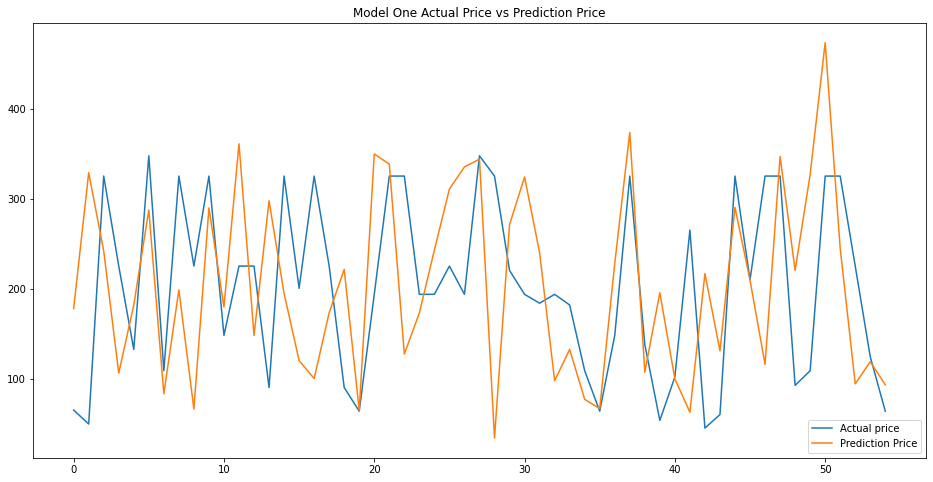

In [21]:
plt.figure(figsize=(16,8))
plt.title('Model One Actual Price vs Prediction Price')
plt.plot(result['0'])
plt.legend(['Actual price', 'Prediction Price'],loc='lower right')
plt.show()

## Training results 

In [22]:
orig_training_x, orig_training_y = x_train, y_train
training_results = model.evaluate(x_train, y_train, batch_size=20)
print(training_results)
training_predictions = model.predict(x_train)
print(training_predictions)

221/221 [==============================] - 0s 77us/sample - loss: 4639.0327 - mae: 29.7944
[4639.032680148992, 29.79444]
[[240.64629 ]
 [ 41.867554]
 [139.82811 ]
 [269.50058 ]
 [322.89014 ]
 [195.65393 ]
 [ 65.060425]
 [322.1254  ]
 [ 51.5622  ]
 [191.77461 ]
 [179.54199 ]
 [ 63.95213 ]
 [179.50066 ]
 [101.505135]
 [222.88565 ]
 [106.05808 ]
 [ 92.183464]
 [118.31196 ]
 [ 43.85135 ]
 [228.21669 ]
 [300.96432 ]
 [133.19699 ]
 [ 91.382515]
 [196.40793 ]
 [307.75293 ]
 [112.43333 ]
 [327.7368  ]
 [116.91219 ]
 [222.8918  ]
 [111.051636]
 [341.0782  ]
 [209.28473 ]
 [202.79195 ]
 [194.43149 ]
 [ 63.408253]
 [255.3282  ]
 [ 95.529625]
 [318.09546 ]
 [ 42.628735]
 [332.6264  ]
 [232.13223 ]
 [225.22134 ]
 [121.6924  ]
 [121.8976  ]
 [230.1051  ]
 [210.61691 ]
 [336.14963 ]
 [112.04256 ]
 [249.22266 ]
 [113.96415 ]
 [218.03923 ]
 [188.40535 ]
 [219.22295 ]
 [111.3719  ]
 [ 88.82425 ]
 [ 78.77764 ]
 [254.76202 ]
 [ 87.20712 ]
 [245.49771 ]
 [209.2379  ]
 [ 14.866787]
 [ 87.49264 ]
 [270.0759 

## Training positives vs predictions in a dataframe for easy graphing

In [23]:
training_pos_df = pd.DataFrame(y_train)
training_prediction_df = pd.DataFrame(training_predictions) 
training_result = pd.concat([training_pos_df, training_prediction_df], axis=1, join='inner')
training_result

,0,0
0,225.00,240.646286
1,40.59,41.867554
2,137.74,139.828110
3,265.00,269.500580
4,325.00,322.890137
...,...,...
216,193.60,64.504593
217,193.60,335.615295
218,90.00,45.964306
219,46.00,116.876602


## Visualize the training actual price vs the prediction price

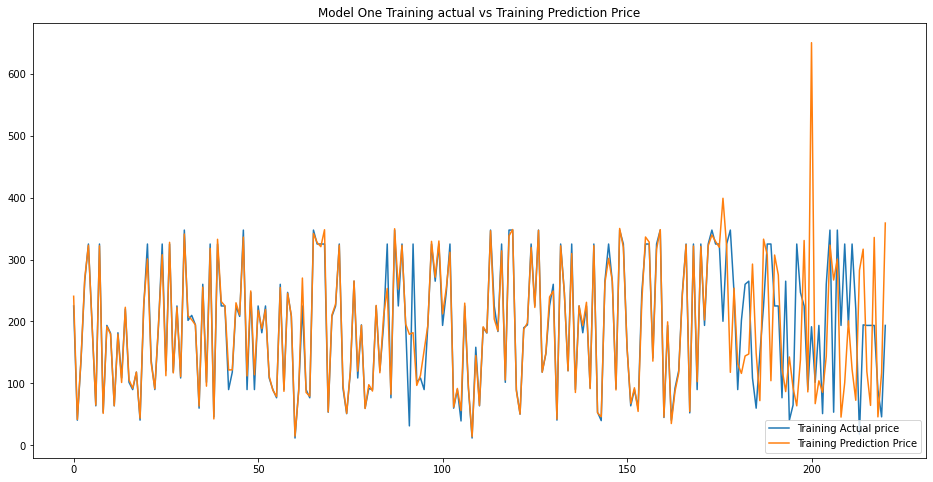

In [24]:
plt.figure(figsize=(16,8))
plt.title('Model One Training actual vs Training Prediction Price')
plt.plot(training_result['0'])
plt.legend(['Training Actual price', 'Training Prediction Price'],loc='lower right')
plt.show()

# Make copies of x and y train and add noise to make the dataset larger artificially for training

In [25]:
#make copy of x_train and add random noise( small amount, like .0001 or so)
#It's ugly I know but it seems to work
x_train = pd.DataFrame(x_train)
x_train2 = pd.DataFrame(x_train.copy() + (random.randint(0,10)/100000))
x_train3 = pd.DataFrame(x_train.copy() + (random.randint(0,10)/100000))
x_train4 = pd.DataFrame(x_train.copy() + (random.randint(0,10)/100000))
x_train5 = pd.DataFrame(x_train.copy() + (random.randint(0,10)/100000))
x_train6 = pd.DataFrame(x_train.copy() + (random.randint(0,10)/100000))
x_train7 = pd.DataFrame(x_train.copy() + (random.randint(0,10)/100000))
x_train8 = pd.DataFrame(x_train.copy() + (random.randint(0,10)/100000))
x_train9 = pd.DataFrame(x_train.copy() + (random.randint(0,10)/100000))
x_train10 = pd.DataFrame(x_train.copy() + (random.randint(0,10)/100000))
x_train11 = pd.DataFrame(x_train.copy() + (random.randint(0,10)/100000))
x_train12 = pd.DataFrame(x_train.copy() + (random.randint(0,10)/100000))
x_train13 = pd.DataFrame(x_train.copy() + (random.randint(0,10)/100000))
x_train14 = pd.DataFrame(x_train.copy() + (random.randint(0,10)/100000))
x_train15 = pd.DataFrame(x_train.copy() + (random.randint(0,10)/100000))
x_train16 = pd.DataFrame(x_train.copy() + (random.randint(0,10)/100000))
x_train17 = pd.DataFrame(x_train.copy() + (random.randint(0,10)/100000))
x_train18 = pd.DataFrame(x_train.copy() + (random.randint(0,10)/100000))
x_train19 = pd.DataFrame(x_train.copy() + (random.randint(0,10)/100000))

x_train = x_train.append(x_train2)
x_train = x_train.append(x_train3)
x_train = x_train.append(x_train4)
x_train = x_train.append(x_train5)
x_train = x_train.append(x_train6)
x_train = x_train.append(x_train7)
x_train = x_train.append(x_train8)
x_train = x_train.append(x_train9)
x_train = x_train.append(x_train10)
x_train = x_train.append(x_train11)
x_train = x_train.append(x_train12)
x_train = x_train.append(x_train13)
x_train = x_train.append(x_train14)
x_train = x_train.append(x_train15)
x_train = x_train.append(x_train16)
x_train = x_train.append(x_train17)
x_train = x_train.append(x_train18)
x_train = x_train.append(x_train19)

In [26]:
#make copy of y_train and add random noise( small amount, like 1 or so)
y_train = pd.DataFrame(y_train)
y_train2 = pd.DataFrame(y_train.copy() + (random.randint(0,9)/10))
y_train3 = pd.DataFrame(y_train.copy() + (random.randint(0,9)/10))
y_train4 = pd.DataFrame(y_train.copy() + (random.randint(0,9)/10))
y_train5 = pd.DataFrame(y_train.copy() + (random.randint(0,9)/10))
y_train6 = pd.DataFrame(y_train.copy() + (random.randint(0,9)/10))
y_train7 = pd.DataFrame(y_train.copy() + (random.randint(0,9)/10))
y_train8 = pd.DataFrame(y_train.copy() + (random.randint(0,9)/10))
y_train9 = pd.DataFrame(y_train.copy() + (random.randint(0,9)/10))
y_train10 =pd.DataFrame(y_train.copy() + (random.randint(0,9)/10))
y_train11 = pd.DataFrame(y_train.copy() + (random.randint(0,9)/10))
y_train12 = pd.DataFrame(y_train.copy() + (random.randint(0,9)/10))
y_train13 = pd.DataFrame(y_train.copy() + (random.randint(0,9)/10))
y_train14 = pd.DataFrame(y_train.copy() + (random.randint(0,9)/10))
y_train15 = pd.DataFrame(y_train.copy() + (random.randint(0,9)/10))
y_train16 = pd.DataFrame(y_train.copy() + (random.randint(0,9)/10))
y_train17 = pd.DataFrame(y_train.copy() + (random.randint(0,9)/10))
y_train18 = pd.DataFrame(y_train.copy() + (random.randint(0,9)/10))
y_train19 =pd.DataFrame(y_train.copy() + (random.randint(0,9)/10))

y_train = y_train.append(y_train2)
y_train = y_train.append(y_train3)
y_train = y_train.append(y_train4)
y_train = y_train.append(y_train5)
y_train = y_train.append(y_train6)
y_train = y_train.append(y_train7)
y_train = y_train.append(y_train8)
y_train = y_train.append(y_train9)
y_train = y_train.append(y_train10)
y_train = y_train.append(y_train11)
y_train = y_train.append(y_train12)
y_train = y_train.append(y_train13)
y_train = y_train.append(y_train14)
y_train = y_train.append(y_train15)
y_train = y_train.append(y_train16)
y_train = y_train.append(y_train17)
y_train = y_train.append(y_train18)
y_train = y_train.append(y_train19)

#concat back into one dataframe to keep correct x and y before shuffling dataset
training_with_noise = pd.concat([x_train, y_train], axis=1, join='inner')
training_with_noise

,0,1,2,3,4,0
0,0.015189,0.011111,0.083524,0.011111,0.904762,225.00
1,0.142111,0.750239,0.000000,0.750239,0.809524,40.59
2,0.018194,0.136735,0.000000,0.136735,0.380952,137.74
3,0.001579,0.029890,0.036613,0.029890,0.809524,265.00
4,0.009223,0.127490,0.000000,0.127490,0.904762,325.00
...,...,...,...,...,...,...
216,0.876571,0.240670,0.000060,0.240670,0.761965,193.90
217,0.006092,0.038044,0.020274,0.038044,0.952441,193.90
218,0.018967,0.059356,0.000060,0.059356,0.857203,90.30
219,0.025591,0.207408,0.000060,0.207408,0.142917,46.30


## Shuffle the new dataset

In [27]:
#shuffle dataset  
train_data = training_with_noise.sample(frac = 1)
train_data

,0,1,2,3,4,0
160,0.171168,0.003018,0.146513,0.003018,0.428631,45.67
169,0.006925,0.022803,0.037817,0.022803,0.904822,90.30
141,0.061078,0.134845,0.000090,0.134845,0.190566,325.60
29,0.063635,0.091962,0.000070,0.091962,0.571499,109.03
156,0.009350,0.063759,0.000050,0.063759,0.857193,325.20
...,...,...,...,...,...,...
1,0.142171,0.750299,0.000060,0.750299,0.809584,40.89
115,0.009085,0.109550,0.000070,0.109550,0.571499,184.05
46,0.009535,0.019883,0.028674,0.019883,0.952451,347.81
37,0.049143,0.192536,0.228833,0.192536,0.285714,325.00


## Split the dataset into x and y training again

In [28]:
#split dataset into x,y training again
train_data = train_data.values
train_data.shape
x_train = train_data[:, 0:5]
y_train = train_data[:, 5:]
print("x training dataset shape: ", x_train.shape)
print("y training dataset shape: ", y_train.shape)

x training dataset shape:  (4199, 5)
y training dataset shape:  (4199, 1)


In [29]:
model2 = tf.keras.models.Sequential()
#layers
model2.add(tf.keras.layers.Dense(1024, activation='relu'))
model2.add(tf.keras.layers.Dense(512, activation='relu'))
model2.add(tf.keras.layers.Dense(256, activation='relu'))
model2.add(tf.keras.layers.Dense(128, activation='relu'))
model2.add(tf.keras.layers.Dense(64, activation='relu'))
model2.add(tf.keras.layers.Dense(36, activation='relu'))
model2.add(tf.keras.layers.Dense(16, activation='relu'))
model2.add(tf.keras.layers.Dense(8, activation='relu'))
model2.add(tf.keras.layers.Dense(4, activation='relu'))
model2.add(tf.keras.layers.Dense(1, ))

# Compile the model 

In [30]:
model2.compile(loss='mse',
             optimizer=tf.keras.optimizers.Adam(learning_rate=0.0008),
             metrics=['mae'])

# Train the model with new data and new learning rate

In [31]:
model2.fit(
    x=x_train, 
    y=y_train,
    validation_split=0.2,
    batch_size=256, 
    epochs=4000
)

Train on 3359 samples, validate on 840 samples
Epoch 1/4000
3359/3359 [==============================] - 1s 220us/sample - loss: 45891.5104 - mae: 188.5853 - val_loss: 45923.6832 - val_mae: 190.3864
Epoch 2/4000
3359/3359 [==============================] - 0s 41us/sample - loss: 28192.2167 - mae: 137.8268 - val_loss: 12194.1840 - val_mae: 90.6916
Epoch 3/4000
3359/3359 [==============================] - 0s 39us/sample - loss: 11874.6463 - mae: 91.1579 - val_loss: 10651.8006 - val_mae: 86.5225
Epoch 4/4000
3359/3359 [==============================] - 0s 42us/sample - loss: 9623.9381 - mae: 83.4137 - val_loss: 8554.8121 - val_mae: 79.2874
Epoch 5/4000
3359/3359 [==============================] - 0s 40us/sample - loss: 9116.6177 - mae: 81.4698 - val_loss: 8245.7583 - val_mae: 77.2585
Epoch 6/4000
3359/3359 [==============================] - 0s 42us/sample - loss: 9053.3857 - mae: 80.9994 - val_loss: 8423.5755 - val_mae: 78.3586
Epoch 7/4000
3359/3359 [==============================] - 0s 

3359/3359 [==============================] - 0s 43us/sample - loss: 7419.6273 - mae: 72.3936 - val_loss: 6831.6840 - val_mae: 69.5111
Epoch 57/4000
3359/3359 [==============================] - 0s 46us/sample - loss: 7324.7352 - mae: 71.1611 - val_loss: 7113.0113 - val_mae: 70.4629
Epoch 58/4000
3359/3359 [==============================] - 0s 45us/sample - loss: 7447.5178 - mae: 71.6145 - val_loss: 6843.5147 - val_mae: 69.4707
Epoch 59/4000
3359/3359 [==============================] - 0s 43us/sample - loss: 7379.0249 - mae: 71.6076 - val_loss: 6792.9311 - val_mae: 69.2013
Epoch 60/4000
3359/3359 [==============================] - 0s 42us/sample - loss: 7292.6819 - mae: 70.9339 - val_loss: 6691.2847 - val_mae: 68.8937
Epoch 61/4000
3359/3359 [==============================] - 0s 42us/sample - loss: 7194.0800 - mae: 70.6494 - val_loss: 6758.8410 - val_mae: 68.9575
Epoch 62/4000
3359/3359 [==============================] - 0s 42us/sample - loss: 7163.0450 - mae: 70.0513 - val_loss: 6567.24

3359/3359 [==============================] - 0s 44us/sample - loss: 5663.9042 - mae: 59.5575 - val_loss: 5456.1068 - val_mae: 58.1704
Epoch 112/4000
3359/3359 [==============================] - 0s 44us/sample - loss: 5673.5826 - mae: 60.0651 - val_loss: 5466.7653 - val_mae: 59.8365
Epoch 113/4000
3359/3359 [==============================] - 0s 42us/sample - loss: 5987.1839 - mae: 61.4277 - val_loss: 5253.2753 - val_mae: 57.6469
Epoch 114/4000
3359/3359 [==============================] - 0s 42us/sample - loss: 5877.7535 - mae: 61.1617 - val_loss: 5275.8762 - val_mae: 57.8131
Epoch 115/4000
3359/3359 [==============================] - 0s 43us/sample - loss: 5771.2138 - mae: 61.2120 - val_loss: 5669.6116 - val_mae: 61.4833
Epoch 116/4000
3359/3359 [==============================] - 0s 42us/sample - loss: 5840.7394 - mae: 60.8069 - val_loss: 6779.0163 - val_mae: 63.6937
Epoch 117/4000
3359/3359 [==============================] - 0s 43us/sample - loss: 6434.8457 - mae: 64.2444 - val_loss: 5

Epoch 166/4000
3359/3359 [==============================] - 0s 45us/sample - loss: 5082.9449 - mae: 55.7227 - val_loss: 4397.5388 - val_mae: 50.9382
Epoch 167/4000
3359/3359 [==============================] - 0s 43us/sample - loss: 4933.6600 - mae: 53.7629 - val_loss: 5380.2633 - val_mae: 57.6185
Epoch 168/4000
3359/3359 [==============================] - 0s 42us/sample - loss: 5314.0325 - mae: 57.5546 - val_loss: 6134.2066 - val_mae: 61.7037
Epoch 169/4000
3359/3359 [==============================] - 0s 43us/sample - loss: 5268.6431 - mae: 57.0209 - val_loss: 4900.3797 - val_mae: 53.7083
Epoch 170/4000
3359/3359 [==============================] - 0s 43us/sample - loss: 4893.4867 - mae: 53.9870 - val_loss: 4347.2115 - val_mae: 50.2354
Epoch 171/4000
3359/3359 [==============================] - 0s 42us/sample - loss: 4845.3308 - mae: 53.6613 - val_loss: 4486.5274 - val_mae: 51.9664
Epoch 172/4000
3359/3359 [==============================] - 0s 43us/sample - loss: 4876.2995 - mae: 53.537

Epoch 221/4000
3359/3359 [==============================] - 0s 44us/sample - loss: 4089.6414 - mae: 47.0913 - val_loss: 3506.7473 - val_mae: 43.3248
Epoch 222/4000
3359/3359 [==============================] - 0s 44us/sample - loss: 3934.7307 - mae: 45.4485 - val_loss: 3565.4379 - val_mae: 44.5680
Epoch 223/4000
3359/3359 [==============================] - 0s 42us/sample - loss: 3912.2309 - mae: 45.6512 - val_loss: 3515.6941 - val_mae: 43.7188
Epoch 224/4000
3359/3359 [==============================] - 0s 43us/sample - loss: 3900.7571 - mae: 45.8352 - val_loss: 3674.3971 - val_mae: 45.6544
Epoch 225/4000
3359/3359 [==============================] - 0s 42us/sample - loss: 4060.6701 - mae: 46.9435 - val_loss: 3609.8389 - val_mae: 43.4367
Epoch 226/4000
3359/3359 [==============================] - 0s 42us/sample - loss: 4042.0980 - mae: 46.6013 - val_loss: 3531.8823 - val_mae: 44.0243
Epoch 227/4000
3359/3359 [==============================] - 0s 45us/sample - loss: 4027.4382 - mae: 47.175

Epoch 276/4000
3359/3359 [==============================] - 0s 43us/sample - loss: 3623.6136 - mae: 43.7940 - val_loss: 3104.6174 - val_mae: 41.1098
Epoch 277/4000
3359/3359 [==============================] - 0s 42us/sample - loss: 3300.7795 - mae: 40.5086 - val_loss: 2760.4615 - val_mae: 36.1100
Epoch 278/4000
3359/3359 [==============================] - 0s 44us/sample - loss: 3169.8473 - mae: 39.1455 - val_loss: 2810.0909 - val_mae: 36.4030
Epoch 279/4000
3359/3359 [==============================] - 0s 44us/sample - loss: 3251.0867 - mae: 39.6730 - val_loss: 2904.1089 - val_mae: 37.6862
Epoch 280/4000
3359/3359 [==============================] - 0s 43us/sample - loss: 3372.3829 - mae: 41.3675 - val_loss: 3193.5496 - val_mae: 40.6691
Epoch 281/4000
3359/3359 [==============================] - 0s 44us/sample - loss: 3283.7026 - mae: 41.1924 - val_loss: 3163.8507 - val_mae: 40.8259
Epoch 282/4000
3359/3359 [==============================] - 0s 44us/sample - loss: 3385.8347 - mae: 42.074

Epoch 331/4000
3359/3359 [==============================] - 0s 42us/sample - loss: 3541.5248 - mae: 42.4973 - val_loss: 2789.9896 - val_mae: 36.0717
Epoch 332/4000
3359/3359 [==============================] - 0s 42us/sample - loss: 3149.8878 - mae: 40.3691 - val_loss: 2994.0019 - val_mae: 38.8865
Epoch 333/4000
3359/3359 [==============================] - 0s 42us/sample - loss: 2746.5887 - mae: 35.9019 - val_loss: 2440.0037 - val_mae: 33.5534
Epoch 334/4000
3359/3359 [==============================] - 0s 42us/sample - loss: 2881.7191 - mae: 37.1964 - val_loss: 2364.1312 - val_mae: 33.5666
Epoch 335/4000
3359/3359 [==============================] - 0s 43us/sample - loss: 2658.1418 - mae: 35.5211 - val_loss: 2362.2717 - val_mae: 32.3024
Epoch 336/4000
3359/3359 [==============================] - 0s 44us/sample - loss: 2462.3295 - mae: 33.3042 - val_loss: 2378.3320 - val_mae: 32.2053
Epoch 337/4000
3359/3359 [==============================] - 0s 42us/sample - loss: 2873.3097 - mae: 36.678

Epoch 386/4000
3359/3359 [==============================] - 0s 42us/sample - loss: 1795.4135 - mae: 27.7441 - val_loss: 1657.3985 - val_mae: 25.6411
Epoch 387/4000
3359/3359 [==============================] - 0s 42us/sample - loss: 1646.6436 - mae: 25.2961 - val_loss: 2014.6856 - val_mae: 28.6624
Epoch 388/4000
3359/3359 [==============================] - 0s 43us/sample - loss: 1862.4880 - mae: 28.1510 - val_loss: 1722.7275 - val_mae: 26.7167
Epoch 389/4000
3359/3359 [==============================] - 0s 43us/sample - loss: 1771.8713 - mae: 26.7515 - val_loss: 1672.2007 - val_mae: 25.3197
Epoch 390/4000
3359/3359 [==============================] - 0s 44us/sample - loss: 1684.3995 - mae: 25.4768 - val_loss: 2026.7523 - val_mae: 28.4531
Epoch 391/4000
3359/3359 [==============================] - 0s 44us/sample - loss: 1762.3393 - mae: 26.6442 - val_loss: 1643.7245 - val_mae: 24.5305
Epoch 392/4000
3359/3359 [==============================] - 0s 42us/sample - loss: 1824.4734 - mae: 27.485

Epoch 441/4000
3359/3359 [==============================] - 0s 42us/sample - loss: 1387.8523 - mae: 22.7437 - val_loss: 1636.1806 - val_mae: 24.1870
Epoch 442/4000
3359/3359 [==============================] - 0s 42us/sample - loss: 1486.2585 - mae: 23.7934 - val_loss: 1520.7574 - val_mae: 23.9692
Epoch 443/4000
3359/3359 [==============================] - 0s 43us/sample - loss: 1286.4973 - mae: 21.5026 - val_loss: 1451.8734 - val_mae: 24.0805
Epoch 444/4000
3359/3359 [==============================] - 0s 43us/sample - loss: 1314.6998 - mae: 21.6636 - val_loss: 1502.8709 - val_mae: 21.4108
Epoch 445/4000
3359/3359 [==============================] - 0s 43us/sample - loss: 1278.4015 - mae: 21.3228 - val_loss: 1364.3563 - val_mae: 21.9487
Epoch 446/4000
3359/3359 [==============================] - 0s 43us/sample - loss: 1272.4423 - mae: 21.4799 - val_loss: 1384.3031 - val_mae: 23.0723
Epoch 447/4000
3359/3359 [==============================] - 0s 42us/sample - loss: 1311.1671 - mae: 22.075

Epoch 496/4000
3359/3359 [==============================] - 0s 43us/sample - loss: 1348.3314 - mae: 23.0819 - val_loss: 2049.6574 - val_mae: 30.1717
Epoch 497/4000
3359/3359 [==============================] - 0s 42us/sample - loss: 1306.0902 - mae: 23.1882 - val_loss: 1439.6725 - val_mae: 24.3140
Epoch 498/4000
3359/3359 [==============================] - 0s 42us/sample - loss: 1714.3810 - mae: 26.2714 - val_loss: 1747.0396 - val_mae: 27.3210
Epoch 499/4000
3359/3359 [==============================] - 0s 43us/sample - loss: 1289.1812 - mae: 23.1515 - val_loss: 1222.7321 - val_mae: 21.3124
Epoch 500/4000
3359/3359 [==============================] - 0s 44us/sample - loss: 1149.7890 - mae: 21.0357 - val_loss: 1261.3380 - val_mae: 22.0973
Epoch 501/4000
3359/3359 [==============================] - 0s 42us/sample - loss: 1027.6400 - mae: 18.9881 - val_loss: 1109.7360 - val_mae: 19.0376
Epoch 502/4000
3359/3359 [==============================] - 0s 42us/sample - loss: 946.3573 - mae: 17.3675

3359/3359 [==============================] - 0s 50us/sample - loss: 1295.6669 - mae: 22.4079 - val_loss: 1056.8756 - val_mae: 20.2712
Epoch 552/4000
3359/3359 [==============================] - 0s 43us/sample - loss: 1011.4742 - mae: 18.6872 - val_loss: 986.4685 - val_mae: 17.5605
Epoch 553/4000
3359/3359 [==============================] - 0s 43us/sample - loss: 952.8645 - mae: 18.1758 - val_loss: 1109.4643 - val_mae: 18.1986
Epoch 554/4000
3359/3359 [==============================] - 0s 45us/sample - loss: 808.1346 - mae: 15.5699 - val_loss: 888.3629 - val_mae: 15.9206
Epoch 555/4000
3359/3359 [==============================] - 0s 43us/sample - loss: 806.6951 - mae: 15.2951 - val_loss: 818.6284 - val_mae: 13.8405
Epoch 556/4000
3359/3359 [==============================] - 0s 42us/sample - loss: 752.4509 - mae: 14.2834 - val_loss: 928.2838 - val_mae: 17.1075
Epoch 557/4000
3359/3359 [==============================] - 0s 43us/sample - loss: 766.9576 - mae: 14.9510 - val_loss: 923.6684 -

Epoch 607/4000
3359/3359 [==============================] - 0s 43us/sample - loss: 677.7234 - mae: 14.0489 - val_loss: 784.9631 - val_mae: 15.9204
Epoch 608/4000
3359/3359 [==============================] - 0s 45us/sample - loss: 631.6695 - mae: 13.5760 - val_loss: 1122.3802 - val_mae: 19.4138
Epoch 609/4000
3359/3359 [==============================] - 0s 43us/sample - loss: 834.7495 - mae: 16.9289 - val_loss: 1079.6483 - val_mae: 17.8767
Epoch 610/4000
3359/3359 [==============================] - 0s 42us/sample - loss: 941.1039 - mae: 18.3533 - val_loss: 1767.1464 - val_mae: 27.7331
Epoch 611/4000
3359/3359 [==============================] - 0s 43us/sample - loss: 1362.8962 - mae: 23.3376 - val_loss: 916.7713 - val_mae: 18.5565
Epoch 612/4000
3359/3359 [==============================] - 0s 45us/sample - loss: 801.0596 - mae: 17.0729 - val_loss: 915.2661 - val_mae: 18.6810
Epoch 613/4000
3359/3359 [==============================] - 0s 48us/sample - loss: 659.4016 - mae: 14.5029 - val_l

3359/3359 [==============================] - 0s 44us/sample - loss: 895.9427 - mae: 17.3944 - val_loss: 829.1390 - val_mae: 16.9590
Epoch 663/4000
3359/3359 [==============================] - 0s 42us/sample - loss: 880.5437 - mae: 17.2282 - val_loss: 1238.4843 - val_mae: 19.9064
Epoch 664/4000
3359/3359 [==============================] - 0s 42us/sample - loss: 1231.4403 - mae: 20.7613 - val_loss: 1087.1297 - val_mae: 19.1228
Epoch 665/4000
3359/3359 [==============================] - 0s 42us/sample - loss: 931.3435 - mae: 17.6224 - val_loss: 909.9761 - val_mae: 19.0016
Epoch 666/4000
3359/3359 [==============================] - 0s 42us/sample - loss: 828.8270 - mae: 16.5906 - val_loss: 1239.8147 - val_mae: 20.9369
Epoch 667/4000
3359/3359 [==============================] - 0s 42us/sample - loss: 885.1158 - mae: 17.8712 - val_loss: 1132.6589 - val_mae: 21.1269
Epoch 668/4000
3359/3359 [==============================] - 0s 44us/sample - loss: 842.9924 - mae: 16.9566 - val_loss: 811.3641 

3359/3359 [==============================] - 0s 43us/sample - loss: 478.7379 - mae: 11.7006 - val_loss: 579.2164 - val_mae: 14.1457
Epoch 718/4000
3359/3359 [==============================] - 0s 42us/sample - loss: 508.2105 - mae: 12.3659 - val_loss: 540.0478 - val_mae: 11.6984
Epoch 719/4000
3359/3359 [==============================] - 0s 43us/sample - loss: 456.8637 - mae: 10.8298 - val_loss: 569.5364 - val_mae: 11.5397
Epoch 720/4000
3359/3359 [==============================] - 0s 45us/sample - loss: 514.9341 - mae: 12.3817 - val_loss: 526.5006 - val_mae: 11.5426
Epoch 721/4000
3359/3359 [==============================] - 0s 43us/sample - loss: 426.6606 - mae: 10.8384 - val_loss: 412.2392 - val_mae: 10.4351
Epoch 722/4000
3359/3359 [==============================] - 0s 43us/sample - loss: 427.9206 - mae: 10.3593 - val_loss: 517.3249 - val_mae: 11.3957
Epoch 723/4000
3359/3359 [==============================] - 0s 44us/sample - loss: 484.3397 - mae: 11.4514 - val_loss: 447.8567 - val

3359/3359 [==============================] - 0s 42us/sample - loss: 602.9349 - mae: 13.9573 - val_loss: 618.0203 - val_mae: 14.2177
Epoch 774/4000
3359/3359 [==============================] - 0s 42us/sample - loss: 457.9824 - mae: 11.5968 - val_loss: 338.3337 - val_mae: 8.5882
Epoch 775/4000
3359/3359 [==============================] - 0s 42us/sample - loss: 323.9922 - mae: 8.3570 - val_loss: 356.0191 - val_mae: 8.1302
Epoch 776/4000
3359/3359 [==============================] - 0s 43us/sample - loss: 303.9753 - mae: 7.5968 - val_loss: 422.2025 - val_mae: 9.8790
Epoch 777/4000
3359/3359 [==============================] - 0s 44us/sample - loss: 312.2266 - mae: 7.6097 - val_loss: 340.8415 - val_mae: 6.8727
Epoch 778/4000
3359/3359 [==============================] - 0s 43us/sample - loss: 296.1941 - mae: 7.3236 - val_loss: 368.5742 - val_mae: 7.4154
Epoch 779/4000
3359/3359 [==============================] - 0s 42us/sample - loss: 333.9021 - mae: 8.0655 - val_loss: 415.6568 - val_mae: 9.39

3359/3359 [==============================] - 0s 43us/sample - loss: 363.2381 - mae: 9.8468 - val_loss: 398.5406 - val_mae: 9.3911
Epoch 830/4000
3359/3359 [==============================] - 0s 46us/sample - loss: 385.0959 - mae: 9.7524 - val_loss: 639.4680 - val_mae: 13.2030
Epoch 831/4000
3359/3359 [==============================] - 0s 44us/sample - loss: 460.6477 - mae: 11.4804 - val_loss: 368.7895 - val_mae: 10.1343
Epoch 832/4000
3359/3359 [==============================] - 0s 45us/sample - loss: 316.6980 - mae: 8.7508 - val_loss: 324.2231 - val_mae: 8.8916
Epoch 833/4000
3359/3359 [==============================] - 0s 43us/sample - loss: 268.2552 - mae: 7.8903 - val_loss: 257.2195 - val_mae: 7.1366
Epoch 834/4000
3359/3359 [==============================] - 0s 42us/sample - loss: 245.3903 - mae: 6.5673 - val_loss: 297.1128 - val_mae: 6.8839
Epoch 835/4000
3359/3359 [==============================] - 0s 43us/sample - loss: 242.0029 - mae: 5.7886 - val_loss: 443.1802 - val_mae: 10.2

3359/3359 [==============================] - 0s 43us/sample - loss: 228.7809 - mae: 5.0012 - val_loss: 292.9493 - val_mae: 7.4472
Epoch 886/4000
3359/3359 [==============================] - 0s 43us/sample - loss: 266.7416 - mae: 6.5395 - val_loss: 313.2287 - val_mae: 6.5710
Epoch 887/4000
3359/3359 [==============================] - 0s 44us/sample - loss: 267.9619 - mae: 6.5615 - val_loss: 387.8711 - val_mae: 6.6832
Epoch 888/4000
3359/3359 [==============================] - 0s 43us/sample - loss: 279.9234 - mae: 7.1584 - val_loss: 440.1992 - val_mae: 11.7673
Epoch 889/4000
3359/3359 [==============================] - 0s 42us/sample - loss: 315.6991 - mae: 8.0110 - val_loss: 351.8212 - val_mae: 7.7030
Epoch 890/4000
3359/3359 [==============================] - 0s 45us/sample - loss: 267.4641 - mae: 6.6303 - val_loss: 257.9204 - val_mae: 5.4194
Epoch 891/4000
3359/3359 [==============================] - 0s 44us/sample - loss: 254.8267 - mae: 6.1046 - val_loss: 737.1633 - val_mae: 15.689

3359/3359 [==============================] - 0s 45us/sample - loss: 237.2576 - mae: 5.8962 - val_loss: 271.7135 - val_mae: 5.8128
Epoch 942/4000
3359/3359 [==============================] - 0s 43us/sample - loss: 242.8514 - mae: 5.5995 - val_loss: 283.9056 - val_mae: 6.5345
Epoch 943/4000
3359/3359 [==============================] - 0s 42us/sample - loss: 219.6375 - mae: 5.1021 - val_loss: 260.0069 - val_mae: 4.5975
Epoch 944/4000
3359/3359 [==============================] - 0s 42us/sample - loss: 203.9500 - mae: 3.9257 - val_loss: 277.4895 - val_mae: 5.2129
Epoch 945/4000
3359/3359 [==============================] - 0s 43us/sample - loss: 223.0880 - mae: 4.9318 - val_loss: 345.3406 - val_mae: 6.4362
Epoch 946/4000
3359/3359 [==============================] - 0s 43us/sample - loss: 278.6398 - mae: 6.9614 - val_loss: 338.2858 - val_mae: 7.5836
Epoch 947/4000
3359/3359 [==============================] - 0s 42us/sample - loss: 269.4975 - mae: 6.8639 - val_loss: 288.0593 - val_mae: 6.8922


3359/3359 [==============================] - 0s 42us/sample - loss: 220.4718 - mae: 5.2564 - val_loss: 271.9318 - val_mae: 5.9273
Epoch 998/4000
3359/3359 [==============================] - 0s 42us/sample - loss: 216.3595 - mae: 4.5802 - val_loss: 330.4095 - val_mae: 6.9752
Epoch 999/4000
3359/3359 [==============================] - 0s 42us/sample - loss: 230.7473 - mae: 5.3597 - val_loss: 272.9145 - val_mae: 6.9823
Epoch 1000/4000
3359/3359 [==============================] - 0s 43us/sample - loss: 253.3510 - mae: 6.4630 - val_loss: 322.9145 - val_mae: 7.6814
Epoch 1001/4000
3359/3359 [==============================] - 0s 43us/sample - loss: 231.8784 - mae: 5.4452 - val_loss: 276.0823 - val_mae: 5.7368
Epoch 1002/4000
3359/3359 [==============================] - 0s 44us/sample - loss: 209.8332 - mae: 4.6537 - val_loss: 282.8493 - val_mae: 4.6707
Epoch 1003/4000
3359/3359 [==============================] - 0s 44us/sample - loss: 215.3261 - mae: 4.6379 - val_loss: 287.8928 - val_mae: 5.6

3359/3359 [==============================] - 0s 42us/sample - loss: 210.5900 - mae: 4.6157 - val_loss: 283.2652 - val_mae: 5.2995
Epoch 1054/4000
3359/3359 [==============================] - 0s 43us/sample - loss: 211.3029 - mae: 4.3840 - val_loss: 265.5344 - val_mae: 5.0991
Epoch 1055/4000
3359/3359 [==============================] - 0s 43us/sample - loss: 228.2850 - mae: 5.0606 - val_loss: 330.1008 - val_mae: 6.3632
Epoch 1056/4000
3359/3359 [==============================] - 0s 42us/sample - loss: 245.5434 - mae: 5.7352 - val_loss: 323.9520 - val_mae: 6.1595
Epoch 1057/4000
3359/3359 [==============================] - 0s 45us/sample - loss: 244.3667 - mae: 6.2594 - val_loss: 261.6577 - val_mae: 6.3066
Epoch 1058/4000
3359/3359 [==============================] - 0s 43us/sample - loss: 252.8540 - mae: 5.8661 - val_loss: 311.0673 - val_mae: 6.6844
Epoch 1059/4000
3359/3359 [==============================] - 0s 42us/sample - loss: 310.0659 - mae: 7.5823 - val_loss: 307.2110 - val_mae: 7

3359/3359 [==============================] - 0s 45us/sample - loss: 241.6126 - mae: 5.7868 - val_loss: 283.7664 - val_mae: 6.1986
Epoch 1110/4000
3359/3359 [==============================] - 0s 44us/sample - loss: 246.7887 - mae: 6.6288 - val_loss: 293.1053 - val_mae: 6.2762
Epoch 1111/4000
3359/3359 [==============================] - 0s 43us/sample - loss: 228.4700 - mae: 5.5513 - val_loss: 280.0406 - val_mae: 5.4958
Epoch 1112/4000
3359/3359 [==============================] - 0s 41us/sample - loss: 223.5551 - mae: 5.2305 - val_loss: 277.8183 - val_mae: 6.4701
Epoch 1113/4000
3359/3359 [==============================] - 0s 45us/sample - loss: 221.3167 - mae: 5.4102 - val_loss: 307.3408 - val_mae: 7.5585
Epoch 1114/4000
3359/3359 [==============================] - 0s 42us/sample - loss: 273.4736 - mae: 7.0375 - val_loss: 304.8664 - val_mae: 6.1221
Epoch 1115/4000
3359/3359 [==============================] - 0s 42us/sample - loss: 226.2221 - mae: 5.3486 - val_loss: 293.7826 - val_mae: 6

3359/3359 [==============================] - 0s 44us/sample - loss: 288.8189 - mae: 6.9330 - val_loss: 351.8983 - val_mae: 7.5897
Epoch 1166/4000
3359/3359 [==============================] - 0s 42us/sample - loss: 251.1297 - mae: 6.2384 - val_loss: 326.4029 - val_mae: 6.8917
Epoch 1167/4000
3359/3359 [==============================] - 0s 42us/sample - loss: 292.2365 - mae: 7.1221 - val_loss: 307.5578 - val_mae: 7.6831
Epoch 1168/4000
3359/3359 [==============================] - 0s 42us/sample - loss: 239.4298 - mae: 6.3465 - val_loss: 255.1366 - val_mae: 5.2094
Epoch 1169/4000
3359/3359 [==============================] - 0s 42us/sample - loss: 213.1244 - mae: 4.8961 - val_loss: 248.3385 - val_mae: 5.8897
Epoch 1170/4000
3359/3359 [==============================] - 0s 46us/sample - loss: 206.4146 - mae: 4.6244 - val_loss: 270.6812 - val_mae: 6.5728
Epoch 1171/4000
3359/3359 [==============================] - 0s 49us/sample - loss: 241.3489 - mae: 5.7363 - val_loss: 290.3963 - val_mae: 7

3359/3359 [==============================] - 0s 42us/sample - loss: 221.6300 - mae: 5.4132 - val_loss: 264.8832 - val_mae: 4.6405
Epoch 1222/4000
3359/3359 [==============================] - 0s 42us/sample - loss: 204.5613 - mae: 4.0263 - val_loss: 262.8203 - val_mae: 4.7582
Epoch 1223/4000
3359/3359 [==============================] - 0s 42us/sample - loss: 197.4232 - mae: 3.5603 - val_loss: 258.6211 - val_mae: 4.2969
Epoch 1224/4000
3359/3359 [==============================] - 0s 42us/sample - loss: 206.9386 - mae: 4.2164 - val_loss: 268.1709 - val_mae: 4.8435
Epoch 1225/4000
3359/3359 [==============================] - 0s 43us/sample - loss: 205.6256 - mae: 3.9676 - val_loss: 243.5389 - val_mae: 3.5124
Epoch 1226/4000
3359/3359 [==============================] - 0s 45us/sample - loss: 197.1356 - mae: 3.2988 - val_loss: 255.8182 - val_mae: 3.7649
Epoch 1227/4000
3359/3359 [==============================] - 0s 42us/sample - loss: 194.1582 - mae: 3.3510 - val_loss: 238.4619 - val_mae: 4

3359/3359 [==============================] - 0s 42us/sample - loss: 204.0264 - mae: 4.8771 - val_loss: 261.8490 - val_mae: 4.5522
Epoch 1278/4000
3359/3359 [==============================] - 0s 43us/sample - loss: 189.4348 - mae: 3.8603 - val_loss: 216.0731 - val_mae: 3.8856
Epoch 1279/4000
3359/3359 [==============================] - 0s 42us/sample - loss: 188.9970 - mae: 4.1628 - val_loss: 251.8491 - val_mae: 4.4355
Epoch 1280/4000
3359/3359 [==============================] - 0s 46us/sample - loss: 190.6599 - mae: 3.6276 - val_loss: 238.7331 - val_mae: 3.7054
Epoch 1281/4000
3359/3359 [==============================] - 0s 44us/sample - loss: 180.8540 - mae: 3.5217 - val_loss: 234.8305 - val_mae: 4.3966
Epoch 1282/4000
3359/3359 [==============================] - 0s 42us/sample - loss: 181.1385 - mae: 3.2724 - val_loss: 252.5159 - val_mae: 3.5304
Epoch 1283/4000
3359/3359 [==============================] - 0s 43us/sample - loss: 190.5115 - mae: 3.9289 - val_loss: 309.8086 - val_mae: 5

3359/3359 [==============================] - 0s 46us/sample - loss: 282.1005 - mae: 7.8934 - val_loss: 315.8049 - val_mae: 6.1163
Epoch 1334/4000
3359/3359 [==============================] - 0s 49us/sample - loss: 292.6115 - mae: 7.6576 - val_loss: 370.7290 - val_mae: 6.8362
Epoch 1335/4000
3359/3359 [==============================] - 0s 50us/sample - loss: 404.8750 - mae: 8.5681 - val_loss: 469.1921 - val_mae: 9.3077
Epoch 1336/4000
3359/3359 [==============================] - 0s 48us/sample - loss: 354.1859 - mae: 8.2829 - val_loss: 539.8960 - val_mae: 11.0181
Epoch 1337/4000
3359/3359 [==============================] - 0s 47us/sample - loss: 384.0417 - mae: 9.8959 - val_loss: 484.5290 - val_mae: 9.1527
Epoch 1338/4000
3359/3359 [==============================] - 0s 50us/sample - loss: 306.3994 - mae: 7.6309 - val_loss: 316.8986 - val_mae: 6.2125
Epoch 1339/4000
3359/3359 [==============================] - 0s 46us/sample - loss: 235.9431 - mae: 6.3237 - val_loss: 288.0730 - val_mae: 

3359/3359 [==============================] - 0s 45us/sample - loss: 191.0481 - mae: 2.8212 - val_loss: 266.8209 - val_mae: 5.4153
Epoch 1390/4000
3359/3359 [==============================] - 0s 43us/sample - loss: 197.1676 - mae: 4.1618 - val_loss: 241.1052 - val_mae: 4.1560
Epoch 1391/4000
3359/3359 [==============================] - 0s 43us/sample - loss: 195.0790 - mae: 3.5807 - val_loss: 282.4211 - val_mae: 5.5469
Epoch 1392/4000
3359/3359 [==============================] - 0s 44us/sample - loss: 364.3747 - mae: 6.9842 - val_loss: 1040.2332 - val_mae: 13.7845
Epoch 1393/4000
3359/3359 [==============================] - 0s 44us/sample - loss: 989.8214 - mae: 16.2961 - val_loss: 1265.9242 - val_mae: 19.0321
Epoch 1394/4000
3359/3359 [==============================] - 0s 43us/sample - loss: 1123.8859 - mae: 18.9901 - val_loss: 1058.4331 - val_mae: 18.9666
Epoch 1395/4000
3359/3359 [==============================] - 0s 44us/sample - loss: 579.4777 - mae: 13.7001 - val_loss: 529.2574 - 

Epoch 1445/4000
3359/3359 [==============================] - 0s 48us/sample - loss: 191.7269 - mae: 3.3596 - val_loss: 262.7860 - val_mae: 6.0960
Epoch 1446/4000
3359/3359 [==============================] - 0s 52us/sample - loss: 212.6196 - mae: 4.6853 - val_loss: 232.8149 - val_mae: 3.9749
Epoch 1447/4000
3359/3359 [==============================] - 0s 46us/sample - loss: 202.3014 - mae: 4.1583 - val_loss: 249.5809 - val_mae: 4.1020
Epoch 1448/4000
3359/3359 [==============================] - 0s 44us/sample - loss: 227.3313 - mae: 4.8101 - val_loss: 339.6196 - val_mae: 8.6995
Epoch 1449/4000
3359/3359 [==============================] - 0s 45us/sample - loss: 272.6546 - mae: 6.5944 - val_loss: 323.2901 - val_mae: 6.4822
Epoch 1450/4000
3359/3359 [==============================] - 0s 45us/sample - loss: 230.9886 - mae: 5.5805 - val_loss: 294.0528 - val_mae: 5.9559
Epoch 1451/4000
3359/3359 [==============================] - 0s 45us/sample - loss: 214.6314 - mae: 4.9056 - val_loss: 316.6

Epoch 1501/4000
3359/3359 [==============================] - 0s 42us/sample - loss: 229.0788 - mae: 5.7754 - val_loss: 273.6995 - val_mae: 4.6651
Epoch 1502/4000
3359/3359 [==============================] - 0s 45us/sample - loss: 203.6620 - mae: 4.5524 - val_loss: 305.5337 - val_mae: 6.4414
Epoch 1503/4000
3359/3359 [==============================] - 0s 42us/sample - loss: 200.7499 - mae: 4.4996 - val_loss: 238.7049 - val_mae: 3.9473
Epoch 1504/4000
3359/3359 [==============================] - 0s 44us/sample - loss: 188.0239 - mae: 3.2839 - val_loss: 230.1964 - val_mae: 3.3583
Epoch 1505/4000
3359/3359 [==============================] - 0s 44us/sample - loss: 185.7761 - mae: 2.8495 - val_loss: 271.7819 - val_mae: 4.1896
Epoch 1506/4000
3359/3359 [==============================] - 0s 45us/sample - loss: 198.3988 - mae: 3.6714 - val_loss: 320.7762 - val_mae: 6.0225
Epoch 1507/4000
3359/3359 [==============================] - 0s 43us/sample - loss: 198.7695 - mae: 4.0214 - val_loss: 263.7

Epoch 1557/4000
3359/3359 [==============================] - 0s 45us/sample - loss: 194.2383 - mae: 3.4495 - val_loss: 297.2128 - val_mae: 5.1591
Epoch 1558/4000
3359/3359 [==============================] - 0s 44us/sample - loss: 204.8725 - mae: 4.1154 - val_loss: 268.0977 - val_mae: 3.4784
Epoch 1559/4000
3359/3359 [==============================] - 0s 48us/sample - loss: 187.2564 - mae: 3.3286 - val_loss: 227.8634 - val_mae: 4.0067
Epoch 1560/4000
3359/3359 [==============================] - 0s 45us/sample - loss: 191.0808 - mae: 3.3623 - val_loss: 404.1802 - val_mae: 9.8956
Epoch 1561/4000
3359/3359 [==============================] - 0s 43us/sample - loss: 421.5574 - mae: 9.8845 - val_loss: 688.4580 - val_mae: 10.1651
Epoch 1562/4000
3359/3359 [==============================] - 0s 46us/sample - loss: 435.4599 - mae: 8.6867 - val_loss: 445.1271 - val_mae: 8.8334
Epoch 1563/4000
3359/3359 [==============================] - 0s 48us/sample - loss: 469.4745 - mae: 10.3632 - val_loss: 686

3359/3359 [==============================] - 0s 42us/sample - loss: 190.6381 - mae: 3.2748 - val_loss: 262.0189 - val_mae: 4.8332
Epoch 1614/4000
3359/3359 [==============================] - 0s 42us/sample - loss: 196.4006 - mae: 3.6007 - val_loss: 248.4909 - val_mae: 3.4222
Epoch 1615/4000
3359/3359 [==============================] - 0s 42us/sample - loss: 188.1396 - mae: 2.9928 - val_loss: 263.3559 - val_mae: 2.9190
Epoch 1616/4000
3359/3359 [==============================] - 0s 45us/sample - loss: 187.2676 - mae: 2.6930 - val_loss: 261.7919 - val_mae: 3.7438
Epoch 1617/4000
3359/3359 [==============================] - 0s 44us/sample - loss: 190.1609 - mae: 3.0066 - val_loss: 255.7795 - val_mae: 3.2691
Epoch 1618/4000
3359/3359 [==============================] - 0s 42us/sample - loss: 191.0078 - mae: 3.2372 - val_loss: 258.6829 - val_mae: 3.1629
Epoch 1619/4000
3359/3359 [==============================] - 0s 42us/sample - loss: 188.2422 - mae: 3.0274 - val_loss: 257.4160 - val_mae: 3

3359/3359 [==============================] - 0s 42us/sample - loss: 188.2371 - mae: 2.9003 - val_loss: 246.3672 - val_mae: 2.8717
Epoch 1670/4000
3359/3359 [==============================] - 0s 45us/sample - loss: 183.9095 - mae: 2.7314 - val_loss: 279.4555 - val_mae: 5.1020
Epoch 1671/4000
3359/3359 [==============================] - 0s 45us/sample - loss: 206.5327 - mae: 4.1328 - val_loss: 376.8989 - val_mae: 6.5300
Epoch 1672/4000
3359/3359 [==============================] - 0s 46us/sample - loss: 226.7443 - mae: 5.1007 - val_loss: 342.4688 - val_mae: 6.0842
Epoch 1673/4000
3359/3359 [==============================] - 0s 43us/sample - loss: 223.0691 - mae: 5.0830 - val_loss: 331.7766 - val_mae: 7.3900
Epoch 1674/4000
3359/3359 [==============================] - 0s 42us/sample - loss: 261.1169 - mae: 6.2355 - val_loss: 346.6300 - val_mae: 6.9559
Epoch 1675/4000
3359/3359 [==============================] - 0s 44us/sample - loss: 305.2756 - mae: 7.4362 - val_loss: 591.4755 - val_mae: 1

Epoch 1725/4000
3359/3359 [==============================] - 0s 43us/sample - loss: 459.4130 - mae: 11.0324 - val_loss: 486.9234 - val_mae: 10.7438
Epoch 1726/4000
3359/3359 [==============================] - 0s 52us/sample - loss: 390.1995 - mae: 9.4068 - val_loss: 514.7587 - val_mae: 9.9807
Epoch 1727/4000
3359/3359 [==============================] - 0s 59us/sample - loss: 393.3499 - mae: 9.1489 - val_loss: 364.9598 - val_mae: 9.2159
Epoch 1728/4000
3359/3359 [==============================] - 0s 59us/sample - loss: 283.8879 - mae: 6.8252 - val_loss: 338.5783 - val_mae: 7.8259
Epoch 1729/4000
3359/3359 [==============================] - 0s 50us/sample - loss: 245.2961 - mae: 6.5784 - val_loss: 264.0676 - val_mae: 6.2706
Epoch 1730/4000
3359/3359 [==============================] - 0s 43us/sample - loss: 233.1956 - mae: 5.6186 - val_loss: 276.2897 - val_mae: 5.0992
Epoch 1731/4000
3359/3359 [==============================] - 0s 42us/sample - loss: 198.6816 - mae: 4.3287 - val_loss: 247

3359/3359 [==============================] - 0s 52us/sample - loss: 207.5026 - mae: 4.3231 - val_loss: 242.6154 - val_mae: 3.8550
Epoch 1782/4000
3359/3359 [==============================] - 0s 51us/sample - loss: 185.7567 - mae: 3.0914 - val_loss: 239.1431 - val_mae: 3.6401
Epoch 1783/4000
3359/3359 [==============================] - 0s 56us/sample - loss: 192.1324 - mae: 3.6057 - val_loss: 242.8184 - val_mae: 2.9922
Epoch 1784/4000
3359/3359 [==============================] - 0s 48us/sample - loss: 190.0175 - mae: 3.5877 - val_loss: 266.3725 - val_mae: 4.9753
Epoch 1785/4000
3359/3359 [==============================] - 0s 50us/sample - loss: 207.2048 - mae: 4.6891 - val_loss: 276.9803 - val_mae: 5.9838
Epoch 1786/4000
3359/3359 [==============================] - 0s 50us/sample - loss: 193.1805 - mae: 4.0440 - val_loss: 261.7824 - val_mae: 4.2901
Epoch 1787/4000
3359/3359 [==============================] - 0s 47us/sample - loss: 196.7950 - mae: 3.5282 - val_loss: 259.1371 - val_mae: 3

3359/3359 [==============================] - 0s 43us/sample - loss: 288.5067 - mae: 8.2778 - val_loss: 298.2465 - val_mae: 6.4481
Epoch 1838/4000
3359/3359 [==============================] - 0s 45us/sample - loss: 275.9058 - mae: 6.9407 - val_loss: 283.9549 - val_mae: 5.6280
Epoch 1839/4000
3359/3359 [==============================] - 0s 48us/sample - loss: 219.5617 - mae: 5.2433 - val_loss: 287.1314 - val_mae: 4.8091
Epoch 1840/4000
3359/3359 [==============================] - 0s 47us/sample - loss: 208.3584 - mae: 4.2305 - val_loss: 293.4254 - val_mae: 4.8462
Epoch 1841/4000
3359/3359 [==============================] - 0s 51us/sample - loss: 201.2791 - mae: 4.1572 - val_loss: 259.2767 - val_mae: 4.2924
Epoch 1842/4000
3359/3359 [==============================] - 0s 50us/sample - loss: 192.7208 - mae: 3.5650 - val_loss: 246.7150 - val_mae: 3.9745
Epoch 1843/4000
3359/3359 [==============================] - 0s 45us/sample - loss: 190.0617 - mae: 3.4776 - val_loss: 263.6665 - val_mae: 5

3359/3359 [==============================] - 0s 50us/sample - loss: 197.5453 - mae: 3.4766 - val_loss: 281.6589 - val_mae: 3.9663
Epoch 1894/4000
3359/3359 [==============================] - 0s 54us/sample - loss: 190.3635 - mae: 3.3627 - val_loss: 254.0577 - val_mae: 3.1601
Epoch 1895/4000
3359/3359 [==============================] - 0s 47us/sample - loss: 182.4371 - mae: 2.6294 - val_loss: 247.6869 - val_mae: 3.1254
Epoch 1896/4000
3359/3359 [==============================] - 0s 52us/sample - loss: 179.4708 - mae: 2.1761 - val_loss: 239.8995 - val_mae: 2.5335
Epoch 1897/4000
3359/3359 [==============================] - 0s 56us/sample - loss: 180.2870 - mae: 2.2271 - val_loss: 253.4340 - val_mae: 3.3291
Epoch 1898/4000
3359/3359 [==============================] - 0s 49us/sample - loss: 180.6726 - mae: 2.5032 - val_loss: 244.9212 - val_mae: 2.3784
Epoch 1899/4000
3359/3359 [==============================] - 0s 51us/sample - loss: 180.5863 - mae: 2.4849 - val_loss: 230.2737 - val_mae: 3

3359/3359 [==============================] - 0s 46us/sample - loss: 294.0645 - mae: 7.7164 - val_loss: 538.9419 - val_mae: 7.9476
Epoch 1950/4000
3359/3359 [==============================] - 0s 51us/sample - loss: 340.3676 - mae: 8.3336 - val_loss: 354.0574 - val_mae: 8.4667
Epoch 1951/4000
3359/3359 [==============================] - 0s 51us/sample - loss: 269.0244 - mae: 7.3630 - val_loss: 313.0473 - val_mae: 7.0736
Epoch 1952/4000
3359/3359 [==============================] - 0s 51us/sample - loss: 224.4917 - mae: 5.3263 - val_loss: 290.6247 - val_mae: 5.1569
Epoch 1953/4000
3359/3359 [==============================] - 0s 53us/sample - loss: 202.7423 - mae: 4.1519 - val_loss: 310.7622 - val_mae: 6.4970
Epoch 1954/4000
3359/3359 [==============================] - 0s 52us/sample - loss: 257.8285 - mae: 5.7024 - val_loss: 325.9855 - val_mae: 5.4160
Epoch 1955/4000
3359/3359 [==============================] - 0s 50us/sample - loss: 231.2518 - mae: 5.0370 - val_loss: 352.7695 - val_mae: 5

3359/3359 [==============================] - 0s 45us/sample - loss: 206.2854 - mae: 4.6184 - val_loss: 268.3885 - val_mae: 3.9907
Epoch 2006/4000
3359/3359 [==============================] - 0s 50us/sample - loss: 190.6299 - mae: 3.4396 - val_loss: 253.9036 - val_mae: 3.3389
Epoch 2007/4000
3359/3359 [==============================] - 0s 51us/sample - loss: 187.0783 - mae: 2.8153 - val_loss: 254.6082 - val_mae: 3.7592
Epoch 2008/4000
3359/3359 [==============================] - 0s 45us/sample - loss: 190.4512 - mae: 3.0190 - val_loss: 240.3827 - val_mae: 3.0175
Epoch 2009/4000
3359/3359 [==============================] - 0s 46us/sample - loss: 187.9828 - mae: 3.1288 - val_loss: 243.3948 - val_mae: 3.3331
Epoch 2010/4000
3359/3359 [==============================] - 0s 50us/sample - loss: 186.9181 - mae: 2.8862 - val_loss: 256.6012 - val_mae: 3.9594
Epoch 2011/4000
3359/3359 [==============================] - 0s 47us/sample - loss: 188.1713 - mae: 3.1343 - val_loss: 243.4445 - val_mae: 2

3359/3359 [==============================] - 0s 55us/sample - loss: 187.7397 - mae: 3.2819 - val_loss: 253.6609 - val_mae: 3.4915
Epoch 2062/4000
3359/3359 [==============================] - 0s 43us/sample - loss: 183.5502 - mae: 2.7675 - val_loss: 248.3623 - val_mae: 3.4350
Epoch 2063/4000
3359/3359 [==============================] - 0s 44us/sample - loss: 182.6218 - mae: 2.7848 - val_loss: 247.6516 - val_mae: 2.9145
Epoch 2064/4000
3359/3359 [==============================] - 0s 48us/sample - loss: 181.9351 - mae: 2.7586 - val_loss: 247.2039 - val_mae: 3.7481
Epoch 2065/4000
3359/3359 [==============================] - 0s 48us/sample - loss: 180.3789 - mae: 2.7242 - val_loss: 264.9466 - val_mae: 3.6017
Epoch 2066/4000
3359/3359 [==============================] - 0s 50us/sample - loss: 203.5012 - mae: 3.9816 - val_loss: 274.3540 - val_mae: 3.6807
Epoch 2067/4000
3359/3359 [==============================] - 0s 47us/sample - loss: 207.7823 - mae: 4.2315 - val_loss: 280.2928 - val_mae: 5

3359/3359 [==============================] - 0s 47us/sample - loss: 963.4385 - mae: 18.3248 - val_loss: 974.1763 - val_mae: 15.8832
Epoch 2118/4000
3359/3359 [==============================] - 0s 45us/sample - loss: 825.8406 - mae: 15.3933 - val_loss: 748.2565 - val_mae: 14.7160
Epoch 2119/4000
3359/3359 [==============================] - 0s 44us/sample - loss: 595.1407 - mae: 13.0026 - val_loss: 763.0052 - val_mae: 14.3520
Epoch 2120/4000
3359/3359 [==============================] - 0s 47us/sample - loss: 511.6707 - mae: 11.6174 - val_loss: 549.9816 - val_mae: 11.9647
Epoch 2121/4000
3359/3359 [==============================] - 0s 43us/sample - loss: 407.4536 - mae: 10.2181 - val_loss: 402.1893 - val_mae: 9.1381
Epoch 2122/4000
3359/3359 [==============================] - 0s 44us/sample - loss: 389.4041 - mae: 9.5296 - val_loss: 511.1874 - val_mae: 10.7204
Epoch 2123/4000
3359/3359 [==============================] - 0s 46us/sample - loss: 348.0636 - mae: 9.5670 - val_loss: 355.3831 - 

3359/3359 [==============================] - 0s 45us/sample - loss: 194.3787 - mae: 4.0442 - val_loss: 289.0240 - val_mae: 5.0335
Epoch 2174/4000
3359/3359 [==============================] - 0s 52us/sample - loss: 205.1830 - mae: 4.4224 - val_loss: 290.9793 - val_mae: 5.2614
Epoch 2175/4000
3359/3359 [==============================] - 0s 44us/sample - loss: 193.2402 - mae: 3.7899 - val_loss: 243.7390 - val_mae: 3.3079
Epoch 2176/4000
3359/3359 [==============================] - 0s 45us/sample - loss: 186.0666 - mae: 3.0811 - val_loss: 228.8644 - val_mae: 3.1184
Epoch 2177/4000
3359/3359 [==============================] - 0s 45us/sample - loss: 186.2344 - mae: 2.9651 - val_loss: 242.9795 - val_mae: 4.8625
Epoch 2178/4000
3359/3359 [==============================] - 0s 42us/sample - loss: 188.2026 - mae: 3.4289 - val_loss: 257.6062 - val_mae: 3.3315
Epoch 2179/4000
3359/3359 [==============================] - 0s 48us/sample - loss: 182.6401 - mae: 2.6989 - val_loss: 236.9901 - val_mae: 2

3359/3359 [==============================] - ETA: 0s - loss: 212.5824 - mae: 4.625 - 0s 46us/sample - loss: 201.4223 - mae: 4.4851 - val_loss: 237.0445 - val_mae: 4.1746
Epoch 2230/4000
3359/3359 [==============================] - 0s 44us/sample - loss: 196.6364 - mae: 3.5212 - val_loss: 272.2748 - val_mae: 4.2307
Epoch 2231/4000
3359/3359 [==============================] - 0s 45us/sample - loss: 213.5516 - mae: 4.4481 - val_loss: 291.3983 - val_mae: 5.0021
Epoch 2232/4000
3359/3359 [==============================] - 0s 47us/sample - loss: 192.4738 - mae: 3.3508 - val_loss: 325.8434 - val_mae: 7.2583
Epoch 2233/4000
3359/3359 [==============================] - 0s 44us/sample - loss: 248.0287 - mae: 5.8254 - val_loss: 319.9231 - val_mae: 6.0892
Epoch 2234/4000
3359/3359 [==============================] - 0s 43us/sample - loss: 214.1648 - mae: 5.1209 - val_loss: 247.0733 - val_mae: 4.1261
Epoch 2235/4000
3359/3359 [==============================] - 0s 43us/sample - loss: 188.4936 - mae: 

Epoch 2285/4000
3359/3359 [==============================] - 0s 46us/sample - loss: 186.0207 - mae: 3.3076 - val_loss: 242.5511 - val_mae: 3.5070
Epoch 2286/4000
3359/3359 [==============================] - 0s 43us/sample - loss: 181.6800 - mae: 2.7103 - val_loss: 223.3521 - val_mae: 3.3703
Epoch 2287/4000
3359/3359 [==============================] - 0s 43us/sample - loss: 210.3345 - mae: 4.1996 - val_loss: 226.0798 - val_mae: 3.7367
Epoch 2288/4000
3359/3359 [==============================] - 0s 43us/sample - loss: 197.4479 - mae: 4.0271 - val_loss: 316.3363 - val_mae: 5.5027
Epoch 2289/4000
3359/3359 [==============================] - 0s 43us/sample - loss: 222.6132 - mae: 4.9925 - val_loss: 255.7767 - val_mae: 4.3350
Epoch 2290/4000
3359/3359 [==============================] - 0s 43us/sample - loss: 348.1723 - mae: 5.4106 - val_loss: 681.1259 - val_mae: 11.5875
Epoch 2291/4000
3359/3359 [==============================] - 0s 45us/sample - loss: 842.6785 - mae: 16.0349 - val_loss: 863

3359/3359 [==============================] - ETA: 0s - loss: 184.9524 - mae: 3.115 - 0s 43us/sample - loss: 183.2566 - mae: 3.0947 - val_loss: 244.8211 - val_mae: 2.6884
Epoch 2342/4000
3359/3359 [==============================] - 0s 43us/sample - loss: 184.4658 - mae: 2.7296 - val_loss: 240.4543 - val_mae: 3.1439
Epoch 2343/4000
3359/3359 [==============================] - 0s 43us/sample - loss: 182.2154 - mae: 2.6326 - val_loss: 254.3868 - val_mae: 3.3277
Epoch 2344/4000
3359/3359 [==============================] - 0s 45us/sample - loss: 190.0347 - mae: 3.4955 - val_loss: 265.8535 - val_mae: 5.1642
Epoch 2345/4000
3359/3359 [==============================] - 0s 47us/sample - loss: 224.4857 - mae: 5.2217 - val_loss: 264.8806 - val_mae: 5.1259
Epoch 2346/4000
3359/3359 [==============================] - 0s 44us/sample - loss: 199.2492 - mae: 4.6234 - val_loss: 290.0392 - val_mae: 5.2135
Epoch 2347/4000
3359/3359 [==============================] - 0s 44us/sample - loss: 226.3632 - mae: 

Epoch 2397/4000
3359/3359 [==============================] - 0s 44us/sample - loss: 181.0042 - mae: 2.5731 - val_loss: 248.3720 - val_mae: 3.3571
Epoch 2398/4000
3359/3359 [==============================] - 0s 45us/sample - loss: 174.4280 - mae: 2.3624 - val_loss: 211.6334 - val_mae: 2.6474
Epoch 2399/4000
3359/3359 [==============================] - 0s 44us/sample - loss: 172.9877 - mae: 2.2939 - val_loss: 323.0053 - val_mae: 4.4796
Epoch 2400/4000
3359/3359 [==============================] - 0s 43us/sample - loss: 218.5625 - mae: 4.2965 - val_loss: 302.0572 - val_mae: 5.7200
Epoch 2401/4000
3359/3359 [==============================] - 0s 42us/sample - loss: 207.3399 - mae: 4.6183 - val_loss: 283.3242 - val_mae: 4.7064
Epoch 2402/4000
3359/3359 [==============================] - 0s 42us/sample - loss: 193.0125 - mae: 3.6798 - val_loss: 229.2733 - val_mae: 3.2900
Epoch 2403/4000
3359/3359 [==============================] - 0s 44us/sample - loss: 199.1681 - mae: 3.4462 - val_loss: 241.6

Epoch 2453/4000
3359/3359 [==============================] - 0s 48us/sample - loss: 341.5356 - mae: 7.7184 - val_loss: 412.2097 - val_mae: 7.2838
Epoch 2454/4000
3359/3359 [==============================] - 0s 44us/sample - loss: 288.9234 - mae: 6.9576 - val_loss: 413.2980 - val_mae: 8.6615
Epoch 2455/4000
3359/3359 [==============================] - 0s 43us/sample - loss: 250.8366 - mae: 6.2465 - val_loss: 274.8105 - val_mae: 5.3558
Epoch 2456/4000
3359/3359 [==============================] - 0s 42us/sample - loss: 194.3673 - mae: 4.3029 - val_loss: 231.5876 - val_mae: 4.1037
Epoch 2457/4000
3359/3359 [==============================] - 0s 42us/sample - loss: 182.5274 - mae: 3.3537 - val_loss: 234.8799 - val_mae: 3.6515
Epoch 2458/4000
3359/3359 [==============================] - 0s 44us/sample - loss: 187.0550 - mae: 3.0863 - val_loss: 264.3012 - val_mae: 5.0740
Epoch 2459/4000
3359/3359 [==============================] - 0s 45us/sample - loss: 187.9135 - mae: 3.7582 - val_loss: 259.2

3359/3359 [==============================] - 0s 47us/sample - loss: 178.8702 - mae: 1.9714 - val_loss: 242.0358 - val_mae: 2.2435
Epoch 2510/4000
3359/3359 [==============================] - ETA: 0s - loss: 182.8688 - mae: 2.038 - 0s 42us/sample - loss: 181.2120 - mae: 2.0344 - val_loss: 245.0298 - val_mae: 2.7706
Epoch 2511/4000
3359/3359 [==============================] - 0s 42us/sample - loss: 182.6317 - mae: 2.4179 - val_loss: 247.7646 - val_mae: 2.4965
Epoch 2512/4000
3359/3359 [==============================] - 0s 43us/sample - loss: 188.0549 - mae: 2.7282 - val_loss: 251.1651 - val_mae: 2.5510
Epoch 2513/4000
3359/3359 [==============================] - 0s 46us/sample - loss: 185.3107 - mae: 2.4277 - val_loss: 252.0375 - val_mae: 3.5428
Epoch 2514/4000
3359/3359 [==============================] - 0s 43us/sample - loss: 182.2732 - mae: 2.6897 - val_loss: 240.8994 - val_mae: 2.8526
Epoch 2515/4000
3359/3359 [==============================] - 0s 44us/sample - loss: 179.7066 - mae: 

Epoch 2565/4000
3359/3359 [==============================] - 0s 47us/sample - loss: 188.6554 - mae: 3.4866 - val_loss: 214.9911 - val_mae: 3.8894
Epoch 2566/4000
3359/3359 [==============================] - 0s 47us/sample - loss: 213.0285 - mae: 4.2013 - val_loss: 215.6650 - val_mae: 3.5319
Epoch 2567/4000
3359/3359 [==============================] - 0s 45us/sample - loss: 197.9739 - mae: 3.5522 - val_loss: 227.7156 - val_mae: 3.7007
Epoch 2568/4000
3359/3359 [==============================] - 0s 45us/sample - loss: 186.5910 - mae: 3.1297 - val_loss: 248.7374 - val_mae: 3.5256
Epoch 2569/4000
3359/3359 [==============================] - 0s 45us/sample - loss: 182.3080 - mae: 3.2007 - val_loss: 317.7359 - val_mae: 3.8789
Epoch 2570/4000
3359/3359 [==============================] - 0s 44us/sample - loss: 181.3336 - mae: 3.0054 - val_loss: 222.5865 - val_mae: 4.0151
Epoch 2571/4000
3359/3359 [==============================] - 0s 42us/sample - loss: 191.2243 - mae: 3.5219 - val_loss: 252.5

Epoch 2621/4000
3359/3359 [==============================] - 0s 46us/sample - loss: 184.9735 - mae: 2.6338 - val_loss: 247.1485 - val_mae: 3.1527
Epoch 2622/4000
3359/3359 [==============================] - 0s 44us/sample - loss: 176.0896 - mae: 2.5442 - val_loss: 251.7662 - val_mae: 2.4431
Epoch 2623/4000
3359/3359 [==============================] - 0s 43us/sample - loss: 184.0214 - mae: 2.5693 - val_loss: 262.5501 - val_mae: 3.4178
Epoch 2624/4000
3359/3359 [==============================] - 0s 44us/sample - loss: 213.4146 - mae: 3.8373 - val_loss: 274.8628 - val_mae: 3.5871
Epoch 2625/4000
3359/3359 [==============================] - 0s 43us/sample - loss: 181.2565 - mae: 2.9833 - val_loss: 229.1013 - val_mae: 3.0406
Epoch 2626/4000
3359/3359 [==============================] - 0s 43us/sample - loss: 200.9527 - mae: 3.1842 - val_loss: 278.9440 - val_mae: 4.7336
Epoch 2627/4000
3359/3359 [==============================] - 0s 45us/sample - loss: 183.8127 - mae: 3.2070 - val_loss: 231.4

3359/3359 [==============================] - 0s 47us/sample - loss: 180.6950 - mae: 3.2471 - val_loss: 252.6369 - val_mae: 3.0509
Epoch 2678/4000
3359/3359 [==============================] - 0s 45us/sample - loss: 184.6747 - mae: 2.8015 - val_loss: 224.7088 - val_mae: 4.0515
Epoch 2679/4000
3359/3359 [==============================] - 0s 47us/sample - loss: 183.3323 - mae: 3.0500 - val_loss: 233.0872 - val_mae: 4.8140
Epoch 2680/4000
3359/3359 [==============================] - 0s 51us/sample - loss: 206.5238 - mae: 4.2896 - val_loss: 264.0101 - val_mae: 7.1096
Epoch 2681/4000
3359/3359 [==============================] - 0s 49us/sample - loss: 200.2207 - mae: 4.6811 - val_loss: 282.3970 - val_mae: 3.7133
Epoch 2682/4000
3359/3359 [==============================] - 0s 46us/sample - loss: 194.3066 - mae: 3.6708 - val_loss: 232.0695 - val_mae: 3.8562
Epoch 2683/4000
3359/3359 [==============================] - 0s 46us/sample - loss: 199.2256 - mae: 3.7063 - val_loss: 263.4576 - val_mae: 5

3359/3359 [==============================] - 0s 45us/sample - loss: 197.7468 - mae: 3.8152 - val_loss: 242.4985 - val_mae: 4.4787
Epoch 2734/4000
3359/3359 [==============================] - 0s 45us/sample - loss: 188.8045 - mae: 3.5092 - val_loss: 250.7778 - val_mae: 4.0476
Epoch 2735/4000
3359/3359 [==============================] - 0s 43us/sample - loss: 186.3269 - mae: 3.0523 - val_loss: 237.3378 - val_mae: 3.0834
Epoch 2736/4000
3359/3359 [==============================] - 0s 43us/sample - loss: 183.9360 - mae: 3.3123 - val_loss: 248.7911 - val_mae: 2.9233
Epoch 2737/4000
3359/3359 [==============================] - 0s 43us/sample - loss: 215.0929 - mae: 3.5719 - val_loss: 257.2679 - val_mae: 4.3818
Epoch 2738/4000
3359/3359 [==============================] - 0s 42us/sample - loss: 205.0062 - mae: 4.1947 - val_loss: 308.3752 - val_mae: 4.2052
Epoch 2739/4000
3359/3359 [==============================] - 0s 43us/sample - loss: 183.7168 - mae: 3.3482 - val_loss: 244.8735 - val_mae: 3

3359/3359 [==============================] - 0s 44us/sample - loss: 181.8181 - mae: 2.5538 - val_loss: 239.1936 - val_mae: 2.5363
Epoch 2790/4000
3359/3359 [==============================] - 0s 43us/sample - loss: 182.5268 - mae: 2.4875 - val_loss: 251.3361 - val_mae: 3.4304
Epoch 2791/4000
3359/3359 [==============================] - 0s 42us/sample - loss: 198.9652 - mae: 3.3528 - val_loss: 272.7746 - val_mae: 3.9515
Epoch 2792/4000
3359/3359 [==============================] - 0s 42us/sample - loss: 188.3015 - mae: 3.2396 - val_loss: 247.9435 - val_mae: 3.3383
Epoch 2793/4000
3359/3359 [==============================] - 0s 43us/sample - loss: 185.3666 - mae: 2.8833 - val_loss: 231.6902 - val_mae: 3.1674
Epoch 2794/4000
3359/3359 [==============================] - 0s 46us/sample - loss: 188.8739 - mae: 3.2503 - val_loss: 223.2658 - val_mae: 4.7513
Epoch 2795/4000
3359/3359 [==============================] - 0s 44us/sample - loss: 205.5896 - mae: 4.4298 - val_loss: 243.0676 - val_mae: 5

3359/3359 [==============================] - 0s 43us/sample - loss: 177.3942 - mae: 2.4176 - val_loss: 249.5369 - val_mae: 3.1652
Epoch 2846/4000
3359/3359 [==============================] - 0s 42us/sample - loss: 180.1262 - mae: 2.5103 - val_loss: 250.6420 - val_mae: 2.8560
Epoch 2847/4000
3359/3359 [==============================] - 0s 43us/sample - loss: 193.6745 - mae: 2.7838 - val_loss: 258.6573 - val_mae: 4.0014
Epoch 2848/4000
3359/3359 [==============================] - 0s 45us/sample - loss: 182.2168 - mae: 3.1974 - val_loss: 213.0683 - val_mae: 2.6527
Epoch 2849/4000
3359/3359 [==============================] - 0s 45us/sample - loss: 179.3212 - mae: 2.4721 - val_loss: 241.3905 - val_mae: 2.7004
Epoch 2850/4000
3359/3359 [==============================] - 0s 43us/sample - loss: 185.6234 - mae: 2.7003 - val_loss: 250.3927 - val_mae: 2.8149
Epoch 2851/4000
3359/3359 [==============================] - 0s 43us/sample - loss: 187.5921 - mae: 2.9352 - val_loss: 233.4974 - val_mae: 2

3359/3359 [==============================] - 0s 44us/sample - loss: 188.5278 - mae: 3.0892 - val_loss: 251.3896 - val_mae: 3.3616
Epoch 2902/4000
3359/3359 [==============================] - 0s 46us/sample - loss: 182.1485 - mae: 2.9842 - val_loss: 249.3038 - val_mae: 5.9429
Epoch 2903/4000
3359/3359 [==============================] - 0s 43us/sample - loss: 204.5422 - mae: 4.4933 - val_loss: 225.6975 - val_mae: 4.2455
Epoch 2904/4000
3359/3359 [==============================] - 0s 42us/sample - loss: 186.5168 - mae: 3.4267 - val_loss: 251.5062 - val_mae: 4.2076
Epoch 2905/4000
3359/3359 [==============================] - 0s 43us/sample - loss: 205.9433 - mae: 4.1528 - val_loss: 273.1153 - val_mae: 3.8184
Epoch 2906/4000
3359/3359 [==============================] - 0s 42us/sample - loss: 185.1192 - mae: 3.1209 - val_loss: 252.3145 - val_mae: 3.5651
Epoch 2907/4000
3359/3359 [==============================] - 0s 42us/sample - loss: 177.0373 - mae: 2.6341 - val_loss: 244.3121 - val_mae: 2

3359/3359 [==============================] - 0s 44us/sample - loss: 183.3838 - mae: 3.1265 - val_loss: 241.3178 - val_mae: 2.9614
Epoch 2958/4000
3359/3359 [==============================] - 0s 43us/sample - loss: 188.1815 - mae: 2.8610 - val_loss: 263.0919 - val_mae: 3.8650
Epoch 2959/4000
3359/3359 [==============================] - 0s 42us/sample - loss: 215.7269 - mae: 4.0027 - val_loss: 284.4478 - val_mae: 4.0750
Epoch 2960/4000
3359/3359 [==============================] - 0s 42us/sample - loss: 181.8012 - mae: 3.8815 - val_loss: 223.9561 - val_mae: 3.7555
Epoch 2961/4000
3359/3359 [==============================] - 0s 42us/sample - loss: 188.6466 - mae: 3.1951 - val_loss: 222.7212 - val_mae: 3.2302
Epoch 2962/4000
3359/3359 [==============================] - 0s 43us/sample - loss: 190.4970 - mae: 3.0150 - val_loss: 239.5352 - val_mae: 3.0363
Epoch 2963/4000
3359/3359 [==============================] - 0s 45us/sample - loss: 182.4099 - mae: 2.6917 - val_loss: 227.0043 - val_mae: 2

Epoch 3013/4000
3359/3359 [==============================] - 0s 44us/sample - loss: 187.8270 - mae: 2.7503 - val_loss: 224.4219 - val_mae: 2.9637
Epoch 3014/4000
3359/3359 [==============================] - 0s 43us/sample - loss: 192.1181 - mae: 3.0120 - val_loss: 231.5522 - val_mae: 3.7167
Epoch 3015/4000
3359/3359 [==============================] - 0s 42us/sample - loss: 186.2608 - mae: 3.5785 - val_loss: 242.7896 - val_mae: 4.6509
Epoch 3016/4000
3359/3359 [==============================] - 0s 43us/sample - loss: 188.5524 - mae: 3.7970 - val_loss: 243.3406 - val_mae: 3.4366
Epoch 3017/4000
3359/3359 [==============================] - 0s 45us/sample - loss: 178.8414 - mae: 3.1463 - val_loss: 243.1156 - val_mae: 3.8601
Epoch 3018/4000
3359/3359 [==============================] - 0s 43us/sample - loss: 186.4794 - mae: 3.2029 - val_loss: 262.2638 - val_mae: 4.7079
Epoch 3019/4000
3359/3359 [==============================] - 0s 42us/sample - loss: 193.2772 - mae: 3.2488 - val_loss: 251.0

3359/3359 [==============================] - 0s 43us/sample - loss: 180.2922 - mae: 2.2268 - val_loss: 246.8417 - val_mae: 2.5591
Epoch 3070/4000
3359/3359 [==============================] - 0s 44us/sample - loss: 182.1513 - mae: 2.4242 - val_loss: 247.7833 - val_mae: 2.7781
Epoch 3071/4000
3359/3359 [==============================] - 0s 44us/sample - loss: 183.1639 - mae: 2.5197 - val_loss: 252.9623 - val_mae: 3.7864
Epoch 3072/4000
3359/3359 [==============================] - 0s 43us/sample - loss: 183.2915 - mae: 2.8172 - val_loss: 236.9787 - val_mae: 3.3691
Epoch 3073/4000
3359/3359 [==============================] - 0s 42us/sample - loss: 182.1591 - mae: 2.3479 - val_loss: 244.1916 - val_mae: 2.6277
Epoch 3074/4000
3359/3359 [==============================] - 0s 42us/sample - loss: 182.8423 - mae: 2.2671 - val_loss: 245.7815 - val_mae: 3.9045
Epoch 3075/4000
3359/3359 [==============================] - 0s 43us/sample - loss: 197.6783 - mae: 3.3968 - val_loss: 277.4558 - val_mae: 3

3359/3359 [==============================] - 0s 45us/sample - loss: 176.2206 - mae: 2.8878 - val_loss: 224.7435 - val_mae: 3.1526
Epoch 3126/4000
3359/3359 [==============================] - 0s 45us/sample - loss: 174.7535 - mae: 2.5263 - val_loss: 209.2994 - val_mae: 2.6864
Epoch 3127/4000
3359/3359 [==============================] - 0s 43us/sample - loss: 170.8833 - mae: 2.1805 - val_loss: 225.6219 - val_mae: 2.6140
Epoch 3128/4000
3359/3359 [==============================] - 0s 44us/sample - loss: 172.6243 - mae: 2.0816 - val_loss: 209.8884 - val_mae: 2.7248
Epoch 3129/4000
3359/3359 [==============================] - 0s 42us/sample - loss: 181.2521 - mae: 2.5204 - val_loss: 229.7790 - val_mae: 3.0089
Epoch 3130/4000
3359/3359 [==============================] - 0s 43us/sample - loss: 175.9982 - mae: 2.2054 - val_loss: 244.6189 - val_mae: 2.8550
Epoch 3131/4000
3359/3359 [==============================] - 0s 43us/sample - loss: 169.7929 - mae: 2.2855 - val_loss: 222.7661 - val_mae: 2

Epoch 3181/4000
3359/3359 [==============================] - 0s 43us/sample - loss: 179.3674 - mae: 2.8990 - val_loss: 205.7559 - val_mae: 3.4712
Epoch 3182/4000
3359/3359 [==============================] - 0s 43us/sample - loss: 178.9310 - mae: 2.8061 - val_loss: 235.1089 - val_mae: 4.1174
Epoch 3183/4000
3359/3359 [==============================] - 0s 42us/sample - loss: 210.2606 - mae: 3.7556 - val_loss: 298.0503 - val_mae: 3.9573
Epoch 3184/4000
3359/3359 [==============================] - 0s 43us/sample - loss: 181.1868 - mae: 3.1477 - val_loss: 216.4106 - val_mae: 3.2027
Epoch 3185/4000
3359/3359 [==============================] - 0s 43us/sample - loss: 174.2917 - mae: 2.9629 - val_loss: 230.2257 - val_mae: 3.3942
Epoch 3186/4000
3359/3359 [==============================] - 0s 44us/sample - loss: 171.0488 - mae: 2.5663 - val_loss: 211.8569 - val_mae: 3.5575
Epoch 3187/4000
3359/3359 [==============================] - 0s 44us/sample - loss: 195.2786 - mae: 2.7905 - val_loss: 228.0

3359/3359 [==============================] - 0s 45us/sample - loss: 228.0082 - mae: 3.8108 - val_loss: 356.5000 - val_mae: 7.0109
Epoch 3238/4000
3359/3359 [==============================] - 0s 43us/sample - loss: 235.2223 - mae: 5.6443 - val_loss: 237.7968 - val_mae: 4.4550
Epoch 3239/4000
3359/3359 [==============================] - 0s 43us/sample - loss: 305.1292 - mae: 6.0209 - val_loss: 852.3360 - val_mae: 10.5425
Epoch 3240/4000
3359/3359 [==============================] - 0s 47us/sample - loss: 604.5799 - mae: 11.5970 - val_loss: 707.1336 - val_mae: 14.2807
Epoch 3241/4000
3359/3359 [==============================] - 0s 42us/sample - loss: 456.3968 - mae: 10.0589 - val_loss: 634.8907 - val_mae: 10.9080
Epoch 3242/4000
3359/3359 [==============================] - 0s 43us/sample - loss: 459.4094 - mae: 8.9317 - val_loss: 423.7299 - val_mae: 7.5147
Epoch 3243/4000
3359/3359 [==============================] - 0s 43us/sample - loss: 348.7959 - mae: 6.9355 - val_loss: 344.9463 - val_m

3359/3359 [==============================] - 0s 45us/sample - loss: 191.5273 - mae: 3.1613 - val_loss: 273.0402 - val_mae: 3.9389
Epoch 3294/4000
3359/3359 [==============================] - 0s 45us/sample - loss: 183.5331 - mae: 3.3331 - val_loss: 196.9048 - val_mae: 2.9805
Epoch 3295/4000
3359/3359 [==============================] - 0s 43us/sample - loss: 168.7713 - mae: 2.5819 - val_loss: 204.5761 - val_mae: 2.9579
Epoch 3296/4000
3359/3359 [==============================] - 0s 43us/sample - loss: 167.4342 - mae: 2.6184 - val_loss: 237.9030 - val_mae: 2.5973
Epoch 3297/4000
3359/3359 [==============================] - 0s 43us/sample - loss: 185.0857 - mae: 2.9942 - val_loss: 224.3783 - val_mae: 3.0191
Epoch 3298/4000
3359/3359 [==============================] - ETA: 0s - loss: 172.5048 - mae: 2.516 - 0s 43us/sample - loss: 170.9407 - mae: 2.5046 - val_loss: 191.3921 - val_mae: 3.1109
Epoch 3299/4000
3359/3359 [==============================] - 0s 43us/sample - loss: 168.1565 - mae: 

Epoch 3349/4000
3359/3359 [==============================] - 0s 45us/sample - loss: 216.0574 - mae: 4.4525 - val_loss: 254.6517 - val_mae: 4.8180
Epoch 3350/4000
3359/3359 [==============================] - 0s 43us/sample - loss: 556.7331 - mae: 7.8466 - val_loss: 511.7220 - val_mae: 9.0034
Epoch 3351/4000
3359/3359 [==============================] - 0s 42us/sample - loss: 442.2868 - mae: 8.1614 - val_loss: 438.1572 - val_mae: 7.8457
Epoch 3352/4000
3359/3359 [==============================] - 0s 44us/sample - loss: 347.6048 - mae: 7.1541 - val_loss: 374.2884 - val_mae: 6.7456
Epoch 3353/4000
3359/3359 [==============================] - 0s 45us/sample - loss: 288.8901 - mae: 6.0797 - val_loss: 355.9340 - val_mae: 5.9841
Epoch 3354/4000
3359/3359 [==============================] - 0s 44us/sample - loss: 262.1157 - mae: 5.7050 - val_loss: 656.1671 - val_mae: 7.2834
Epoch 3355/4000
3359/3359 [==============================] - 0s 43us/sample - loss: 599.5009 - mae: 8.7142 - val_loss: 661.6

3359/3359 [==============================] - 0s 43us/sample - loss: 247.7128 - mae: 4.2437 - val_loss: 344.9228 - val_mae: 4.3170
Epoch 3406/4000
3359/3359 [==============================] - 0s 43us/sample - loss: 204.4545 - mae: 3.8381 - val_loss: 268.2530 - val_mae: 3.6786
Epoch 3407/4000
3359/3359 [==============================] - 0s 44us/sample - loss: 185.6727 - mae: 3.4717 - val_loss: 237.8657 - val_mae: 3.6100
Epoch 3408/4000
3359/3359 [==============================] - 0s 44us/sample - loss: 185.6504 - mae: 3.2448 - val_loss: 217.8666 - val_mae: 2.9003
Epoch 3409/4000
3359/3359 [==============================] - 0s 42us/sample - loss: 178.4396 - mae: 2.7107 - val_loss: 215.5108 - val_mae: 2.6637
Epoch 3410/4000
3359/3359 [==============================] - 0s 43us/sample - loss: 178.9044 - mae: 2.8230 - val_loss: 220.9528 - val_mae: 3.6394
Epoch 3411/4000
3359/3359 [==============================] - 0s 43us/sample - loss: 174.6842 - mae: 3.0052 - val_loss: 225.2481 - val_mae: 3

3359/3359 [==============================] - 0s 46us/sample - loss: 163.1970 - mae: 2.3133 - val_loss: 270.9677 - val_mae: 3.0749
Epoch 3462/4000
3359/3359 [==============================] - 0s 43us/sample - loss: 212.5546 - mae: 3.4111 - val_loss: 301.0018 - val_mae: 3.7221
Epoch 3463/4000
3359/3359 [==============================] - 0s 43us/sample - loss: 184.2826 - mae: 3.4005 - val_loss: 199.2631 - val_mae: 3.0515
Epoch 3464/4000
3359/3359 [==============================] - 0s 43us/sample - loss: 167.1606 - mae: 2.6641 - val_loss: 278.7024 - val_mae: 3.4432
Epoch 3465/4000
3359/3359 [==============================] - 0s 42us/sample - loss: 179.2829 - mae: 2.4594 - val_loss: 215.6786 - val_mae: 2.4834
Epoch 3466/4000
3359/3359 [==============================] - 0s 43us/sample - loss: 163.0558 - mae: 2.1446 - val_loss: 206.6009 - val_mae: 2.3328
Epoch 3467/4000
3359/3359 [==============================] - 0s 45us/sample - loss: 161.6701 - mae: 1.9020 - val_loss: 209.5861 - val_mae: 2

3359/3359 [==============================] - 0s 44us/sample - loss: 179.2591 - mae: 2.4729 - val_loss: 223.8409 - val_mae: 3.4590
Epoch 3518/4000
3359/3359 [==============================] - 0s 43us/sample - loss: 169.4224 - mae: 2.3819 - val_loss: 212.8938 - val_mae: 2.5032
Epoch 3519/4000
3359/3359 [==============================] - 0s 42us/sample - loss: 168.0651 - mae: 2.1864 - val_loss: 241.0032 - val_mae: 3.1440
Epoch 3520/4000
3359/3359 [==============================] - 0s 42us/sample - loss: 206.4242 - mae: 3.4491 - val_loss: 288.8724 - val_mae: 3.2385
Epoch 3521/4000
3359/3359 [==============================] - 0s 45us/sample - loss: 174.6327 - mae: 2.7192 - val_loss: 199.4326 - val_mae: 3.7012
Epoch 3522/4000
3359/3359 [==============================] - 0s 44us/sample - loss: 223.9293 - mae: 4.4767 - val_loss: 207.9252 - val_mae: 4.3504
Epoch 3523/4000
3359/3359 [==============================] - 0s 43us/sample - loss: 179.9042 - mae: 3.5349 - val_loss: 210.3271 - val_mae: 3

3359/3359 [==============================] - 0s 44us/sample - loss: 169.3725 - mae: 2.4487 - val_loss: 240.7027 - val_mae: 4.7520
Epoch 3574/4000
3359/3359 [==============================] - 0s 43us/sample - loss: 199.1437 - mae: 3.7465 - val_loss: 238.4677 - val_mae: 4.0930
Epoch 3575/4000
3359/3359 [==============================] - 0s 45us/sample - loss: 189.0909 - mae: 2.9855 - val_loss: 220.2040 - val_mae: 2.6843
Epoch 3576/4000
3359/3359 [==============================] - 0s 43us/sample - loss: 180.5331 - mae: 2.9706 - val_loss: 250.4380 - val_mae: 2.7873
Epoch 3577/4000
3359/3359 [==============================] - 0s 43us/sample - loss: 173.9882 - mae: 2.3461 - val_loss: 226.8220 - val_mae: 2.6021
Epoch 3578/4000
3359/3359 [==============================] - 0s 42us/sample - loss: 176.7676 - mae: 2.2978 - val_loss: 226.5950 - val_mae: 2.4919
Epoch 3579/4000
3359/3359 [==============================] - 0s 43us/sample - loss: 192.8580 - mae: 2.7119 - val_loss: 253.3739 - val_mae: 3

3359/3359 [==============================] - 0s 46us/sample - loss: 189.4029 - mae: 3.2300 - val_loss: 225.7823 - val_mae: 3.3218
Epoch 3630/4000
3359/3359 [==============================] - 0s 45us/sample - loss: 183.5039 - mae: 2.6433 - val_loss: 236.2681 - val_mae: 4.0029
Epoch 3631/4000
3359/3359 [==============================] - 0s 43us/sample - loss: 191.6547 - mae: 3.2154 - val_loss: 224.4532 - val_mae: 3.3695
Epoch 3632/4000
3359/3359 [==============================] - 0s 43us/sample - loss: 185.9820 - mae: 2.5613 - val_loss: 229.5962 - val_mae: 3.1012
Epoch 3633/4000
3359/3359 [==============================] - 0s 43us/sample - loss: 180.7107 - mae: 2.1912 - val_loss: 240.4789 - val_mae: 2.4686
Epoch 3634/4000
3359/3359 [==============================] - 0s 43us/sample - loss: 178.8399 - mae: 2.0325 - val_loss: 235.2937 - val_mae: 2.5304
Epoch 3635/4000
3359/3359 [==============================] - 0s 44us/sample - loss: 174.9500 - mae: 2.2526 - val_loss: 230.0285 - val_mae: 2

3359/3359 [==============================] - 0s 43us/sample - loss: 189.8781 - mae: 2.9185 - val_loss: 264.7945 - val_mae: 2.9526
Epoch 3686/4000
3359/3359 [==============================] - 0s 43us/sample - loss: 187.6029 - mae: 2.3351 - val_loss: 258.9239 - val_mae: 3.2824
Epoch 3687/4000
3359/3359 [==============================] - 0s 43us/sample - loss: 198.0904 - mae: 2.9593 - val_loss: 292.4830 - val_mae: 3.0480
Epoch 3688/4000
3359/3359 [==============================] - 0s 42us/sample - loss: 200.1183 - mae: 3.1820 - val_loss: 281.9389 - val_mae: 4.3348
Epoch 3689/4000
3359/3359 [==============================] - 0s 44us/sample - loss: 203.0898 - mae: 3.2382 - val_loss: 239.6409 - val_mae: 3.2209
Epoch 3690/4000
3359/3359 [==============================] - 0s 44us/sample - loss: 187.4984 - mae: 2.8749 - val_loss: 276.1699 - val_mae: 3.7770
Epoch 3691/4000
3359/3359 [==============================] - 0s 43us/sample - loss: 191.2049 - mae: 2.7964 - val_loss: 282.3274 - val_mae: 2

3359/3359 [==============================] - 0s 45us/sample - loss: 190.3898 - mae: 2.9529 - val_loss: 195.8654 - val_mae: 2.4469
Epoch 3742/4000
3359/3359 [==============================] - 0s 43us/sample - loss: 182.9285 - mae: 2.3752 - val_loss: 257.6531 - val_mae: 3.6982
Epoch 3743/4000
3359/3359 [==============================] - 0s 45us/sample - loss: 213.4344 - mae: 3.5909 - val_loss: 289.4066 - val_mae: 4.0100
Epoch 3744/4000
3359/3359 [==============================] - 0s 44us/sample - loss: 488.7485 - mae: 6.8663 - val_loss: 983.5897 - val_mae: 14.3508
Epoch 3745/4000
3359/3359 [==============================] - 0s 43us/sample - loss: 713.5679 - mae: 14.8931 - val_loss: 560.7088 - val_mae: 12.4959
Epoch 3746/4000
3359/3359 [==============================] - 0s 43us/sample - loss: 483.5640 - mae: 11.3159 - val_loss: 372.7814 - val_mae: 8.7482
Epoch 3747/4000
3359/3359 [==============================] - 0s 43us/sample - loss: 302.7448 - mae: 7.6269 - val_loss: 904.5019 - val_ma

Epoch 3797/4000
3359/3359 [==============================] - 0s 44us/sample - loss: 177.0041 - mae: 2.5006 - val_loss: 222.3434 - val_mae: 2.7996
Epoch 3798/4000
3359/3359 [==============================] - 0s 45us/sample - loss: 180.5669 - mae: 2.6085 - val_loss: 249.3690 - val_mae: 4.0523
Epoch 3799/4000
3359/3359 [==============================] - 0s 43us/sample - loss: 181.1523 - mae: 2.5705 - val_loss: 230.5034 - val_mae: 2.9062
Epoch 3800/4000
3359/3359 [==============================] - 0s 43us/sample - loss: 175.7474 - mae: 2.2394 - val_loss: 229.2194 - val_mae: 4.7906
Epoch 3801/4000
3359/3359 [==============================] - 0s 43us/sample - loss: 189.2133 - mae: 3.5700 - val_loss: 216.2211 - val_mae: 3.5016
Epoch 3802/4000
3359/3359 [==============================] - 0s 43us/sample - loss: 171.9973 - mae: 2.5492 - val_loss: 223.6404 - val_mae: 3.5351
Epoch 3803/4000
3359/3359 [==============================] - 0s 43us/sample - loss: 220.7893 - mae: 4.2981 - val_loss: 219.0

3359/3359 [==============================] - 0s 42us/sample - loss: 246.3968 - mae: 5.0499 - val_loss: 309.8992 - val_mae: 4.5463
Epoch 3854/4000
3359/3359 [==============================] - 0s 44us/sample - loss: 201.1007 - mae: 3.8885 - val_loss: 263.3159 - val_mae: 3.7500
Epoch 3855/4000
3359/3359 [==============================] - 0s 43us/sample - loss: 185.0907 - mae: 2.9194 - val_loss: 242.2736 - val_mae: 3.1083
Epoch 3856/4000
3359/3359 [==============================] - 0s 43us/sample - loss: 177.6002 - mae: 2.5373 - val_loss: 246.7407 - val_mae: 3.1824
Epoch 3857/4000
3359/3359 [==============================] - 0s 43us/sample - loss: 176.7640 - mae: 2.5731 - val_loss: 241.6163 - val_mae: 3.0784
Epoch 3858/4000
3359/3359 [==============================] - 0s 44us/sample - loss: 185.0423 - mae: 2.5034 - val_loss: 234.8035 - val_mae: 3.9961
Epoch 3859/4000
3359/3359 [==============================] - 0s 44us/sample - loss: 219.0070 - mae: 4.6869 - val_loss: 209.8461 - val_mae: 4

3359/3359 [==============================] - 0s 45us/sample - loss: 236.1956 - mae: 3.6477 - val_loss: 317.0630 - val_mae: 4.1240
Epoch 3910/4000
3359/3359 [==============================] - 0s 44us/sample - loss: 246.5833 - mae: 4.0014 - val_loss: 417.6568 - val_mae: 6.2493
Epoch 3911/4000
3359/3359 [==============================] - 0s 42us/sample - loss: 529.2682 - mae: 7.1334 - val_loss: 338.1456 - val_mae: 6.8783
Epoch 3912/4000
3359/3359 [==============================] - 0s 44us/sample - loss: 304.3136 - mae: 6.6245 - val_loss: 312.1395 - val_mae: 6.3654
Epoch 3913/4000
3359/3359 [==============================] - 0s 43us/sample - loss: 267.0012 - mae: 5.7481 - val_loss: 399.2265 - val_mae: 6.9384
Epoch 3914/4000
3359/3359 [==============================] - 0s 43us/sample - loss: 271.6102 - mae: 6.1292 - val_loss: 328.7492 - val_mae: 5.5331
Epoch 3915/4000
3359/3359 [==============================] - 0s 44us/sample - loss: 235.8701 - mae: 5.0414 - val_loss: 491.4213 - val_mae: 8

3359/3359 [==============================] - 0s 43us/sample - loss: 210.5553 - mae: 3.6480 - val_loss: 221.7107 - val_mae: 3.5853
Epoch 3966/4000
3359/3359 [==============================] - 0s 48us/sample - loss: 167.9618 - mae: 2.7935 - val_loss: 316.3869 - val_mae: 3.2307
Epoch 3967/4000
3359/3359 [==============================] - 0s 44us/sample - loss: 185.8537 - mae: 3.2994 - val_loss: 206.3247 - val_mae: 3.3175
Epoch 3968/4000
3359/3359 [==============================] - 0s 43us/sample - loss: 176.0550 - mae: 2.8991 - val_loss: 221.5878 - val_mae: 2.9764
Epoch 3969/4000
3359/3359 [==============================] - 0s 43us/sample - loss: 172.6850 - mae: 2.4321 - val_loss: 239.0999 - val_mae: 3.7555
Epoch 3970/4000
3359/3359 [==============================] - 0s 43us/sample - loss: 166.4127 - mae: 2.7307 - val_loss: 260.6615 - val_mae: 4.5844
Epoch 3971/4000
3359/3359 [==============================] - 0s 44us/sample - loss: 182.5356 - mae: 3.5681 - val_loss: 304.0549 - val_mae: 2

## Results from testing 

In [32]:
results = model2.evaluate(x_test, y_test, batch_size=20)
print(results)
predictions = model2.predict(x_test)
print(predictions)

55/55 [==============================] - 0s 145us/sample - loss: 7378.5065 - mae: 60.9701
[7378.506503018466, 60.970116]
[[ 84.175095]
 [224.96198 ]
 [234.87029 ]
 [182.21974 ]
 [181.48352 ]
 [324.71173 ]
 [101.105804]
 [321.64764 ]
 [ 83.02714 ]
 [316.59064 ]
 [180.27676 ]
 [303.17194 ]
 [154.17928 ]
 [125.100105]
 [239.09688 ]
 [167.23497 ]
 [ 65.86633 ]
 [217.52267 ]
 [195.2011  ]
 [ 89.19691 ]
 [323.07327 ]
 [331.68457 ]
 [249.8102  ]
 [103.441765]
 [195.60341 ]
 [321.95752 ]
 [331.86124 ]
 [339.71375 ]
 [ 21.973343]
 [238.42583 ]
 [262.7539  ]
 [222.7801  ]
 [102.5657  ]
 [115.37411 ]
 [ 95.80884 ]
 [105.41286 ]
 [ 57.457523]
 [343.65503 ]
 [153.7534  ]
 [148.29411 ]
 [ 79.336555]
 [243.07458 ]
 [175.01071 ]
 [ 92.01059 ]
 [339.61182 ]
 [228.55388 ]
 [289.78256 ]
 [315.7087  ]
 [199.9323  ]
 [188.40686 ]
 [328.1402  ]
 [226.97755 ]
 [185.99313 ]
 [103.04573 ]
 [ 83.01479 ]]


## Actual vs predictions in dataframe for easy graphing

In [33]:
true_pos_df = pd.DataFrame(y_test)
prediction_df = pd.DataFrame(predictions) 
result = pd.concat([true_pos_df, prediction_df], axis=1, join='inner')
result

,0,0
0,65.01,84.175095
1,49.51,224.961975
2,325.00,234.870285
3,225.00,182.219742
4,132.35,181.483521
5,347.51,324.711731
6,108.73,101.105804
7,325.00,321.647644
8,225.00,83.027138
9,325.00,316.590637


## Visualize the actual price vs the prediction price

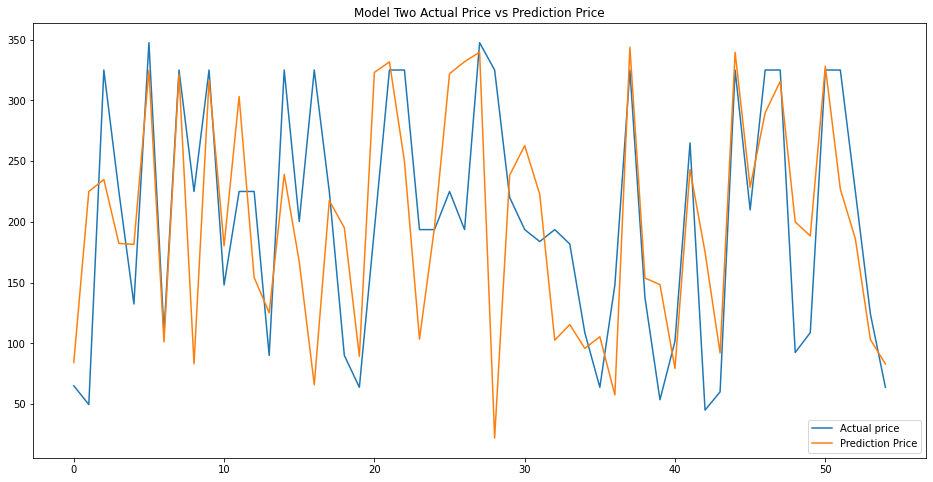

In [34]:
plt.figure(figsize=(16,8))
plt.title('Model Two Actual Price vs Prediction Price')
plt.plot(result['0'])
plt.legend(['Actual price', 'Prediction Price'],loc='lower right')
plt.show()

## Training Results

In [35]:
training_results = model2.evaluate(x_train, y_train, batch_size=256)
print(training_results)
training_predictions = model2.predict(orig_training_x)
print(training_predictions)

4199/4199 [==============================] - 0s 13us/sample - loss: 198.3280 - mae: 2.1199
[198.3280061111759, 2.1198945]
[[225.28635 ]
 [ 43.416912]
 [137.97691 ]
 [265.3997  ]
 [323.24625 ]
 [195.00098 ]
 [ 65.242096]
 [326.30707 ]
 [ 53.71803 ]
 [197.16196 ]
 [182.05885 ]
 [ 65.0519  ]
 [182.22371 ]
 [109.93216 ]
 [221.63158 ]
 [102.573105]
 [ 91.848206]
 [118.4293  ]
 [ 41.76287 ]
 [225.47098 ]
 [324.85645 ]
 [139.565   ]
 [ 91.526245]
 [193.49646 ]
 [324.07065 ]
 [121.16573 ]
 [323.86255 ]
 [118.35657 ]
 [225.96353 ]
 [108.43453 ]
 [345.95044 ]
 [202.86351 ]
 [211.27205 ]
 [194.0325  ]
 [ 60.673576]
 [260.3187  ]
 [101.745514]
 [324.86316 ]
 [ 45.339916]
 [325.34277 ]
 [223.47516 ]
 [230.01479 ]
 [ 91.01728 ]
 [118.906685]
 [225.37973 ]
 [208.62836 ]
 [346.89883 ]
 [ 90.60645 ]
 [247.2522  ]
 [ 91.20081 ]
 [224.48001 ]
 [181.52713 ]
 [224.84601 ]
 [109.891426]
 [ 90.058205]
 [ 78.21311 ]
 [260.66592 ]
 [ 90.499214]
 [247.59175 ]
 [207.34023 ]
 [ 12.377883]
 [ 91.37881 ]
 [225.2186

## Training actual vs training predictions in a dataframe for easy graphing

In [36]:
training_pos_df = pd.DataFrame(orig_training_y)
training_prediction_df = pd.DataFrame(training_predictions) 
training_result = pd.concat([training_pos_df, training_prediction_df], axis=1, join='inner')
training_result

,0,0
0,225.00,225.286346
1,40.59,43.416912
2,137.74,137.976913
3,265.00,265.399689
4,325.00,323.246246
...,...,...
216,193.60,193.228973
217,193.60,191.209137
218,90.00,89.363991
219,46.00,47.373100


## Visualize Actual vs Prediction Training 

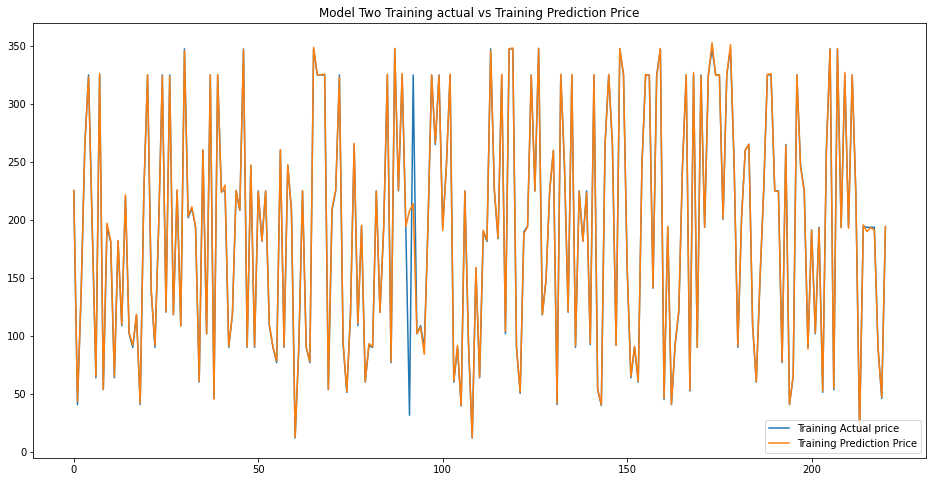

In [37]:
plt.figure(figsize=(16,8))
plt.title('Model Two Training actual vs Training Prediction Price')
plt.plot(training_result['0'])
plt.legend(['Training Actual price', 'Training Prediction Price'],loc='lower right')
plt.show()

## Duplication of data to send in more frames at a time 

In [38]:
x_train = pd.DataFrame(x_train)
x_train1 = x_train.join(x_train, rsuffix='_0')
x_train = x_train1.join(x_train, rsuffix='_1')
orig_training_x = pd.DataFrame(orig_training_x)
orig_training_x1 = orig_training_x.join(orig_training_x, rsuffix='_0')
orig_training_x = orig_training_x.join(orig_training_x1, rsuffix='_1')
orig_training_x = orig_training_x.values
x_train

,0,1,2,3,4,0_0,1_0,2_0,3_0,4_0,0,1,2,3,4
0,0.171168,0.003018,0.146513,0.003018,0.428631,0.171168,0.003018,0.146513,0.003018,0.428631,0.171168,0.003018,0.146513,0.003018,0.428631
1,0.006925,0.022803,0.037817,0.022803,0.904822,0.006925,0.022803,0.037817,0.022803,0.904822,0.006925,0.022803,0.037817,0.022803,0.904822
2,0.061078,0.134845,0.000090,0.134845,0.190566,0.061078,0.134845,0.000090,0.134845,0.190566,0.061078,0.134845,0.000090,0.134845,0.190566
3,0.063635,0.091962,0.000070,0.091962,0.571499,0.063635,0.091962,0.000070,0.091962,0.571499,0.063635,0.091962,0.000070,0.091962,0.571499
4,0.009350,0.063759,0.000050,0.063759,0.857193,0.009350,0.063759,0.000050,0.063759,0.857193,0.009350,0.063759,0.000050,0.063759,0.857193
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4194,0.142171,0.750299,0.000060,0.750299,0.809584,0.142171,0.750299,0.000060,0.750299,0.809584,0.142171,0.750299,0.000060,0.750299,0.809584
4195,0.009085,0.109550,0.000070,0.109550,0.571499,0.009085,0.109550,0.000070,0.109550,0.571499,0.009085,0.109550,0.000070,0.109550,0.571499
4196,0.009535,0.019883,0.028674,0.019883,0.952451,0.009535,0.019883,0.028674,0.019883,0.952451,0.009535,0.019883,0.028674,0.019883,0.952451
4197,0.049143,0.192536,0.228833,0.192536,0.285714,0.049143,0.192536,0.228833,0.192536,0.285714,0.049143,0.192536,0.228833,0.192536,0.285714


In [39]:
y_train = pd.DataFrame(y_train)
training_more_col = pd.concat([x_train, y_train], axis=1, join='inner')

In [40]:
train_data = training_more_col.sample(frac = 1)
train_data

,0,1,2,3,4,0_0,1_0,2_0,3_0,4_0,0,1,2,3,4,0
841,0.023318,0.036583,0.057298,0.036583,0.904852,0.023318,0.036583,0.057298,0.036583,0.904852,0.023318,0.036583,0.057298,0.036583,0.904852,325.60
2637,0.007320,0.009668,0.030571,0.009668,0.809584,0.007320,0.009668,0.030571,0.009668,0.809584,0.007320,0.009668,0.030571,0.009668,0.809584,225.30
755,0.018436,0.061031,0.000000,0.061031,0.904762,0.018436,0.061031,0.000000,0.061031,0.904762,0.018436,0.061031,0.000000,0.061031,0.904762,193.60
469,0.087891,0.551471,0.000100,0.551471,0.714386,0.087891,0.551471,0.000100,0.551471,0.714386,0.087891,0.551471,0.000100,0.551471,0.714386,195.40
2818,0.018526,0.061121,0.000090,0.061121,0.904852,0.018526,0.061121,0.000090,0.061121,0.904852,0.018526,0.061121,0.000090,0.061121,0.904852,194.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2719,0.024950,0.063611,0.000000,0.063611,0.380952,0.024950,0.063611,0.000000,0.063611,0.380952,0.024950,0.063611,0.000000,0.063611,0.380952,53.50
1973,0.011274,0.060006,0.000000,0.060006,0.714286,0.011274,0.060006,0.000000,0.060006,0.714286,0.011274,0.060006,0.000000,0.060006,0.714286,108.73
826,0.002382,0.002622,0.049670,0.002622,0.333423,0.002382,0.002622,0.049670,0.002622,0.333423,0.002382,0.002622,0.049670,0.002622,0.333423,12.40
1641,0.061479,0.025367,0.066000,0.025367,0.619068,0.061479,0.025367,0.066000,0.025367,0.619068,0.061479,0.025367,0.066000,0.025367,0.619068,77.19


In [41]:
#split dataset into x,y training again
train_data = train_data.values
train_data.shape
x_train = train_data[:, 0:15]
y_train = train_data[:, 15:]
print("x training dataset shape: ", x_train.shape)
print("y training dataset shape: ", y_train.shape)

x training dataset shape:  (4199, 15)
y training dataset shape:  (4199, 1)


## model

In [42]:
model3 = tf.keras.models.Sequential()
#layers
model3.add(tf.keras.layers.Dense(1024, activation='relu'))
model3.add(tf.keras.layers.Dense(512, activation='relu'))
model3.add(tf.keras.layers.Dense(256, activation='relu'))
model3.add(tf.keras.layers.Dense(128, activation='relu'))
model3.add(tf.keras.layers.Dense(64, activation='relu'))
model3.add(tf.keras.layers.Dense(36, activation='relu'))
model3.add(tf.keras.layers.Dense(16, activation='relu'))
model3.add(tf.keras.layers.Dense(8, activation='relu'))
model3.add(tf.keras.layers.Dense(4, activation='relu'))
model3.add(tf.keras.layers.Dense(1, ))

## Compile of model

In [43]:
model3.compile(loss='mse',
             optimizer=tf.keras.optimizers.Adam(learning_rate=0.0008),
             metrics=['mae'])

## training of model

In [44]:
model3.fit(
    x=x_train, 
    y=y_train,
    validation_split=0.2,
    batch_size=256, 
    epochs=4000
)

Train on 3359 samples, validate on 840 samples
Epoch 1/4000
3359/3359 [==============================] - 1s 198us/sample - loss: 47437.8742 - mae: 192.7264 - val_loss: 44358.9005 - val_mae: 185.2812
Epoch 2/4000
3359/3359 [==============================] - 0s 43us/sample - loss: 39229.0393 - mae: 170.2064 - val_loss: 16926.9018 - val_mae: 102.6886
Epoch 3/4000
3359/3359 [==============================] - 0s 41us/sample - loss: 13140.7595 - mae: 93.4281 - val_loss: 10779.8582 - val_mae: 86.4369
Epoch 4/4000
3359/3359 [==============================] - 0s 42us/sample - loss: 10270.8574 - mae: 85.1959 - val_loss: 10325.7662 - val_mae: 84.5071
Epoch 5/4000
3359/3359 [==============================] - 0s 45us/sample - loss: 9164.9169 - mae: 81.2588 - val_loss: 9045.5516 - val_mae: 80.7490
Epoch 6/4000
3359/3359 [==============================] - 0s 45us/sample - loss: 8855.4995 - mae: 79.6543 - val_loss: 8904.1382 - val_mae: 79.8303
Epoch 7/4000
3359/3359 [==============================] - 

3359/3359 [==============================] - 0s 45us/sample - loss: 7721.8702 - mae: 74.6516 - val_loss: 7633.8004 - val_mae: 73.8554
Epoch 57/4000
3359/3359 [==============================] - 0s 42us/sample - loss: 7678.6644 - mae: 74.1388 - val_loss: 7969.0272 - val_mae: 75.2012
Epoch 58/4000
3359/3359 [==============================] - 0s 43us/sample - loss: 7643.9914 - mae: 73.9586 - val_loss: 7684.6606 - val_mae: 73.8042
Epoch 59/4000
3359/3359 [==============================] - 0s 43us/sample - loss: 7617.9909 - mae: 73.9800 - val_loss: 7536.8688 - val_mae: 73.0325
Epoch 60/4000
3359/3359 [==============================] - 0s 43us/sample - loss: 7556.3116 - mae: 73.2226 - val_loss: 7481.5774 - val_mae: 72.2845
Epoch 61/4000
3359/3359 [==============================] - 0s 43us/sample - loss: 7550.8714 - mae: 72.8517 - val_loss: 7469.0612 - val_mae: 71.9558
Epoch 62/4000
3359/3359 [==============================] - 0s 45us/sample - loss: 7504.1360 - mae: 72.7238 - val_loss: 7511.39

Epoch 111/4000
3359/3359 [==============================] - 0s 42us/sample - loss: 6080.7842 - mae: 62.2736 - val_loss: 6395.5630 - val_mae: 65.0778
Epoch 112/4000
3359/3359 [==============================] - 0s 42us/sample - loss: 6196.9198 - mae: 62.9700 - val_loss: 6493.2939 - val_mae: 63.4312
Epoch 113/4000
3359/3359 [==============================] - 0s 43us/sample - loss: 6213.9850 - mae: 63.7095 - val_loss: 6061.1425 - val_mae: 61.5802
Epoch 114/4000
3359/3359 [==============================] - 0s 42us/sample - loss: 6249.4503 - mae: 63.0510 - val_loss: 6129.6127 - val_mae: 62.5289
Epoch 115/4000
3359/3359 [==============================] - 0s 43us/sample - loss: 6226.3505 - mae: 62.9324 - val_loss: 6168.7474 - val_mae: 63.2351
Epoch 116/4000
3359/3359 [==============================] - ETA: 0s - loss: 6052.2766 - mae: 62.482 - 0s 45us/sample - loss: 6047.6335 - mae: 62.4622 - val_loss: 6263.4862 - val_mae: 63.3555
Epoch 117/4000
3359/3359 [==============================] - 0s 4

Epoch 166/4000
3359/3359 [==============================] - 0s 42us/sample - loss: 5376.8562 - mae: 56.5765 - val_loss: 6847.9164 - val_mae: 66.9709
Epoch 167/4000
3359/3359 [==============================] - 0s 45us/sample - loss: 5640.5834 - mae: 59.1252 - val_loss: 5617.9258 - val_mae: 58.3895
Epoch 168/4000
3359/3359 [==============================] - 0s 45us/sample - loss: 5384.9479 - mae: 57.0572 - val_loss: 5414.2845 - val_mae: 56.5867
Epoch 169/4000
3359/3359 [==============================] - 0s 43us/sample - loss: 5111.8636 - mae: 54.6295 - val_loss: 5443.0749 - val_mae: 57.8609
Epoch 170/4000
3359/3359 [==============================] - 0s 45us/sample - loss: 5283.8157 - mae: 56.7714 - val_loss: 5725.6927 - val_mae: 57.8144
Epoch 171/4000
3359/3359 [==============================] - 0s 44us/sample - loss: 5194.1843 - mae: 54.9147 - val_loss: 5394.5033 - val_mae: 56.2322
Epoch 172/4000
3359/3359 [==============================] - 0s 43us/sample - loss: 5196.5564 - mae: 55.413

Epoch 221/4000
3359/3359 [==============================] - 0s 43us/sample - loss: 4657.6694 - mae: 51.9924 - val_loss: 4593.3965 - val_mae: 50.7239
Epoch 222/4000
3359/3359 [==============================] - 0s 43us/sample - loss: 4465.6484 - mae: 49.5627 - val_loss: 4365.4611 - val_mae: 48.0190
Epoch 223/4000
3359/3359 [==============================] - 0s 42us/sample - loss: 4418.6150 - mae: 49.2539 - val_loss: 4576.8601 - val_mae: 50.8427
Epoch 224/4000
3359/3359 [==============================] - 0s 44us/sample - loss: 4392.4324 - mae: 48.8734 - val_loss: 4298.3073 - val_mae: 47.2986
Epoch 225/4000
3359/3359 [==============================] - 0s 46us/sample - loss: 4327.5082 - mae: 48.1320 - val_loss: 4310.0098 - val_mae: 47.6367
Epoch 226/4000
3359/3359 [==============================] - 0s 44us/sample - loss: 4389.6508 - mae: 48.8739 - val_loss: 4258.3075 - val_mae: 47.1331
Epoch 227/4000
3359/3359 [==============================] - 0s 43us/sample - loss: 4338.6723 - mae: 48.125

Epoch 276/4000
3359/3359 [==============================] - 0s 44us/sample - loss: 3757.4803 - mae: 43.3614 - val_loss: 3771.4611 - val_mae: 43.6594
Epoch 277/4000
3359/3359 [==============================] - 0s 43us/sample - loss: 3708.7872 - mae: 43.0090 - val_loss: 3993.7627 - val_mae: 45.0712
Epoch 278/4000
3359/3359 [==============================] - 0s 44us/sample - loss: 3890.3356 - mae: 45.4485 - val_loss: 3906.2772 - val_mae: 45.5269
Epoch 279/4000
3359/3359 [==============================] - 0s 43us/sample - loss: 3798.8808 - mae: 44.2978 - val_loss: 4431.2784 - val_mae: 46.2822
Epoch 280/4000
3359/3359 [==============================] - 0s 43us/sample - loss: 3999.1445 - mae: 46.9586 - val_loss: 3911.4225 - val_mae: 44.1373
Epoch 281/4000
3359/3359 [==============================] - 0s 46us/sample - loss: 3732.2905 - mae: 43.1020 - val_loss: 3702.8481 - val_mae: 43.5332
Epoch 282/4000
3359/3359 [==============================] - 0s 45us/sample - loss: 3761.2308 - mae: 44.054

Epoch 331/4000
3359/3359 [==============================] - 0s 43us/sample - loss: 2975.2739 - mae: 37.5963 - val_loss: 2700.4445 - val_mae: 36.1077
Epoch 332/4000
3359/3359 [==============================] - 0s 45us/sample - loss: 2935.5669 - mae: 37.9276 - val_loss: 2907.2532 - val_mae: 37.6166
Epoch 333/4000
3359/3359 [==============================] - 0s 44us/sample - loss: 3306.4914 - mae: 41.5631 - val_loss: 3355.7636 - val_mae: 43.1850
Epoch 334/4000
3359/3359 [==============================] - 0s 42us/sample - loss: 3079.3817 - mae: 38.7267 - val_loss: 3032.1739 - val_mae: 39.1286
Epoch 335/4000
3359/3359 [==============================] - 0s 44us/sample - loss: 3344.7052 - mae: 41.0562 - val_loss: 3159.1906 - val_mae: 41.3606
Epoch 336/4000
3359/3359 [==============================] - 0s 45us/sample - loss: 3766.0337 - mae: 43.8448 - val_loss: 3324.1255 - val_mae: 41.7818
Epoch 337/4000
3359/3359 [==============================] - 0s 44us/sample - loss: 3083.2042 - mae: 39.402

Epoch 386/4000
3359/3359 [==============================] - 0s 44us/sample - loss: 2026.1894 - mae: 29.9844 - val_loss: 1707.2938 - val_mae: 26.4661
Epoch 387/4000
3359/3359 [==============================] - 0s 43us/sample - loss: 1914.6448 - mae: 28.6093 - val_loss: 2319.4053 - val_mae: 31.6654
Epoch 388/4000
3359/3359 [==============================] - 0s 42us/sample - loss: 2135.7245 - mae: 30.4208 - val_loss: 1763.1972 - val_mae: 26.7749
Epoch 389/4000
3359/3359 [==============================] - 0s 42us/sample - loss: 1979.6023 - mae: 28.9068 - val_loss: 2385.7003 - val_mae: 32.0590
Epoch 390/4000
3359/3359 [==============================] - 0s 42us/sample - loss: 2396.1121 - mae: 32.3561 - val_loss: 1737.8362 - val_mae: 27.2195
Epoch 391/4000
3359/3359 [==============================] - 0s 43us/sample - loss: 1892.0858 - mae: 28.1026 - val_loss: 1884.5597 - val_mae: 27.0653
Epoch 392/4000
3359/3359 [==============================] - 0s 43us/sample - loss: 1938.7051 - mae: 28.352

Epoch 441/4000
3359/3359 [==============================] - 0s 45us/sample - loss: 1371.6270 - mae: 23.2766 - val_loss: 1711.6192 - val_mae: 27.5885
Epoch 442/4000
3359/3359 [==============================] - 0s 42us/sample - loss: 1432.0684 - mae: 24.1203 - val_loss: 1226.3444 - val_mae: 21.4876
Epoch 443/4000
3359/3359 [==============================] - 0s 42us/sample - loss: 1342.6618 - mae: 22.6622 - val_loss: 2559.0264 - val_mae: 33.8010
Epoch 444/4000
3359/3359 [==============================] - 0s 43us/sample - loss: 1792.8366 - mae: 27.7540 - val_loss: 1143.8785 - val_mae: 21.5167
Epoch 445/4000
3359/3359 [==============================] - 0s 44us/sample - loss: 1265.0798 - mae: 22.0904 - val_loss: 2013.7827 - val_mae: 28.3568
Epoch 446/4000
3359/3359 [==============================] - 0s 43us/sample - loss: 1579.9282 - mae: 25.5422 - val_loss: 1180.3761 - val_mae: 22.5525
Epoch 447/4000
3359/3359 [==============================] - 0s 44us/sample - loss: 1368.3811 - mae: 23.042

Epoch 496/4000
3359/3359 [==============================] - 0s 42us/sample - loss: 1291.8275 - mae: 22.1360 - val_loss: 741.4033 - val_mae: 15.7663
Epoch 497/4000
3359/3359 [==============================] - 0s 42us/sample - loss: 921.8909 - mae: 17.4953 - val_loss: 726.0316 - val_mae: 15.1233
Epoch 498/4000
3359/3359 [==============================] - 0s 43us/sample - loss: 915.7774 - mae: 17.2658 - val_loss: 697.2340 - val_mae: 14.5836
Epoch 499/4000
3359/3359 [==============================] - 0s 43us/sample - loss: 782.1944 - mae: 15.3167 - val_loss: 688.7916 - val_mae: 13.8933
Epoch 500/4000
3359/3359 [==============================] - 0s 43us/sample - loss: 806.5263 - mae: 15.1944 - val_loss: 846.5420 - val_mae: 17.1879
Epoch 501/4000
3359/3359 [==============================] - 0s 44us/sample - loss: 1020.1222 - mae: 18.4519 - val_loss: 760.6843 - val_mae: 15.3470
Epoch 502/4000
3359/3359 [==============================] - 0s 43us/sample - loss: 791.1196 - mae: 15.2802 - val_los

3359/3359 [==============================] - 0s 43us/sample - loss: 619.6208 - mae: 13.3390 - val_loss: 539.7998 - val_mae: 13.3302
Epoch 552/4000
3359/3359 [==============================] - 0s 43us/sample - loss: 596.9364 - mae: 12.6712 - val_loss: 437.2342 - val_mae: 9.7662
Epoch 553/4000
3359/3359 [==============================] - 0s 43us/sample - loss: 609.8709 - mae: 12.4518 - val_loss: 465.4604 - val_mae: 10.4344
Epoch 554/4000
3359/3359 [==============================] - 0s 43us/sample - loss: 517.4751 - mae: 10.8555 - val_loss: 723.2045 - val_mae: 15.3941
Epoch 555/4000
3359/3359 [==============================] - 0s 45us/sample - loss: 704.2725 - mae: 14.7125 - val_loss: 933.9215 - val_mae: 19.9776
Epoch 556/4000
3359/3359 [==============================] - 0s 44us/sample - loss: 752.3447 - mae: 16.0234 - val_loss: 585.3792 - val_mae: 13.6922
Epoch 557/4000
3359/3359 [==============================] - 0s 42us/sample - loss: 665.4873 - mae: 13.7254 - val_loss: 653.3912 - val_

Epoch 607/4000
3359/3359 [==============================] - 0s 45us/sample - loss: 544.9019 - mae: 12.2913 - val_loss: 974.9611 - val_mae: 20.0815
Epoch 608/4000
3359/3359 [==============================] - 0s 44us/sample - loss: 1068.1777 - mae: 20.7230 - val_loss: 671.6770 - val_mae: 15.1615
Epoch 609/4000
3359/3359 [==============================] - 0s 45us/sample - loss: 581.7294 - mae: 13.6573 - val_loss: 428.4000 - val_mae: 10.8638
Epoch 610/4000
3359/3359 [==============================] - ETA: 0s - loss: 499.0752 - mae: 11.85 - 0s 44us/sample - loss: 501.6750 - mae: 11.9112 - val_loss: 436.7382 - val_mae: 11.4408
Epoch 611/4000
3359/3359 [==============================] - 0s 42us/sample - loss: 488.1765 - mae: 11.1172 - val_loss: 728.9737 - val_mae: 16.9135
Epoch 612/4000
3359/3359 [==============================] - 0s 42us/sample - loss: 626.3117 - mae: 13.3465 - val_loss: 769.9249 - val_mae: 16.7986
Epoch 613/4000
3359/3359 [==============================] - 0s 43us/sample - 

3359/3359 [==============================] - 0s 44us/sample - loss: 460.8593 - mae: 10.9948 - val_loss: 479.1611 - val_mae: 12.2383
Epoch 663/4000
3359/3359 [==============================] - 0s 45us/sample - loss: 442.1703 - mae: 10.9147 - val_loss: 392.3690 - val_mae: 9.3260
Epoch 664/4000
3359/3359 [==============================] - 0s 43us/sample - loss: 570.7534 - mae: 13.1226 - val_loss: 1169.2840 - val_mae: 22.3562
Epoch 665/4000
3359/3359 [==============================] - 0s 42us/sample - loss: 840.3527 - mae: 18.4954 - val_loss: 497.1899 - val_mae: 13.0279
Epoch 666/4000
3359/3359 [==============================] - 0s 42us/sample - loss: 805.0564 - mae: 18.0092 - val_loss: 1074.1383 - val_mae: 23.4352
Epoch 667/4000
3359/3359 [==============================] - 0s 42us/sample - loss: 727.3699 - mae: 17.0612 - val_loss: 913.3594 - val_mae: 19.8521
Epoch 668/4000
3359/3359 [==============================] - 0s 43us/sample - loss: 675.7352 - mae: 16.1872 - val_loss: 442.4413 - va

3359/3359 [==============================] - 0s 45us/sample - loss: 596.5609 - mae: 13.9055 - val_loss: 837.5098 - val_mae: 19.0626
Epoch 719/4000
3359/3359 [==============================] - 0s 42us/sample - loss: 646.2412 - mae: 15.7417 - val_loss: 461.4654 - val_mae: 12.8364
Epoch 720/4000
3359/3359 [==============================] - 0s 42us/sample - loss: 673.2635 - mae: 15.2038 - val_loss: 437.6381 - val_mae: 11.9245
Epoch 721/4000
3359/3359 [==============================] - 0s 43us/sample - loss: 458.1598 - mae: 11.5318 - val_loss: 362.9616 - val_mae: 10.3227
Epoch 722/4000
3359/3359 [==============================] - ETA: 0s - loss: 443.5170 - mae: 11.26 - 0s 44us/sample - loss: 446.7918 - mae: 11.2812 - val_loss: 404.0713 - val_mae: 11.5014
Epoch 723/4000
3359/3359 [==============================] - 0s 44us/sample - loss: 523.7309 - mae: 13.0379 - val_loss: 415.5061 - val_mae: 11.8517
Epoch 724/4000
3359/3359 [==============================] - 0s 44us/sample - loss: 404.0410 -

Epoch 774/4000
3359/3359 [==============================] - 0s 43us/sample - loss: 404.1855 - mae: 11.1496 - val_loss: 378.1188 - val_mae: 10.1521
Epoch 775/4000
3359/3359 [==============================] - 0s 45us/sample - loss: 389.1690 - mae: 10.5286 - val_loss: 308.1157 - val_mae: 9.0356
Epoch 776/4000
3359/3359 [==============================] - 0s 43us/sample - loss: 392.7777 - mae: 10.3437 - val_loss: 257.0381 - val_mae: 6.9422
Epoch 777/4000
3359/3359 [==============================] - 0s 43us/sample - loss: 291.3297 - mae: 7.6153 - val_loss: 234.9581 - val_mae: 6.4082
Epoch 778/4000
3359/3359 [==============================] - 0s 48us/sample - loss: 326.7269 - mae: 8.1315 - val_loss: 324.3649 - val_mae: 9.3536
Epoch 779/4000
3359/3359 [==============================] - 0s 45us/sample - loss: 400.8255 - mae: 10.7752 - val_loss: 333.2347 - val_mae: 10.1088
Epoch 780/4000
3359/3359 [==============================] - 0s 43us/sample - loss: 391.2605 - mae: 10.1055 - val_loss: 380.3

3359/3359 [==============================] - 0s 43us/sample - loss: 338.4675 - mae: 8.6489 - val_loss: 255.6122 - val_mae: 7.4118
Epoch 831/4000
3359/3359 [==============================] - 0s 44us/sample - loss: 296.3185 - mae: 8.7504 - val_loss: 280.2918 - val_mae: 7.7957
Epoch 832/4000
3359/3359 [==============================] - 0s 45us/sample - loss: 279.7409 - mae: 7.6998 - val_loss: 269.6405 - val_mae: 6.8661
Epoch 833/4000
3359/3359 [==============================] - 0s 43us/sample - loss: 307.7543 - mae: 7.5424 - val_loss: 287.4565 - val_mae: 8.4072
Epoch 834/4000
3359/3359 [==============================] - 0s 42us/sample - loss: 267.1193 - mae: 7.4382 - val_loss: 216.0076 - val_mae: 5.1999
Epoch 835/4000
3359/3359 [==============================] - 0s 43us/sample - loss: 242.1773 - mae: 6.0470 - val_loss: 209.2192 - val_mae: 5.1648
Epoch 836/4000
3359/3359 [==============================] - 0s 43us/sample - loss: 268.6051 - mae: 6.4785 - val_loss: 417.3812 - val_mae: 11.0503

3359/3359 [==============================] - 0s 45us/sample - loss: 280.8808 - mae: 7.5961 - val_loss: 375.5781 - val_mae: 9.5265
Epoch 887/4000
3359/3359 [==============================] - 0s 44us/sample - loss: 372.1312 - mae: 9.8848 - val_loss: 428.4780 - val_mae: 12.8980
Epoch 888/4000
3359/3359 [==============================] - 0s 42us/sample - loss: 294.8268 - mae: 8.2779 - val_loss: 216.4136 - val_mae: 5.9350
Epoch 889/4000
3359/3359 [==============================] - 0s 42us/sample - loss: 240.4319 - mae: 6.2743 - val_loss: 218.7917 - val_mae: 6.5449
Epoch 890/4000
3359/3359 [==============================] - 0s 43us/sample - loss: 262.3678 - mae: 6.6174 - val_loss: 339.4613 - val_mae: 9.1536
Epoch 891/4000
3359/3359 [==============================] - 0s 43us/sample - loss: 284.7242 - mae: 7.5981 - val_loss: 229.0233 - val_mae: 6.5923
Epoch 892/4000
3359/3359 [==============================] - 0s 44us/sample - loss: 274.9027 - mae: 6.8314 - val_loss: 236.1481 - val_mae: 7.1511

3359/3359 [==============================] - 0s 43us/sample - loss: 223.9784 - mae: 5.7712 - val_loss: 207.8039 - val_mae: 5.1310
Epoch 943/4000
3359/3359 [==============================] - 0s 44us/sample - loss: 228.2396 - mae: 5.4852 - val_loss: 222.5704 - val_mae: 6.1077
Epoch 944/4000
3359/3359 [==============================] - 0s 45us/sample - loss: 296.7674 - mae: 6.8797 - val_loss: 278.9382 - val_mae: 8.2334
Epoch 945/4000
3359/3359 [==============================] - 0s 43us/sample - loss: 299.3017 - mae: 7.9520 - val_loss: 286.4127 - val_mae: 7.8715
Epoch 946/4000
3359/3359 [==============================] - 0s 43us/sample - loss: 298.1966 - mae: 8.3261 - val_loss: 264.0903 - val_mae: 8.0237
Epoch 947/4000
3359/3359 [==============================] - 0s 45us/sample - loss: 260.8372 - mae: 7.6205 - val_loss: 340.9679 - val_mae: 9.0370
Epoch 948/4000
3359/3359 [==============================] - 0s 43us/sample - loss: 284.7434 - mae: 6.8751 - val_loss: 277.5621 - val_mae: 9.2402


3359/3359 [==============================] - 0s 43us/sample - loss: 304.2919 - mae: 8.0653 - val_loss: 218.7884 - val_mae: 6.6899
Epoch 999/4000
3359/3359 [==============================] - 0s 43us/sample - loss: 264.5113 - mae: 7.2155 - val_loss: 300.4926 - val_mae: 9.0375
Epoch 1000/4000
3359/3359 [==============================] - 0s 43us/sample - loss: 290.1047 - mae: 8.1057 - val_loss: 397.0556 - val_mae: 11.6437
Epoch 1001/4000
3359/3359 [==============================] - 0s 45us/sample - loss: 280.9905 - mae: 8.0526 - val_loss: 224.7848 - val_mae: 5.9969
Epoch 1002/4000
3359/3359 [==============================] - 0s 44us/sample - loss: 278.8270 - mae: 7.4989 - val_loss: 237.7934 - val_mae: 7.3387
Epoch 1003/4000
3359/3359 [==============================] - 0s 42us/sample - loss: 275.6288 - mae: 7.7295 - val_loss: 273.2691 - val_mae: 8.4868
Epoch 1004/4000
3359/3359 [==============================] - 0s 42us/sample - loss: 252.5193 - mae: 7.1060 - val_loss: 192.3989 - val_mae: 5

3359/3359 [==============================] - 0s 44us/sample - loss: 221.1786 - mae: 5.7345 - val_loss: 203.8921 - val_mae: 5.1822
Epoch 1054/4000
3359/3359 [==============================] - 0s 42us/sample - loss: 217.2355 - mae: 5.4958 - val_loss: 288.7567 - val_mae: 6.4396
Epoch 1055/4000
3359/3359 [==============================] - 0s 44us/sample - loss: 287.3761 - mae: 6.6808 - val_loss: 342.9892 - val_mae: 10.2457
Epoch 1056/4000
3359/3359 [==============================] - 0s 44us/sample - loss: 322.0618 - mae: 9.1367 - val_loss: 218.6800 - val_mae: 6.8666
Epoch 1057/4000
3359/3359 [==============================] - 0s 42us/sample - loss: 292.2034 - mae: 8.1716 - val_loss: 219.1050 - val_mae: 6.6251
Epoch 1058/4000
3359/3359 [==============================] - 0s 42us/sample - loss: 250.9314 - mae: 6.8377 - val_loss: 250.7150 - val_mae: 7.4153
Epoch 1059/4000
3359/3359 [==============================] - 0s 43us/sample - loss: 231.3873 - mae: 6.0077 - val_loss: 278.2141 - val_mae: 

3359/3359 [==============================] - ETA: 0s - loss: 191.5842 - mae: 4.141 - 0s 47us/sample - loss: 196.6026 - mae: 4.2192 - val_loss: 215.5355 - val_mae: 5.6412
Epoch 1110/4000
3359/3359 [==============================] - 0s 44us/sample - loss: 236.9826 - mae: 6.0984 - val_loss: 243.2001 - val_mae: 7.3888
Epoch 1111/4000
3359/3359 [==============================] - 0s 42us/sample - loss: 331.7195 - mae: 8.2185 - val_loss: 327.6489 - val_mae: 10.0803
Epoch 1112/4000
3359/3359 [==============================] - 0s 43us/sample - loss: 285.3708 - mae: 8.2457 - val_loss: 304.9195 - val_mae: 9.3920
Epoch 1113/4000
3359/3359 [==============================] - 0s 45us/sample - loss: 267.8829 - mae: 7.4377 - val_loss: 300.3194 - val_mae: 8.5362
Epoch 1114/4000
3359/3359 [==============================] - 0s 43us/sample - loss: 333.6029 - mae: 8.8722 - val_loss: 355.3361 - val_mae: 11.4696
Epoch 1115/4000
3359/3359 [==============================] - 0s 44us/sample - loss: 295.7053 - mae

Epoch 1165/4000
3359/3359 [==============================] - 0s 42us/sample - loss: 278.0175 - mae: 7.8413 - val_loss: 214.2397 - val_mae: 6.5117
Epoch 1166/4000
3359/3359 [==============================] - 0s 42us/sample - loss: 227.6515 - mae: 5.7385 - val_loss: 478.0517 - val_mae: 12.6681
Epoch 1167/4000
3359/3359 [==============================] - 0s 43us/sample - loss: 311.4917 - mae: 8.8303 - val_loss: 236.8564 - val_mae: 6.9928
Epoch 1168/4000
3359/3359 [==============================] - 0s 43us/sample - loss: 254.0675 - mae: 7.0825 - val_loss: 230.1378 - val_mae: 6.8719
Epoch 1169/4000
3359/3359 [==============================] - 0s 43us/sample - loss: 316.0213 - mae: 8.0022 - val_loss: 265.5046 - val_mae: 7.8930
Epoch 1170/4000
3359/3359 [==============================] - 0s 48us/sample - loss: 284.4869 - mae: 7.6773 - val_loss: 232.7679 - val_mae: 7.2621
Epoch 1171/4000
3359/3359 [==============================] - 0s 45us/sample - loss: 231.9017 - mae: 6.2766 - val_loss: 195.

3359/3359 [==============================] - 0s 43us/sample - loss: 547.5932 - mae: 12.3916 - val_loss: 328.7003 - val_mae: 9.0044
Epoch 1222/4000
3359/3359 [==============================] - 0s 44us/sample - loss: 313.5919 - mae: 8.5880 - val_loss: 274.5604 - val_mae: 7.7046
Epoch 1223/4000
3359/3359 [==============================] - 0s 43us/sample - loss: 267.6835 - mae: 7.2480 - val_loss: 214.1085 - val_mae: 6.0496
Epoch 1224/4000
3359/3359 [==============================] - 0s 45us/sample - loss: 232.6010 - mae: 6.3966 - val_loss: 186.8372 - val_mae: 4.7893
Epoch 1225/4000
3359/3359 [==============================] - 0s 44us/sample - loss: 246.3327 - mae: 6.3167 - val_loss: 262.1035 - val_mae: 8.0706
Epoch 1226/4000
3359/3359 [==============================] - 0s 42us/sample - loss: 298.1765 - mae: 7.7082 - val_loss: 281.9082 - val_mae: 8.0951
Epoch 1227/4000
3359/3359 [==============================] - 0s 42us/sample - loss: 416.5878 - mae: 10.0401 - val_loss: 340.6606 - val_mae:

3359/3359 [==============================] - 0s 43us/sample - loss: 497.9985 - mae: 11.2803 - val_loss: 472.6701 - val_mae: 11.7454
Epoch 1278/4000
3359/3359 [==============================] - ETA: 0s - loss: 418.9736 - mae: 10.92 - 0s 45us/sample - loss: 415.4601 - mae: 10.8648 - val_loss: 298.8616 - val_mae: 9.0149
Epoch 1279/4000
3359/3359 [==============================] - 0s 45us/sample - loss: 309.9397 - mae: 8.3344 - val_loss: 427.7555 - val_mae: 12.6193
Epoch 1280/4000
3359/3359 [==============================] - 0s 43us/sample - loss: 370.0088 - mae: 9.5740 - val_loss: 238.3827 - val_mae: 7.0633
Epoch 1281/4000
3359/3359 [==============================] - 0s 44us/sample - loss: 253.6542 - mae: 6.5554 - val_loss: 198.4233 - val_mae: 5.3723
Epoch 1282/4000
3359/3359 [==============================] - 0s 45us/sample - loss: 219.5210 - mae: 5.4802 - val_loss: 183.3823 - val_mae: 4.1931
Epoch 1283/4000
3359/3359 [==============================] - 0s 45us/sample - loss: 202.4753 - m

Epoch 1333/4000
3359/3359 [==============================] - 0s 45us/sample - loss: 221.6895 - mae: 4.5345 - val_loss: 221.4473 - val_mae: 5.6729
Epoch 1334/4000
3359/3359 [==============================] - 0s 42us/sample - loss: 241.1283 - mae: 5.7447 - val_loss: 207.5470 - val_mae: 4.4005
Epoch 1335/4000
3359/3359 [==============================] - 0s 42us/sample - loss: 219.1167 - mae: 4.5732 - val_loss: 195.4995 - val_mae: 4.0226
Epoch 1336/4000
3359/3359 [==============================] - 0s 42us/sample - loss: 205.4139 - mae: 3.5433 - val_loss: 174.7288 - val_mae: 3.1783
Epoch 1337/4000
3359/3359 [==============================] - 0s 43us/sample - loss: 207.9150 - mae: 4.0149 - val_loss: 198.5166 - val_mae: 4.9974
Epoch 1338/4000
3359/3359 [==============================] - 0s 43us/sample - loss: 316.0292 - mae: 7.5637 - val_loss: 270.0731 - val_mae: 8.2668
Epoch 1339/4000
3359/3359 [==============================] - 0s 45us/sample - loss: 242.1568 - mae: 6.2324 - val_loss: 191.3

3359/3359 [==============================] - 0s 43us/sample - loss: 186.6542 - mae: 3.6404 - val_loss: 159.2774 - val_mae: 3.8292
Epoch 1390/4000
3359/3359 [==============================] - 0s 42us/sample - loss: 193.2774 - mae: 4.0604 - val_loss: 206.4968 - val_mae: 4.4646
Epoch 1391/4000
3359/3359 [==============================] - 0s 44us/sample - loss: 187.9008 - mae: 4.2436 - val_loss: 154.5138 - val_mae: 3.4243
Epoch 1392/4000
3359/3359 [==============================] - 0s 44us/sample - loss: 207.1844 - mae: 4.4830 - val_loss: 231.1054 - val_mae: 6.6860
Epoch 1393/4000
3359/3359 [==============================] - 0s 45us/sample - loss: 235.3060 - mae: 6.1063 - val_loss: 214.4539 - val_mae: 6.2152
Epoch 1394/4000
3359/3359 [==============================] - 0s 44us/sample - loss: 230.8000 - mae: 5.7867 - val_loss: 352.0764 - val_mae: 9.0446
Epoch 1395/4000
3359/3359 [==============================] - 0s 43us/sample - loss: 442.0849 - mae: 10.4174 - val_loss: 315.2170 - val_mae: 

3359/3359 [==============================] - 0s 43us/sample - loss: 410.8539 - mae: 11.0332 - val_loss: 344.2024 - val_mae: 10.6914
Epoch 1446/4000
3359/3359 [==============================] - 0s 43us/sample - loss: 312.7405 - mae: 9.5613 - val_loss: 313.4826 - val_mae: 9.1517
Epoch 1447/4000
3359/3359 [==============================] - 0s 45us/sample - loss: 253.2934 - mae: 7.6635 - val_loss: 209.0616 - val_mae: 6.6796
Epoch 1448/4000
3359/3359 [==============================] - 0s 44us/sample - loss: 232.0364 - mae: 6.4671 - val_loss: 334.9923 - val_mae: 10.2366
Epoch 1449/4000
3359/3359 [==============================] - 0s 43us/sample - loss: 312.4452 - mae: 8.9499 - val_loss: 317.6425 - val_mae: 8.3970
Epoch 1450/4000
3359/3359 [==============================] - 0s 43us/sample - loss: 320.4602 - mae: 8.4773 - val_loss: 229.1652 - val_mae: 6.7440
Epoch 1451/4000
3359/3359 [==============================] - 0s 45us/sample - loss: 285.9656 - mae: 7.7687 - val_loss: 229.0459 - val_mae

3359/3359 [==============================] - 0s 45us/sample - loss: 181.1042 - mae: 3.0329 - val_loss: 182.2556 - val_mae: 5.0253
Epoch 1502/4000
3359/3359 [==============================] - 0s 44us/sample - loss: 246.9980 - mae: 5.7102 - val_loss: 197.5543 - val_mae: 5.8654
Epoch 1503/4000
3359/3359 [==============================] - 0s 43us/sample - loss: 211.4284 - mae: 5.4445 - val_loss: 184.2003 - val_mae: 5.1710
Epoch 1504/4000
3359/3359 [==============================] - 0s 42us/sample - loss: 250.4490 - mae: 5.5949 - val_loss: 197.4612 - val_mae: 5.6651
Epoch 1505/4000
3359/3359 [==============================] - 0s 42us/sample - loss: 235.9213 - mae: 5.8724 - val_loss: 189.0176 - val_mae: 5.1784
Epoch 1506/4000
3359/3359 [==============================] - 0s 42us/sample - loss: 215.3442 - mae: 5.5128 - val_loss: 209.4486 - val_mae: 6.0147
Epoch 1507/4000
3359/3359 [==============================] - 0s 44us/sample - loss: 232.5402 - mae: 5.8214 - val_loss: 203.5817 - val_mae: 5

3359/3359 [==============================] - 0s 42us/sample - loss: 217.0687 - mae: 5.5461 - val_loss: 169.7766 - val_mae: 4.0829
Epoch 1558/4000
3359/3359 [==============================] - 0s 42us/sample - loss: 212.6009 - mae: 5.0055 - val_loss: 182.8418 - val_mae: 5.6069
Epoch 1559/4000
3359/3359 [==============================] - 0s 42us/sample - loss: 242.6163 - mae: 6.3951 - val_loss: 182.9367 - val_mae: 5.7331
Epoch 1560/4000
3359/3359 [==============================] - 0s 43us/sample - loss: 263.6644 - mae: 6.0270 - val_loss: 194.8663 - val_mae: 5.8971
Epoch 1561/4000
3359/3359 [==============================] - 0s 42us/sample - loss: 212.9328 - mae: 5.3167 - val_loss: 170.8590 - val_mae: 4.8054
Epoch 1562/4000
3359/3359 [==============================] - 0s 45us/sample - loss: 194.3109 - mae: 4.5863 - val_loss: 163.8499 - val_mae: 3.9907
Epoch 1563/4000
3359/3359 [==============================] - 0s 44us/sample - loss: 176.4284 - mae: 3.9516 - val_loss: 149.6287 - val_mae: 3

3359/3359 [==============================] - 0s 42us/sample - loss: 224.8805 - mae: 4.8245 - val_loss: 227.8135 - val_mae: 4.7404
Epoch 1614/4000
3359/3359 [==============================] - 0s 45us/sample - loss: 229.3287 - mae: 5.5089 - val_loss: 183.0208 - val_mae: 4.9410
Epoch 1615/4000
3359/3359 [==============================] - 0s 44us/sample - loss: 194.5542 - mae: 4.6852 - val_loss: 160.2280 - val_mae: 3.6107
Epoch 1616/4000
3359/3359 [==============================] - 0s 46us/sample - loss: 207.7111 - mae: 4.5936 - val_loss: 271.6619 - val_mae: 7.4284
Epoch 1617/4000
3359/3359 [==============================] - 0s 43us/sample - loss: 280.9312 - mae: 6.4487 - val_loss: 275.2029 - val_mae: 6.9659
Epoch 1618/4000
3359/3359 [==============================] - 0s 42us/sample - loss: 227.2630 - mae: 6.2329 - val_loss: 195.8990 - val_mae: 5.7549
Epoch 1619/4000
3359/3359 [==============================] - 0s 43us/sample - loss: 259.8606 - mae: 6.2672 - val_loss: 264.4431 - val_mae: 7

3359/3359 [==============================] - 0s 44us/sample - loss: 217.1038 - mae: 5.1912 - val_loss: 210.4310 - val_mae: 4.6626
Epoch 1670/4000
3359/3359 [==============================] - 0s 45us/sample - loss: 210.2575 - mae: 5.1670 - val_loss: 237.3098 - val_mae: 6.9627
Epoch 1671/4000
3359/3359 [==============================] - 0s 45us/sample - loss: 205.2964 - mae: 5.2411 - val_loss: 174.2934 - val_mae: 4.4981
Epoch 1672/4000
3359/3359 [==============================] - 0s 42us/sample - loss: 196.3810 - mae: 4.5343 - val_loss: 162.7200 - val_mae: 3.9156
Epoch 1673/4000
3359/3359 [==============================] - 0s 43us/sample - loss: 225.3035 - mae: 5.0736 - val_loss: 204.5945 - val_mae: 5.7959
Epoch 1674/4000
3359/3359 [==============================] - 0s 43us/sample - loss: 296.4241 - mae: 7.1488 - val_loss: 257.6985 - val_mae: 7.1593
Epoch 1675/4000
3359/3359 [==============================] - 0s 44us/sample - loss: 278.6916 - mae: 7.2634 - val_loss: 210.9128 - val_mae: 5

3359/3359 [==============================] - 0s 44us/sample - loss: 203.0527 - mae: 3.8580 - val_loss: 176.9025 - val_mae: 3.8972
Epoch 1726/4000
3359/3359 [==============================] - 0s 42us/sample - loss: 215.4390 - mae: 4.6635 - val_loss: 219.1682 - val_mae: 5.4747
Epoch 1727/4000
3359/3359 [==============================] - 0s 43us/sample - loss: 234.2864 - mae: 5.2260 - val_loss: 196.1683 - val_mae: 5.1843
Epoch 1728/4000
3359/3359 [==============================] - 0s 43us/sample - loss: 202.3531 - mae: 4.3656 - val_loss: 246.3976 - val_mae: 6.9081
Epoch 1729/4000
3359/3359 [==============================] - 0s 43us/sample - loss: 235.5896 - mae: 5.9325 - val_loss: 232.6463 - val_mae: 7.0322
Epoch 1730/4000
3359/3359 [==============================] - 0s 43us/sample - loss: 250.4092 - mae: 6.5966 - val_loss: 207.4181 - val_mae: 5.5349
Epoch 1731/4000
3359/3359 [==============================] - 0s 45us/sample - loss: 206.0184 - mae: 4.4164 - val_loss: 187.6230 - val_mae: 4

3359/3359 [==============================] - 0s 42us/sample - loss: 240.2931 - mae: 5.6638 - val_loss: 227.1376 - val_mae: 6.3858
Epoch 1782/4000
3359/3359 [==============================] - 0s 42us/sample - loss: 238.8689 - mae: 5.9425 - val_loss: 215.4100 - val_mae: 5.9756
Epoch 1783/4000
3359/3359 [==============================] - 0s 42us/sample - loss: 247.3646 - mae: 6.2574 - val_loss: 192.3173 - val_mae: 5.2458
Epoch 1784/4000
3359/3359 [==============================] - 0s 42us/sample - loss: 210.5035 - mae: 5.0892 - val_loss: 175.3882 - val_mae: 4.2082
Epoch 1785/4000
3359/3359 [==============================] - 0s 45us/sample - loss: 189.8924 - mae: 3.8045 - val_loss: 186.4308 - val_mae: 5.3104
Epoch 1786/4000
3359/3359 [==============================] - 0s 45us/sample - loss: 225.5081 - mae: 5.1644 - val_loss: 168.1705 - val_mae: 3.9207
Epoch 1787/4000
3359/3359 [==============================] - 0s 42us/sample - loss: 190.4095 - mae: 3.7456 - val_loss: 169.9447 - val_mae: 3

3359/3359 [==============================] - 0s 43us/sample - loss: 178.2406 - mae: 3.3283 - val_loss: 166.8753 - val_mae: 3.6135
Epoch 1838/4000
3359/3359 [==============================] - 0s 43us/sample - loss: 187.3865 - mae: 3.8633 - val_loss: 159.9386 - val_mae: 3.9548
Epoch 1839/4000
3359/3359 [==============================] - 0s 44us/sample - loss: 187.7799 - mae: 4.4262 - val_loss: 199.6047 - val_mae: 6.6464
Epoch 1840/4000
3359/3359 [==============================] - 0s 45us/sample - loss: 225.2034 - mae: 5.2306 - val_loss: 182.6770 - val_mae: 4.1244
Epoch 1841/4000
3359/3359 [==============================] - 0s 42us/sample - loss: 222.5398 - mae: 4.8591 - val_loss: 246.2102 - val_mae: 8.2363
Epoch 1842/4000
3359/3359 [==============================] - 0s 43us/sample - loss: 258.4237 - mae: 6.7536 - val_loss: 192.6828 - val_mae: 4.7532
Epoch 1843/4000
3359/3359 [==============================] - 0s 42us/sample - loss: 209.4883 - mae: 4.8924 - val_loss: 230.3820 - val_mae: 5

3359/3359 [==============================] - 0s 44us/sample - loss: 284.2789 - mae: 7.2222 - val_loss: 256.1054 - val_mae: 8.2575
Epoch 1894/4000
3359/3359 [==============================] - 0s 44us/sample - loss: 224.3064 - mae: 6.5236 - val_loss: 173.4946 - val_mae: 5.1393
Epoch 1895/4000
3359/3359 [==============================] - 0s 44us/sample - loss: 189.6758 - mae: 4.5881 - val_loss: 168.8391 - val_mae: 3.8459
Epoch 1896/4000
3359/3359 [==============================] - 0s 43us/sample - loss: 189.3051 - mae: 4.1263 - val_loss: 193.7349 - val_mae: 3.9112
Epoch 1897/4000
3359/3359 [==============================] - 0s 42us/sample - loss: 223.1623 - mae: 4.9103 - val_loss: 240.9986 - val_mae: 6.6093
Epoch 1898/4000
3359/3359 [==============================] - 0s 42us/sample - loss: 273.1516 - mae: 6.9694 - val_loss: 220.0067 - val_mae: 6.7632
Epoch 1899/4000
3359/3359 [==============================] - 0s 43us/sample - loss: 217.1471 - mae: 5.7122 - val_loss: 267.9748 - val_mae: 5

3359/3359 [==============================] - 0s 43us/sample - loss: 322.6236 - mae: 9.0537 - val_loss: 506.4997 - val_mae: 14.2905
Epoch 1950/4000
3359/3359 [==============================] - 0s 42us/sample - loss: 366.6650 - mae: 10.6632 - val_loss: 335.2600 - val_mae: 9.4186
Epoch 1951/4000
3359/3359 [==============================] - 0s 42us/sample - loss: 273.6188 - mae: 7.9841 - val_loss: 208.2406 - val_mae: 6.7488
Epoch 1952/4000
3359/3359 [==============================] - 0s 43us/sample - loss: 236.5323 - mae: 6.2367 - val_loss: 198.3688 - val_mae: 5.3852
Epoch 1953/4000
3359/3359 [==============================] - 0s 43us/sample - loss: 191.5870 - mae: 4.6859 - val_loss: 156.7910 - val_mae: 3.5657
Epoch 1954/4000
3359/3359 [==============================] - 0s 45us/sample - loss: 179.8170 - mae: 3.7549 - val_loss: 180.9076 - val_mae: 3.7614
Epoch 1955/4000
3359/3359 [==============================] - 0s 44us/sample - loss: 225.4955 - mae: 4.9535 - val_loss: 170.5883 - val_mae:

3359/3359 [==============================] - 0s 42us/sample - loss: 237.0183 - mae: 5.6564 - val_loss: 246.6994 - val_mae: 6.8412
Epoch 2006/4000
3359/3359 [==============================] - 0s 42us/sample - loss: 291.1682 - mae: 6.9705 - val_loss: 189.8604 - val_mae: 4.6337
Epoch 2007/4000
3359/3359 [==============================] - 0s 43us/sample - loss: 228.3018 - mae: 5.3686 - val_loss: 188.9917 - val_mae: 4.4147
Epoch 2008/4000
3359/3359 [==============================] - 0s 44us/sample - loss: 228.8554 - mae: 5.3021 - val_loss: 188.9757 - val_mae: 4.4297
Epoch 2009/4000
3359/3359 [==============================] - 0s 45us/sample - loss: 206.8656 - mae: 3.9282 - val_loss: 177.2467 - val_mae: 3.4247
Epoch 2010/4000
3359/3359 [==============================] - 0s 43us/sample - loss: 192.8303 - mae: 3.2155 - val_loss: 202.9228 - val_mae: 5.7978
Epoch 2011/4000
3359/3359 [==============================] - 0s 42us/sample - loss: 240.6468 - mae: 5.9689 - val_loss: 166.2578 - val_mae: 3

3359/3359 [==============================] - 0s 43us/sample - loss: 194.3590 - mae: 3.6380 - val_loss: 180.1601 - val_mae: 4.4819
Epoch 2062/4000
3359/3359 [==============================] - 0s 45us/sample - loss: 201.8077 - mae: 4.6652 - val_loss: 158.4128 - val_mae: 3.1571
Epoch 2063/4000
3359/3359 [==============================] - 0s 47us/sample - loss: 187.2846 - mae: 3.6933 - val_loss: 159.2294 - val_mae: 3.1435
Epoch 2064/4000
3359/3359 [==============================] - 0s 43us/sample - loss: 213.6606 - mae: 4.6366 - val_loss: 161.7725 - val_mae: 3.1372
Epoch 2065/4000
3359/3359 [==============================] - 0s 42us/sample - loss: 197.9039 - mae: 3.9426 - val_loss: 169.0038 - val_mae: 3.6454
Epoch 2066/4000
3359/3359 [==============================] - 0s 42us/sample - loss: 202.7526 - mae: 4.0980 - val_loss: 162.3481 - val_mae: 3.1207
Epoch 2067/4000
3359/3359 [==============================] - 0s 42us/sample - loss: 193.5565 - mae: 4.1360 - val_loss: 160.8339 - val_mae: 3

3359/3359 [==============================] - 0s 45us/sample - loss: 161.5713 - mae: 3.1843 - val_loss: 144.3288 - val_mae: 3.5656
Epoch 2118/4000
3359/3359 [==============================] - 0s 44us/sample - loss: 158.4964 - mae: 2.8375 - val_loss: 183.3631 - val_mae: 5.5701
Epoch 2119/4000
3359/3359 [==============================] - 0s 42us/sample - loss: 193.7786 - mae: 4.8688 - val_loss: 144.3774 - val_mae: 3.5583
Epoch 2120/4000
3359/3359 [==============================] - 0s 43us/sample - loss: 153.0335 - mae: 3.5041 - val_loss: 175.2092 - val_mae: 3.1041
Epoch 2121/4000
3359/3359 [==============================] - 0s 42us/sample - loss: 183.8217 - mae: 3.6686 - val_loss: 170.3192 - val_mae: 4.3844
Epoch 2122/4000
3359/3359 [==============================] - 0s 42us/sample - loss: 165.8972 - mae: 4.3568 - val_loss: 222.2642 - val_mae: 3.7437
Epoch 2123/4000
3359/3359 [==============================] - 0s 44us/sample - loss: 191.8957 - mae: 4.5174 - val_loss: 181.6070 - val_mae: 5

Epoch 2173/4000
3359/3359 [==============================] - 0s 47us/sample - loss: 646.9434 - mae: 13.1867 - val_loss: 759.8764 - val_mae: 15.8969
Epoch 2174/4000
3359/3359 [==============================] - 0s 43us/sample - loss: 668.6232 - mae: 14.0163 - val_loss: 783.7443 - val_mae: 18.3395
Epoch 2175/4000
3359/3359 [==============================] - 0s 43us/sample - loss: 877.5842 - mae: 17.7127 - val_loss: 500.8863 - val_mae: 14.1386
Epoch 2176/4000
3359/3359 [==============================] - 0s 43us/sample - loss: 482.9978 - mae: 13.0783 - val_loss: 460.8878 - val_mae: 11.8771
Epoch 2177/4000
3359/3359 [==============================] - 0s 44us/sample - loss: 400.5576 - mae: 10.2292 - val_loss: 468.5518 - val_mae: 11.3784
Epoch 2178/4000
3359/3359 [==============================] - 0s 45us/sample - loss: 598.1152 - mae: 12.4119 - val_loss: 304.8066 - val_mae: 8.6165
Epoch 2179/4000
3359/3359 [==============================] - 0s 43us/sample - loss: 313.7376 - mae: 8.6432 - val_

3359/3359 [==============================] - 0s 45us/sample - loss: 196.3461 - mae: 4.1060 - val_loss: 157.8892 - val_mae: 3.8041
Epoch 2230/4000
3359/3359 [==============================] - 0s 42us/sample - loss: 185.7884 - mae: 3.6690 - val_loss: 166.5427 - val_mae: 4.5289
Epoch 2231/4000
3359/3359 [==============================] - 0s 43us/sample - loss: 230.8719 - mae: 6.1218 - val_loss: 227.3074 - val_mae: 6.1671
Epoch 2232/4000
3359/3359 [==============================] - 0s 45us/sample - loss: 207.9442 - mae: 5.2617 - val_loss: 200.2460 - val_mae: 4.3027
Epoch 2233/4000
3359/3359 [==============================] - 0s 43us/sample - loss: 248.7111 - mae: 5.8183 - val_loss: 192.9220 - val_mae: 4.4537
Epoch 2234/4000
3359/3359 [==============================] - 0s 42us/sample - loss: 184.0536 - mae: 4.0249 - val_loss: 157.4026 - val_mae: 3.2801
Epoch 2235/4000
3359/3359 [==============================] - 0s 42us/sample - loss: 176.1937 - mae: 3.5931 - val_loss: 171.9652 - val_mae: 3

Epoch 2285/4000
3359/3359 [==============================] - 0s 42us/sample - loss: 225.1170 - mae: 5.4261 - val_loss: 176.5241 - val_mae: 4.5495
Epoch 2286/4000
3359/3359 [==============================] - 0s 45us/sample - loss: 197.3320 - mae: 4.3344 - val_loss: 164.3879 - val_mae: 4.8598
Epoch 2287/4000
3359/3359 [==============================] - 0s 44us/sample - loss: 193.5852 - mae: 4.2554 - val_loss: 158.5098 - val_mae: 3.6265
Epoch 2288/4000
3359/3359 [==============================] - 0s 43us/sample - loss: 172.0856 - mae: 3.6144 - val_loss: 158.3994 - val_mae: 2.5928
Epoch 2289/4000
3359/3359 [==============================] - 0s 42us/sample - loss: 186.5727 - mae: 3.6874 - val_loss: 160.1785 - val_mae: 3.1830
Epoch 2290/4000
3359/3359 [==============================] - 0s 42us/sample - loss: 226.2136 - mae: 4.1678 - val_loss: 166.3612 - val_mae: 4.9689
Epoch 2291/4000
3359/3359 [==============================] - 0s 45us/sample - loss: 215.8247 - mae: 5.3969 - val_loss: 173.8

3359/3359 [==============================] - 0s 44us/sample - loss: 186.5002 - mae: 3.9518 - val_loss: 158.7389 - val_mae: 2.9921
Epoch 2342/4000
3359/3359 [==============================] - 0s 43us/sample - loss: 188.2570 - mae: 3.5134 - val_loss: 178.1001 - val_mae: 3.2568
Epoch 2343/4000
3359/3359 [==============================] - 0s 43us/sample - loss: 188.4349 - mae: 3.5356 - val_loss: 169.0474 - val_mae: 2.9701
Epoch 2344/4000
3359/3359 [==============================] - 0s 43us/sample - loss: 190.4453 - mae: 3.2183 - val_loss: 219.1192 - val_mae: 5.3622
Epoch 2345/4000
3359/3359 [==============================] - 0s 42us/sample - loss: 312.6940 - mae: 5.9539 - val_loss: 226.7254 - val_mae: 5.6348
Epoch 2346/4000
3359/3359 [==============================] - 0s 44us/sample - loss: 237.1340 - mae: 5.1657 - val_loss: 198.3796 - val_mae: 5.1781
Epoch 2347/4000
3359/3359 [==============================] - 0s 46us/sample - loss: 218.9848 - mae: 5.2442 - val_loss: 193.6333 - val_mae: 5

3359/3359 [==============================] - 0s 43us/sample - loss: 582.0048 - mae: 11.0289 - val_loss: 363.2461 - val_mae: 9.3689
Epoch 2398/4000
3359/3359 [==============================] - 0s 45us/sample - loss: 394.7183 - mae: 9.3821 - val_loss: 580.3166 - val_mae: 11.7890
Epoch 2399/4000
3359/3359 [==============================] - 0s 43us/sample - loss: 601.3763 - mae: 11.8776 - val_loss: 388.2796 - val_mae: 10.2943
Epoch 2400/4000
3359/3359 [==============================] - 0s 43us/sample - loss: 372.4063 - mae: 9.5541 - val_loss: 244.7147 - val_mae: 7.0475
Epoch 2401/4000
3359/3359 [==============================] - 0s 45us/sample - loss: 247.1260 - mae: 6.3853 - val_loss: 215.0655 - val_mae: 5.0802
Epoch 2402/4000
3359/3359 [==============================] - 0s 44us/sample - loss: 233.5437 - mae: 5.1360 - val_loss: 204.2250 - val_mae: 4.6506
Epoch 2403/4000
3359/3359 [==============================] - 0s 43us/sample - loss: 211.6583 - mae: 4.2322 - val_loss: 188.5087 - val_ma

3359/3359 [==============================] - 0s 43us/sample - loss: 198.7937 - mae: 3.0467 - val_loss: 171.8490 - val_mae: 2.5578
Epoch 2454/4000
3359/3359 [==============================] - 0s 43us/sample - loss: 200.6781 - mae: 2.9953 - val_loss: 217.0595 - val_mae: 5.3865
Epoch 2455/4000
3359/3359 [==============================] - 0s 45us/sample - loss: 233.6957 - mae: 4.8952 - val_loss: 199.3322 - val_mae: 3.9431
Epoch 2456/4000
3359/3359 [==============================] - 0s 46us/sample - loss: 210.6030 - mae: 3.9948 - val_loss: 178.5687 - val_mae: 3.3675
Epoch 2457/4000
3359/3359 [==============================] - 0s 44us/sample - loss: 204.1300 - mae: 3.5905 - val_loss: 184.3479 - val_mae: 3.0539
Epoch 2458/4000
3359/3359 [==============================] - 0s 43us/sample - loss: 206.4559 - mae: 3.4065 - val_loss: 175.2564 - val_mae: 2.8727
Epoch 2459/4000
3359/3359 [==============================] - 0s 42us/sample - loss: 199.3215 - mae: 3.2546 - val_loss: 177.3802 - val_mae: 3

Epoch 2509/4000
3359/3359 [==============================] - 0s 46us/sample - loss: 208.5727 - mae: 4.0299 - val_loss: 205.2734 - val_mae: 5.0114
Epoch 2510/4000
3359/3359 [==============================] - 0s 44us/sample - loss: 195.6895 - mae: 3.7173 - val_loss: 165.4980 - val_mae: 2.8318
Epoch 2511/4000
3359/3359 [==============================] - 0s 42us/sample - loss: 192.3769 - mae: 3.0065 - val_loss: 183.6052 - val_mae: 3.3421
Epoch 2512/4000
3359/3359 [==============================] - 0s 42us/sample - loss: 184.8074 - mae: 3.2604 - val_loss: 246.3803 - val_mae: 7.7003
Epoch 2513/4000
3359/3359 [==============================] - 0s 42us/sample - loss: 289.1046 - mae: 7.2463 - val_loss: 194.5494 - val_mae: 4.5490
Epoch 2514/4000
3359/3359 [==============================] - 0s 42us/sample - loss: 228.8986 - mae: 5.1861 - val_loss: 187.8784 - val_mae: 4.4915
Epoch 2515/4000
3359/3359 [==============================] - 0s 44us/sample - loss: 211.1280 - mae: 4.0548 - val_loss: 183.1

3359/3359 [==============================] - 0s 42us/sample - loss: 190.0676 - mae: 2.8386 - val_loss: 171.1181 - val_mae: 2.5300
Epoch 2566/4000
3359/3359 [==============================] - 0s 45us/sample - loss: 186.7142 - mae: 2.7547 - val_loss: 165.1084 - val_mae: 2.9956
Epoch 2567/4000
3359/3359 [==============================] - 0s 45us/sample - loss: 190.8295 - mae: 3.3219 - val_loss: 169.9737 - val_mae: 3.3534
Epoch 2568/4000
3359/3359 [==============================] - 0s 42us/sample - loss: 182.5373 - mae: 2.8324 - val_loss: 168.9294 - val_mae: 2.4131
Epoch 2569/4000
3359/3359 [==============================] - 0s 44us/sample - loss: 183.2110 - mae: 2.6589 - val_loss: 168.8597 - val_mae: 2.5631
Epoch 2570/4000
3359/3359 [==============================] - 0s 45us/sample - loss: 188.0443 - mae: 2.7295 - val_loss: 171.5617 - val_mae: 3.9869
Epoch 2571/4000
3359/3359 [==============================] - 0s 44us/sample - loss: 192.7713 - mae: 3.7658 - val_loss: 160.1998 - val_mae: 2

3359/3359 [==============================] - 0s 42us/sample - loss: 240.9308 - mae: 5.5530 - val_loss: 201.2003 - val_mae: 5.0746
Epoch 2622/4000
3359/3359 [==============================] - 0s 42us/sample - loss: 237.1372 - mae: 5.4718 - val_loss: 190.1327 - val_mae: 4.8018
Epoch 2623/4000
3359/3359 [==============================] - 0s 44us/sample - loss: 231.4081 - mae: 6.0835 - val_loss: 203.1039 - val_mae: 6.1799
Epoch 2624/4000
3359/3359 [==============================] - 0s 44us/sample - loss: 212.0669 - mae: 5.5727 - val_loss: 189.2478 - val_mae: 4.2915
Epoch 2625/4000
3359/3359 [==============================] - 0s 42us/sample - loss: 203.7939 - mae: 4.3870 - val_loss: 177.5159 - val_mae: 4.2311
Epoch 2626/4000
3359/3359 [==============================] - 0s 42us/sample - loss: 191.5746 - mae: 4.2046 - val_loss: 226.1146 - val_mae: 5.9373
Epoch 2627/4000
3359/3359 [==============================] - 0s 42us/sample - loss: 278.3949 - mae: 6.5772 - val_loss: 197.9699 - val_mae: 5

3359/3359 [==============================] - 0s 44us/sample - loss: 183.1504 - mae: 3.3626 - val_loss: 161.7495 - val_mae: 2.4209
Epoch 2678/4000
3359/3359 [==============================] - 0s 45us/sample - loss: 207.7047 - mae: 3.5487 - val_loss: 201.1460 - val_mae: 5.5219
Epoch 2679/4000
3359/3359 [==============================] - 0s 43us/sample - loss: 196.8763 - mae: 3.8009 - val_loss: 163.2849 - val_mae: 3.2796
Epoch 2680/4000
3359/3359 [==============================] - 0s 42us/sample - loss: 180.0017 - mae: 2.9232 - val_loss: 165.0899 - val_mae: 2.6988
Epoch 2681/4000
3359/3359 [==============================] - 0s 41us/sample - loss: 165.2293 - mae: 2.4882 - val_loss: 149.7158 - val_mae: 2.3980
Epoch 2682/4000
3359/3359 [==============================] - 0s 42us/sample - loss: 180.3901 - mae: 2.6434 - val_loss: 173.1709 - val_mae: 4.3203
Epoch 2683/4000
3359/3359 [==============================] - 0s 42us/sample - loss: 184.7192 - mae: 3.5270 - val_loss: 181.7915 - val_mae: 3

Epoch 2733/4000
3359/3359 [==============================] - 0s 44us/sample - loss: 177.4432 - mae: 2.7946 - val_loss: 156.5835 - val_mae: 3.6240
Epoch 2734/4000
3359/3359 [==============================] - 0s 43us/sample - loss: 182.2118 - mae: 3.7958 - val_loss: 190.1820 - val_mae: 3.6719
Epoch 2735/4000
3359/3359 [==============================] - 0s 43us/sample - loss: 263.0049 - mae: 5.3192 - val_loss: 214.6350 - val_mae: 5.1716
Epoch 2736/4000
3359/3359 [==============================] - 0s 44us/sample - loss: 205.5104 - mae: 4.6671 - val_loss: 175.9541 - val_mae: 4.2457
Epoch 2737/4000
3359/3359 [==============================] - 0s 42us/sample - loss: 192.5396 - mae: 3.7280 - val_loss: 150.1106 - val_mae: 2.8189
Epoch 2738/4000
3359/3359 [==============================] - 0s 43us/sample - loss: 189.2006 - mae: 3.5738 - val_loss: 159.3125 - val_mae: 4.1278
Epoch 2739/4000
3359/3359 [==============================] - 0s 45us/sample - loss: 189.5019 - mae: 3.9432 - val_loss: 187.2

3359/3359 [==============================] - 0s 43us/sample - loss: 164.4544 - mae: 3.1130 - val_loss: 131.3804 - val_mae: 2.8000
Epoch 2790/4000
3359/3359 [==============================] - 0s 42us/sample - loss: 156.3666 - mae: 3.0164 - val_loss: 192.3519 - val_mae: 4.1188
Epoch 2791/4000
3359/3359 [==============================] - 0s 42us/sample - loss: 194.0700 - mae: 4.1775 - val_loss: 191.7512 - val_mae: 5.6699
Epoch 2792/4000
3359/3359 [==============================] - 0s 42us/sample - loss: 194.4488 - mae: 5.7242 - val_loss: 148.2807 - val_mae: 4.3569
Epoch 2793/4000
3359/3359 [==============================] - 0s 48us/sample - loss: 177.9323 - mae: 3.9778 - val_loss: 140.4744 - val_mae: 3.2782
Epoch 2794/4000
3359/3359 [==============================] - 0s 46us/sample - loss: 158.7005 - mae: 3.6769 - val_loss: 158.9905 - val_mae: 6.0250
Epoch 2795/4000
3359/3359 [==============================] - 0s 43us/sample - loss: 186.9265 - mae: 4.6787 - val_loss: 287.7803 - val_mae: 4

3359/3359 [==============================] - 0s 42us/sample - loss: 277.0671 - mae: 6.4218 - val_loss: 236.4602 - val_mae: 6.8158
Epoch 2846/4000
3359/3359 [==============================] - 0s 43us/sample - loss: 215.2756 - mae: 5.4380 - val_loss: 587.8849 - val_mae: 8.2969
Epoch 2847/4000
3359/3359 [==============================] - 0s 43us/sample - loss: 382.8454 - mae: 7.0203 - val_loss: 617.0541 - val_mae: 8.9964
Epoch 2848/4000
3359/3359 [==============================] - 0s 44us/sample - loss: 360.1285 - mae: 7.0305 - val_loss: 392.1095 - val_mae: 6.9000
Epoch 2849/4000
3359/3359 [==============================] - 0s 43us/sample - loss: 275.7386 - mae: 6.0387 - val_loss: 180.9806 - val_mae: 5.5596
Epoch 2850/4000
3359/3359 [==============================] - 0s 42us/sample - loss: 188.5781 - mae: 4.6081 - val_loss: 179.5849 - val_mae: 4.4469
Epoch 2851/4000
3359/3359 [==============================] - 0s 42us/sample - loss: 181.5503 - mae: 4.0200 - val_loss: 143.8216 - val_mae: 3

3359/3359 [==============================] - 0s 42us/sample - loss: 344.5272 - mae: 6.2683 - val_loss: 280.9778 - val_mae: 5.4235
Epoch 2901/4000
3359/3359 [==============================] - 0s 41us/sample - loss: 420.7286 - mae: 6.2549 - val_loss: 238.1367 - val_mae: 5.6457
Epoch 2902/4000
3359/3359 [==============================] - 0s 44us/sample - loss: 326.9800 - mae: 5.6271 - val_loss: 216.8518 - val_mae: 4.8364
Epoch 2903/4000
3359/3359 [==============================] - 0s 45us/sample - loss: 326.3363 - mae: 5.7195 - val_loss: 250.8277 - val_mae: 6.8736
Epoch 2904/4000
3359/3359 [==============================] - 0s 47us/sample - loss: 305.5824 - mae: 5.9853 - val_loss: 224.6003 - val_mae: 5.7985
Epoch 2905/4000
3359/3359 [==============================] - 0s 43us/sample - loss: 301.5866 - mae: 5.1675 - val_loss: 212.9685 - val_mae: 4.1617
Epoch 2906/4000
3359/3359 [==============================] - 0s 45us/sample - loss: 289.4768 - mae: 4.5484 - val_loss: 217.8886 - val_mae: 4

3359/3359 [==============================] - 0s 43us/sample - loss: 152.4290 - mae: 4.5500 - val_loss: 125.9620 - val_mae: 3.8803
Epoch 2957/4000
3359/3359 [==============================] - 0s 45us/sample - loss: 112.7119 - mae: 3.7172 - val_loss: 274.7273 - val_mae: 6.2557
Epoch 2958/4000
3359/3359 [==============================] - 0s 42us/sample - loss: 315.4909 - mae: 5.9247 - val_loss: 283.4197 - val_mae: 5.7057
Epoch 2959/4000
3359/3359 [==============================] - 0s 42us/sample - loss: 260.4287 - mae: 4.8933 - val_loss: 238.5581 - val_mae: 4.5246
Epoch 2960/4000
3359/3359 [==============================] - 0s 42us/sample - loss: 227.3189 - mae: 3.9470 - val_loss: 212.7333 - val_mae: 3.5379
Epoch 2961/4000
3359/3359 [==============================] - 0s 42us/sample - loss: 229.6850 - mae: 4.9327 - val_loss: 204.4540 - val_mae: 4.2094
Epoch 2962/4000
3359/3359 [==============================] - 0s 42us/sample - loss: 215.6312 - mae: 4.4745 - val_loss: 190.1104 - val_mae: 3

3359/3359 [==============================] - 0s 45us/sample - loss: 197.7616 - mae: 3.1753 - val_loss: 181.0662 - val_mae: 2.5033
Epoch 3013/4000
3359/3359 [==============================] - 0s 43us/sample - loss: 193.7269 - mae: 2.6074 - val_loss: 180.5343 - val_mae: 2.4187
Epoch 3014/4000
3359/3359 [==============================] - 0s 42us/sample - loss: 190.9392 - mae: 2.3973 - val_loss: 174.9202 - val_mae: 2.2169
Epoch 3015/4000
3359/3359 [==============================] - 0s 42us/sample - loss: 193.9873 - mae: 2.3627 - val_loss: 174.6731 - val_mae: 2.2989
Epoch 3016/4000
3359/3359 [==============================] - 0s 42us/sample - loss: 187.4973 - mae: 2.9213 - val_loss: 150.6396 - val_mae: 2.7632
Epoch 3017/4000
3359/3359 [==============================] - 0s 42us/sample - loss: 220.3810 - mae: 4.3582 - val_loss: 200.9016 - val_mae: 4.2888
Epoch 3018/4000
3359/3359 [==============================] - 0s 43us/sample - loss: 226.1992 - mae: 4.9584 - val_loss: 199.0308 - val_mae: 4

3359/3359 [==============================] - 0s 43us/sample - loss: 124.9957 - mae: 3.1016 - val_loss: 105.2569 - val_mae: 2.4715
Epoch 3069/4000
3359/3359 [==============================] - 0s 42us/sample - loss: 165.3106 - mae: 2.9948 - val_loss: 219.5390 - val_mae: 6.0179
Epoch 3070/4000
3359/3359 [==============================] - 0s 42us/sample - loss: 183.1692 - mae: 6.0613 - val_loss: 159.2243 - val_mae: 4.8499
Epoch 3071/4000
3359/3359 [==============================] - 0s 42us/sample - loss: 148.6323 - mae: 4.6725 - val_loss: 258.8782 - val_mae: 5.3841
Epoch 3072/4000
3359/3359 [==============================] - 0s 42us/sample - loss: 279.0043 - mae: 5.0765 - val_loss: 128.0965 - val_mae: 3.9834
Epoch 3073/4000
3359/3359 [==============================] - 0s 44us/sample - loss: 136.4679 - mae: 3.9811 - val_loss: 83.1194 - val_mae: 3.1662
Epoch 3074/4000
3359/3359 [==============================] - 0s 44us/sample - loss: 143.6273 - mae: 3.6204 - val_loss: 155.6328 - val_mae: 3.

3359/3359 [==============================] - 0s 42us/sample - loss: 235.6954 - mae: 5.4859 - val_loss: 188.0041 - val_mae: 4.5263
Epoch 3125/4000
3359/3359 [==============================] - 0s 42us/sample - loss: 232.1781 - mae: 5.5416 - val_loss: 171.6318 - val_mae: 3.9806
Epoch 3126/4000
3359/3359 [==============================] - 0s 42us/sample - loss: 196.5043 - mae: 4.0892 - val_loss: 162.9827 - val_mae: 3.2010
Epoch 3127/4000
3359/3359 [==============================] - 0s 43us/sample - loss: 218.6193 - mae: 4.2770 - val_loss: 166.2568 - val_mae: 3.5473
Epoch 3128/4000
3359/3359 [==============================] - 0s 44us/sample - loss: 248.8324 - mae: 4.9712 - val_loss: 189.7710 - val_mae: 4.1976
Epoch 3129/4000
3359/3359 [==============================] - 0s 48us/sample - loss: 194.6699 - mae: 3.9579 - val_loss: 163.2431 - val_mae: 3.3696
Epoch 3130/4000
3359/3359 [==============================] - 0s 42us/sample - loss: 198.1856 - mae: 3.3954 - val_loss: 163.7824 - val_mae: 3

3359/3359 [==============================] - 0s 45us/sample - loss: 226.9941 - mae: 2.5121 - val_loss: 184.1181 - val_mae: 2.3342
Epoch 3181/4000
3359/3359 [==============================] - 0s 42us/sample - loss: 222.5233 - mae: 2.5340 - val_loss: 183.3795 - val_mae: 2.3499
Epoch 3182/4000
3359/3359 [==============================] - 0s 44us/sample - loss: 219.7795 - mae: 2.4949 - val_loss: 183.6118 - val_mae: 2.3662
Epoch 3183/4000
3359/3359 [==============================] - 0s 45us/sample - loss: 217.5388 - mae: 2.5093 - val_loss: 183.2344 - val_mae: 2.5721
Epoch 3184/4000
3359/3359 [==============================] - 0s 42us/sample - loss: 215.7084 - mae: 2.5450 - val_loss: 180.1712 - val_mae: 2.1233
Epoch 3185/4000
3359/3359 [==============================] - 0s 43us/sample - loss: 213.1234 - mae: 2.2845 - val_loss: 179.5571 - val_mae: 1.9404
Epoch 3186/4000
3359/3359 [==============================] - 0s 42us/sample - loss: 209.7946 - mae: 2.0760 - val_loss: 179.4435 - val_mae: 1

3359/3359 [==============================] - 0s 43us/sample - loss: 195.6797 - mae: 2.8210 - val_loss: 176.0607 - val_mae: 2.6315
Epoch 3237/4000
3359/3359 [==============================] - 0s 44us/sample - loss: 222.6778 - mae: 4.2834 - val_loss: 201.0825 - val_mae: 4.9002
Epoch 3238/4000
3359/3359 [==============================] - 0s 44us/sample - loss: 228.9601 - mae: 5.2069 - val_loss: 209.0625 - val_mae: 5.0731
Epoch 3239/4000
3359/3359 [==============================] - 0s 43us/sample - loss: 227.0326 - mae: 4.6342 - val_loss: 200.3050 - val_mae: 4.3731
Epoch 3240/4000
3359/3359 [==============================] - 0s 42us/sample - loss: 217.2268 - mae: 4.8695 - val_loss: 188.7173 - val_mae: 4.6653
Epoch 3241/4000
3359/3359 [==============================] - 0s 43us/sample - loss: 210.3358 - mae: 4.3596 - val_loss: 176.4532 - val_mae: 3.4342
Epoch 3242/4000
3359/3359 [==============================] - 0s 42us/sample - loss: 199.0763 - mae: 4.0452 - val_loss: 173.3006 - val_mae: 3

3359/3359 [==============================] - 0s 44us/sample - loss: 186.7304 - mae: 2.5602 - val_loss: 162.1311 - val_mae: 2.4276
Epoch 3293/4000
3359/3359 [==============================] - 0s 43us/sample - loss: 184.0466 - mae: 2.4830 - val_loss: 167.2727 - val_mae: 2.4029
Epoch 3294/4000
3359/3359 [==============================] - 0s 42us/sample - loss: 199.4019 - mae: 2.6834 - val_loss: 178.8819 - val_mae: 3.5537
Epoch 3295/4000
3359/3359 [==============================] - 0s 42us/sample - loss: 203.4479 - mae: 4.0521 - val_loss: 179.9134 - val_mae: 4.0219
Epoch 3296/4000
3359/3359 [==============================] - 0s 42us/sample - loss: 193.2306 - mae: 3.2543 - val_loss: 177.3683 - val_mae: 3.7343
Epoch 3297/4000
3359/3359 [==============================] - 0s 42us/sample - loss: 208.1143 - mae: 3.6193 - val_loss: 228.2015 - val_mae: 4.4467
Epoch 3298/4000
3359/3359 [==============================] - 0s 43us/sample - loss: 282.9278 - mae: 6.0007 - val_loss: 215.6129 - val_mae: 4

3359/3359 [==============================] - 0s 43us/sample - loss: 199.4552 - mae: 2.2372 - val_loss: 181.1157 - val_mae: 2.1354
Epoch 3349/4000
3359/3359 [==============================] - 0s 42us/sample - loss: 198.5266 - mae: 2.1084 - val_loss: 179.2307 - val_mae: 1.8323
Epoch 3350/4000
3359/3359 [==============================] - 0s 45us/sample - loss: 197.6824 - mae: 2.0298 - val_loss: 180.4624 - val_mae: 1.9253
Epoch 3351/4000
3359/3359 [==============================] - 0s 44us/sample - loss: 197.9132 - mae: 2.1877 - val_loss: 179.4156 - val_mae: 1.9873
Epoch 3352/4000
3359/3359 [==============================] - 0s 42us/sample - loss: 199.5358 - mae: 2.2630 - val_loss: 178.4887 - val_mae: 2.1746
Epoch 3353/4000
3359/3359 [==============================] - 0s 43us/sample - loss: 199.0366 - mae: 2.5317 - val_loss: 184.1950 - val_mae: 2.9694
Epoch 3354/4000
3359/3359 [==============================] - 0s 44us/sample - loss: 197.6985 - mae: 2.5084 - val_loss: 180.5846 - val_mae: 2

3359/3359 [==============================] - 0s 43us/sample - loss: 218.8812 - mae: 3.7084 - val_loss: 188.2270 - val_mae: 3.4606
Epoch 3405/4000
3359/3359 [==============================] - 0s 43us/sample - loss: 209.1558 - mae: 3.4026 - val_loss: 182.6764 - val_mae: 2.6696
Epoch 3406/4000
3359/3359 [==============================] - 0s 42us/sample - loss: 198.2224 - mae: 2.8342 - val_loss: 196.1657 - val_mae: 3.3608
Epoch 3407/4000
3359/3359 [==============================] - 0s 43us/sample - loss: 204.8571 - mae: 3.4019 - val_loss: 177.0616 - val_mae: 3.0212
Epoch 3408/4000
3359/3359 [==============================] - 0s 45us/sample - loss: 197.1028 - mae: 3.1013 - val_loss: 184.8777 - val_mae: 3.4361
Epoch 3409/4000
3359/3359 [==============================] - 0s 42us/sample - loss: 212.0850 - mae: 4.3450 - val_loss: 210.1514 - val_mae: 4.8687
Epoch 3410/4000
3359/3359 [==============================] - 0s 43us/sample - loss: 212.1079 - mae: 4.0307 - val_loss: 184.9159 - val_mae: 3

Epoch 3460/4000
3359/3359 [==============================] - 0s 42us/sample - loss: 211.4408 - mae: 3.8547 - val_loss: 189.3677 - val_mae: 3.1878
Epoch 3461/4000
3359/3359 [==============================] - 0s 42us/sample - loss: 203.9204 - mae: 3.0610 - val_loss: 188.1375 - val_mae: 3.0811
Epoch 3462/4000
3359/3359 [==============================] - 0s 44us/sample - loss: 204.4599 - mae: 2.7807 - val_loss: 188.7054 - val_mae: 2.4360
Epoch 3463/4000
3359/3359 [==============================] - 0s 45us/sample - loss: 201.4814 - mae: 2.5044 - val_loss: 183.7772 - val_mae: 2.2008
Epoch 3464/4000
3359/3359 [==============================] - 0s 45us/sample - loss: 199.1614 - mae: 2.2049 - val_loss: 187.5267 - val_mae: 2.8008
Epoch 3465/4000
3359/3359 [==============================] - 0s 42us/sample - loss: 200.8960 - mae: 2.6007 - val_loss: 193.4451 - val_mae: 2.2391
Epoch 3466/4000
3359/3359 [==============================] - 0s 42us/sample - loss: 208.7060 - mae: 2.7411 - val_loss: 195.2

3359/3359 [==============================] - 0s 42us/sample - loss: 195.1068 - mae: 2.2034 - val_loss: 176.6870 - val_mae: 2.1026
Epoch 3517/4000
3359/3359 [==============================] - 0s 44us/sample - loss: 200.6668 - mae: 2.7841 - val_loss: 188.8567 - val_mae: 4.1135
Epoch 3518/4000
3359/3359 [==============================] - 0s 43us/sample - loss: 215.8146 - mae: 3.9680 - val_loss: 206.1738 - val_mae: 4.7844
Epoch 3519/4000
3359/3359 [==============================] - 0s 42us/sample - loss: 213.0902 - mae: 4.2195 - val_loss: 182.8018 - val_mae: 3.4841
Epoch 3520/4000
3359/3359 [==============================] - 0s 44us/sample - loss: 205.6709 - mae: 3.5603 - val_loss: 181.3327 - val_mae: 3.0437
Epoch 3521/4000
3359/3359 [==============================] - 0s 44us/sample - loss: 212.6958 - mae: 3.6938 - val_loss: 181.0092 - val_mae: 3.3244
Epoch 3522/4000
3359/3359 [==============================] - 0s 42us/sample - loss: 200.0629 - mae: 2.9219 - val_loss: 175.5139 - val_mae: 2

3359/3359 [==============================] - 0s 43us/sample - loss: 187.8084 - mae: 2.7291 - val_loss: 163.8570 - val_mae: 2.4713
Epoch 3573/4000
3359/3359 [==============================] - 0s 42us/sample - loss: 202.3773 - mae: 3.4432 - val_loss: 166.9124 - val_mae: 2.7847
Epoch 3574/4000
3359/3359 [==============================] - 0s 42us/sample - loss: 210.0727 - mae: 4.1669 - val_loss: 178.9846 - val_mae: 4.2358
Epoch 3575/4000
3359/3359 [==============================] - 0s 42us/sample - loss: 197.2387 - mae: 3.6148 - val_loss: 185.9341 - val_mae: 2.9321
Epoch 3576/4000
3359/3359 [==============================] - 0s 42us/sample - loss: 191.1028 - mae: 3.2688 - val_loss: 181.6282 - val_mae: 4.5844
Epoch 3577/4000
3359/3359 [==============================] - 0s 42us/sample - loss: 241.2731 - mae: 4.5902 - val_loss: 187.2024 - val_mae: 4.1550
Epoch 3578/4000
3359/3359 [==============================] - 0s 44us/sample - loss: 208.2246 - mae: 3.7828 - val_loss: 175.6692 - val_mae: 3

3359/3359 [==============================] - 0s 43us/sample - loss: 200.0531 - mae: 3.2488 - val_loss: 164.6284 - val_mae: 3.3499
Epoch 3629/4000
3359/3359 [==============================] - 0s 42us/sample - loss: 264.2823 - mae: 6.0450 - val_loss: 246.2750 - val_mae: 7.0986
Epoch 3630/4000
3359/3359 [==============================] - 0s 42us/sample - loss: 267.3302 - mae: 6.3211 - val_loss: 225.3985 - val_mae: 5.7307
Epoch 3631/4000
3359/3359 [==============================] - 0s 42us/sample - loss: 222.4098 - mae: 4.5402 - val_loss: 182.3167 - val_mae: 4.6413
Epoch 3632/4000
3359/3359 [==============================] - 0s 43us/sample - loss: 206.7003 - mae: 3.9270 - val_loss: 198.5202 - val_mae: 3.6591
Epoch 3633/4000
3359/3359 [==============================] - 0s 44us/sample - loss: 203.7766 - mae: 3.1596 - val_loss: 186.2590 - val_mae: 2.9455
Epoch 3634/4000
3359/3359 [==============================] - 0s 42us/sample - loss: 202.9107 - mae: 3.0528 - val_loss: 183.7083 - val_mae: 2

3359/3359 [==============================] - 0s 42us/sample - loss: 196.1565 - mae: 3.0677 - val_loss: 166.3513 - val_mae: 2.6683
Epoch 3685/4000
3359/3359 [==============================] - 0s 42us/sample - loss: 191.8470 - mae: 2.6554 - val_loss: 174.8274 - val_mae: 3.6008
Epoch 3686/4000
3359/3359 [==============================] - 0s 42us/sample - loss: 201.7225 - mae: 3.9468 - val_loss: 186.4396 - val_mae: 4.2875
Epoch 3687/4000
3359/3359 [==============================] - 0s 44us/sample - loss: 201.3230 - mae: 3.6435 - val_loss: 175.4654 - val_mae: 3.0977
Epoch 3688/4000
3359/3359 [==============================] - 0s 43us/sample - loss: 194.7855 - mae: 2.9532 - val_loss: 169.9343 - val_mae: 2.5325
Epoch 3689/4000
3359/3359 [==============================] - 0s 43us/sample - loss: 189.6128 - mae: 2.8133 - val_loss: 172.6956 - val_mae: 2.9476
Epoch 3690/4000
3359/3359 [==============================] - 0s 44us/sample - loss: 195.9946 - mae: 2.9930 - val_loss: 166.0408 - val_mae: 2

3359/3359 [==============================] - 0s 42us/sample - loss: 175.7374 - mae: 2.9939 - val_loss: 143.7569 - val_mae: 2.4217
Epoch 3741/4000
3359/3359 [==============================] - 0s 43us/sample - loss: 184.0560 - mae: 2.9900 - val_loss: 142.7988 - val_mae: 3.0294
Epoch 3742/4000
3359/3359 [==============================] - 0s 45us/sample - loss: 174.5935 - mae: 3.3907 - val_loss: 137.2164 - val_mae: 2.4669
Epoch 3743/4000
3359/3359 [==============================] - 0s 42us/sample - loss: 171.2032 - mae: 3.3687 - val_loss: 156.1288 - val_mae: 3.6706
Epoch 3744/4000
3359/3359 [==============================] - 0s 42us/sample - loss: 278.3359 - mae: 6.7487 - val_loss: 221.2219 - val_mae: 5.3662
Epoch 3745/4000
3359/3359 [==============================] - 0s 42us/sample - loss: 303.2405 - mae: 6.4806 - val_loss: 477.2229 - val_mae: 10.7397
Epoch 3746/4000
3359/3359 [==============================] - 0s 42us/sample - loss: 343.4707 - mae: 7.9397 - val_loss: 223.8143 - val_mae: 

Epoch 3796/4000
3359/3359 [==============================] - 0s 45us/sample - loss: 207.0755 - mae: 2.8493 - val_loss: 177.5805 - val_mae: 2.3549
Epoch 3797/4000
3359/3359 [==============================] - 0s 43us/sample - loss: 208.7117 - mae: 2.5056 - val_loss: 177.9442 - val_mae: 2.3688
Epoch 3798/4000
3359/3359 [==============================] - 0s 43us/sample - loss: 204.4033 - mae: 2.5296 - val_loss: 180.6231 - val_mae: 2.2083
Epoch 3799/4000
3359/3359 [==============================] - 0s 42us/sample - loss: 202.6119 - mae: 2.3028 - val_loss: 182.6340 - val_mae: 2.2036
Epoch 3800/4000
3359/3359 [==============================] - 0s 42us/sample - loss: 196.7498 - mae: 2.2123 - val_loss: 179.1688 - val_mae: 2.3804
Epoch 3801/4000
3359/3359 [==============================] - 0s 43us/sample - loss: 200.5941 - mae: 2.4073 - val_loss: 175.1926 - val_mae: 2.0096
Epoch 3802/4000
3359/3359 [==============================] - 0s 42us/sample - loss: 199.7072 - mae: 2.0486 - val_loss: 174.7

3359/3359 [==============================] - 0s 44us/sample - loss: 249.6839 - mae: 5.1848 - val_loss: 343.9733 - val_mae: 7.0288
Epoch 3853/4000
3359/3359 [==============================] - 0s 42us/sample - loss: 377.2375 - mae: 7.7284 - val_loss: 372.3487 - val_mae: 10.4571
Epoch 3854/4000
3359/3359 [==============================] - 0s 43us/sample - loss: 392.8399 - mae: 8.4873 - val_loss: 627.7169 - val_mae: 10.8123
Epoch 3855/4000
3359/3359 [==============================] - 0s 43us/sample - loss: 451.1095 - mae: 9.3250 - val_loss: 348.4651 - val_mae: 9.1904
Epoch 3856/4000
3359/3359 [==============================] - 0s 42us/sample - loss: 413.9820 - mae: 9.1733 - val_loss: 409.6169 - val_mae: 11.0143
Epoch 3857/4000
3359/3359 [==============================] - 0s 43us/sample - loss: 485.0338 - mae: 10.3694 - val_loss: 565.5904 - val_mae: 11.2489
Epoch 3858/4000
3359/3359 [==============================] - 0s 44us/sample - loss: 467.0318 - mae: 9.8866 - val_loss: 353.3801 - val_m

3359/3359 [==============================] - 0s 43us/sample - loss: 194.2185 - mae: 1.8798 - val_loss: 177.5195 - val_mae: 1.6719
Epoch 3909/4000
3359/3359 [==============================] - 0s 43us/sample - loss: 195.8191 - mae: 1.8470 - val_loss: 176.7612 - val_mae: 1.6830
Epoch 3910/4000
3359/3359 [==============================] - 0s 42us/sample - loss: 194.1084 - mae: 1.8264 - val_loss: 176.6462 - val_mae: 1.6461
Epoch 3911/4000
3359/3359 [==============================] - 0s 42us/sample - loss: 197.0020 - mae: 1.8915 - val_loss: 176.9168 - val_mae: 1.8429
Epoch 3912/4000
3359/3359 [==============================] - 0s 44us/sample - loss: 196.0150 - mae: 2.0290 - val_loss: 177.1143 - val_mae: 1.8287
Epoch 3913/4000
3359/3359 [==============================] - 0s 44us/sample - loss: 194.2348 - mae: 1.9185 - val_loss: 179.9391 - val_mae: 2.4750
Epoch 3914/4000
3359/3359 [==============================] - 0s 42us/sample - loss: 202.5978 - mae: 2.8830 - val_loss: 198.4375 - val_mae: 2

3359/3359 [==============================] - 0s 45us/sample - loss: 190.2511 - mae: 2.1351 - val_loss: 174.1346 - val_mae: 1.9068
Epoch 3965/4000
3359/3359 [==============================] - 0s 43us/sample - loss: 194.0303 - mae: 2.0884 - val_loss: 175.4181 - val_mae: 2.4223
Epoch 3966/4000
3359/3359 [==============================] - 0s 42us/sample - loss: 196.0738 - mae: 2.5353 - val_loss: 172.9957 - val_mae: 2.3555
Epoch 3967/4000
3359/3359 [==============================] - 0s 45us/sample - loss: 194.2720 - mae: 2.4852 - val_loss: 175.5955 - val_mae: 2.7775
Epoch 3968/4000
3359/3359 [==============================] - 0s 43us/sample - loss: 192.5497 - mae: 2.4836 - val_loss: 167.7855 - val_mae: 1.9730
Epoch 3969/4000
3359/3359 [==============================] - 0s 42us/sample - loss: 198.8661 - mae: 2.3137 - val_loss: 172.1161 - val_mae: 2.1184
Epoch 3970/4000
3359/3359 [==============================] - 0s 42us/sample - loss: 193.3469 - mae: 2.2184 - val_loss: 162.9546 - val_mae: 1

In [45]:
x_test = pd.DataFrame(x_test)
x_test1 = x_test.join(x_test, rsuffix='_0')
x_test = x_test1.join(x_test, rsuffix='_1')
x_test

,0,1,2,3,4,0_0,1_0,2_0,3_0,4_0,0,1,2,3,4
0,0.066186,0.264860,0.000000,0.264860,0.714286,0.066186,0.264860,0.000000,0.264860,0.714286,0.066186,0.264860,0.000000,0.264860,0.714286
1,0.035544,0.098487,0.000000,0.098487,0.619048,0.035544,0.098487,0.000000,0.098487,0.619048,0.035544,0.098487,0.000000,0.098487,0.619048
2,0.006668,0.021777,0.036232,0.021777,0.857143,0.006668,0.021777,0.036232,0.021777,0.857143,0.006668,0.021777,0.036232,0.021777,0.857143
3,0.015003,0.038233,0.035850,0.038233,0.857143,0.015003,0.038233,0.035850,0.038233,0.857143,0.015003,0.038233,0.035850,0.038233,0.857143
4,0.016977,0.114994,0.000000,0.114994,0.523810,0.016977,0.114994,0.000000,0.114994,0.523810,0.016977,0.114994,0.000000,0.114994,0.523810
5,1.032375,0.012437,0.131960,0.012437,0.857143,1.032375,0.012437,0.131960,0.012437,0.857143,1.032375,0.012437,0.131960,0.012437,0.857143
6,0.052313,0.234370,0.000000,0.234370,0.571429,0.052313,0.234370,0.000000,0.234370,0.571429,0.052313,0.234370,0.000000,0.234370,0.571429
7,0.004584,0.051186,0.000000,0.051186,0.952381,0.004584,0.051186,0.000000,0.051186,0.952381,0.004584,0.051186,0.000000,0.051186,0.952381
8,0.052796,0.219212,0.000000,0.219212,0.714286,0.052796,0.219212,0.000000,0.219212,0.714286,0.052796,0.219212,0.000000,0.219212,0.714286
9,0.026924,0.015099,0.011060,0.015099,0.904762,0.026924,0.015099,0.011060,0.015099,0.904762,0.026924,0.015099,0.011060,0.015099,0.904762


In [46]:
results = model3.evaluate(x_test, y_test, batch_size=20)
print(results)
predictions = model3.predict(x_test)
print(predictions)

55/55 [==============================] - 0s 127us/sample - loss: 11452.7936 - mae: 83.8880
[11452.793590198864, 83.88797]
[[154.93008 ]
 [251.67587 ]
 [231.05635 ]
 [129.75366 ]
 [202.13628 ]
 [330.94846 ]
 [115.88287 ]
 [234.86177 ]
 [ 86.41812 ]
 [260.3422  ]
 [264.13568 ]
 [331.1658  ]
 [119.95094 ]
 [169.28223 ]
 [275.4529  ]
 [159.95961 ]
 [ 58.70549 ]
 [221.33235 ]
 [258.52484 ]
 [ 92.038025]
 [329.86908 ]
 [314.25247 ]
 [179.7671  ]
 [255.53717 ]
 [375.3865  ]
 [321.3493  ]
 [303.6365  ]
 [327.74234 ]
 [ 69.414635]
 [251.58035 ]
 [262.6311  ]
 [180.58272 ]
 [105.17697 ]
 [120.30255 ]
 [ 87.07834 ]
 [ 86.93193 ]
 [ 90.817474]
 [341.57913 ]
 [ 68.14348 ]
 [ 79.690506]
 [101.56713 ]
 [230.62625 ]
 [193.67232 ]
 [127.42318 ]
 [105.30771 ]
 [223.34286 ]
 [247.42827 ]
 [198.81163 ]
 [316.8785  ]
 [199.40125 ]
 [350.73624 ]
 [185.4799  ]
 [229.78815 ]
 [231.87857 ]
 [ 80.08508 ]]


In [47]:
true_pos_df = pd.DataFrame(y_test)
prediction_df = pd.DataFrame(predictions) 
result = pd.concat([true_pos_df, prediction_df], axis=1, join='inner')
result

,0,0
0,65.01,154.930084
1,49.51,251.675873
2,325.00,231.056351
3,225.00,129.753662
4,132.35,202.136276
5,347.51,330.948456
6,108.73,115.882874
7,325.00,234.861771
8,225.00,86.418121
9,325.00,260.342194


## Visualization of test results

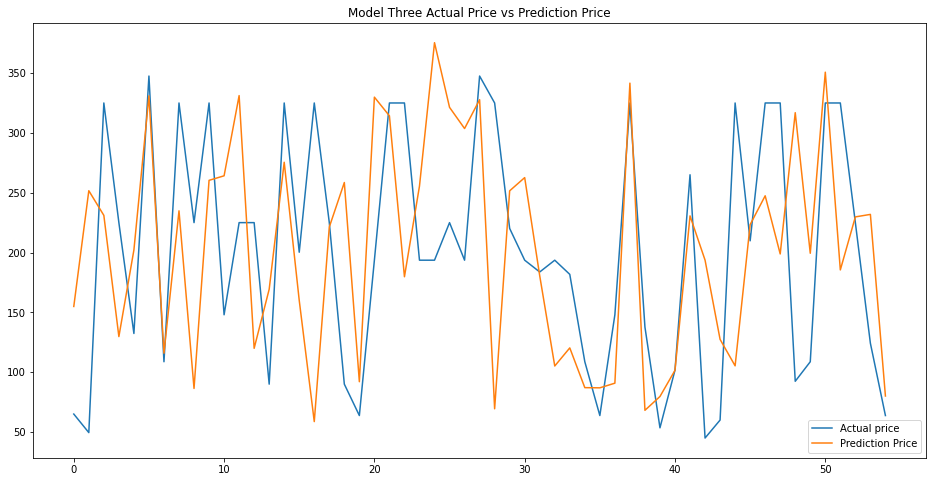

In [48]:
plt.figure(figsize=(16,8))
plt.title('Model Three Actual Price vs Prediction Price')
plt.plot(result['0'])
plt.legend(['Actual price', 'Prediction Price'],loc='lower right')
plt.show()

In [49]:
training_results = model3.evaluate(x_train, y_train, batch_size=256)
print(training_results)
training_predictions = model3.predict(orig_training_x)
print(training_predictions)

4199/4199 [==============================] - 0s 14us/sample - loss: 180.8745 - mae: 3.1753
[180.8744535725524, 3.175285]
[[221.89192 ]
 [ 41.4694  ]
 [139.37732 ]
 [262.90994 ]
 [320.8166  ]
 [194.60367 ]
 [ 63.6522  ]
 [322.57614 ]
 [ 54.999542]
 [193.04106 ]
 [178.4528  ]
 [ 64.335556]
 [180.19127 ]
 [110.33839 ]
 [219.25127 ]
 [102.42287 ]
 [ 90.758514]
 [118.1367  ]
 [ 41.668957]
 [224.74577 ]
 [324.00858 ]
 [135.61624 ]
 [ 92.96109 ]
 [192.20537 ]
 [321.5096  ]
 [121.16757 ]
 [326.71347 ]
 [118.69238 ]
 [221.52255 ]
 [108.08415 ]
 [346.34323 ]
 [200.27808 ]
 [209.6815  ]
 [196.38783 ]
 [ 60.494896]
 [258.72903 ]
 [101.860916]
 [323.74252 ]
 [ 46.5634  ]
 [323.86136 ]
 [225.36491 ]
 [224.39673 ]
 [ 90.69668 ]
 [119.22859 ]
 [224.46733 ]
 [205.78604 ]
 [342.74252 ]
 [ 90.98994 ]
 [243.4882  ]
 [ 90.059616]
 [229.05324 ]
 [181.5706  ]
 [222.67818 ]
 [108.05882 ]
 [ 90.51797 ]
 [ 78.66412 ]
 [260.3629  ]
 [ 90.633446]
 [243.66972 ]
 [206.81245 ]
 [ 12.297332]
 [ 90.10898 ]
 [224.65663

In [50]:
training_pos_df = pd.DataFrame(orig_training_y)
training_prediction_df = pd.DataFrame(training_predictions) 
training_result = pd.concat([training_pos_df, training_prediction_df], axis=1, join='inner')
training_result

,0,0
0,225.00,221.891922
1,40.59,41.469398
2,137.74,139.377319
3,265.00,262.909943
4,325.00,320.816589
...,...,...
216,193.60,195.226212
217,193.60,187.911362
218,90.00,90.518860
219,46.00,47.083786


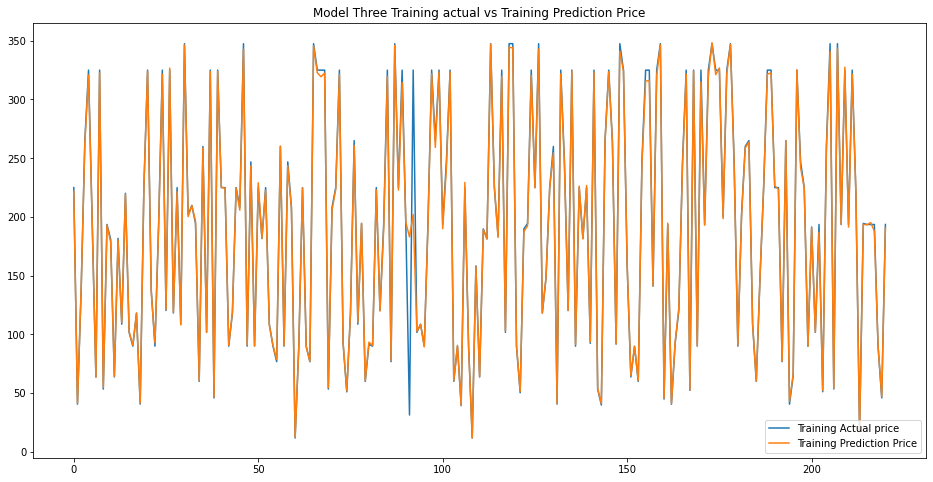

In [51]:
plt.figure(figsize=(16,8))
plt.title('Model Three Training actual vs Training Prediction Price')
plt.plot(training_result['0'])
plt.legend(['Training Actual price', 'Training Prediction Price'],loc='lower right')
plt.show()